### 📑 자료 분석
- 쥐가 공포에 노출되었을 때, 대뇌 피질에서 분비되는 단백질의 종류 및 양,  
  쥐에게 주사한 약물 등에 따라 다운 증후군 발현 여부를 이진 분류한 데이터 세트

### Features
- MouseID: 각 쥐 개체를 구분하기 위한 ID
- DYRK1A_N ~ CaNA_N: 쥐의 대뇌 피질에서 발견된 단백질(77종)과 해당 단백질 분비량
- Genotype: 실험에 사용된 쥐의 종류
> - Control: 대조군
> - Ts65Dn: 다운 증후군 유전자 보유

- Treatment: 쥐에게 주사한 약물 종류
> - Memantine: 메만틴, 치매 치료제의 일종
> - Saline: 식염수

- Behavior: 쥐가 전에 공포 상황을 겪은 적 있는지를 나타내는 지표
> - C/S: 겪은 적 있음
> - S/C: 겪은 적 없음

### Target
- class: feature에 따른 쥐의 종류 구분
> - 기존에는 투여한 약물과 공포 상황 경험 여부를 포함하여 8가지로 분류하지만,  
이번 프로젝트에서는 정상 / 다운 증후군 발현으로 이진 분류

### 🔎 데이터 세트 확인

In [1]:
import pandas as pd

# 데이터 세트 불러오기
md_df = pd.read_csv('./datasets/mouse_down_syndrome.csv')

md_df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

In [2]:
# 데이터 세트 정보 확인
md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

### 💻 데이터 전처리

#### 결측치 조정
- 모든 컬럼의 데이터 수를 1080개로 조정

In [3]:
# 결측치 개수 확인
md_df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [4]:
# 컬럼 별 수치 데이터 확인
md_df.describe().T

count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1077.0  0.425810  0.249362  0.145327  0.288121  0.366378  0.487711   
ITSN1_N    1077.0  0.617102  0.251640  0.245359  0.473361  0.565782  0.698032   
BDNF_N     1077.0  0.319088  0.049383  0.115181  0.287444  0.316564  0.348197   
NR1_N      1077.0  2.297269  0.347293  1.330831  2.057411  2.296546  2.528481   
NR2A_N     1077.0  3.843934  0.933100  1.737540  3.155678  3.760855  4.440011   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1080.0  0.446073  0.066432  0.258626  0.398082  0.448459  0.490773   
H3AcK18_N   900.0  0.169609  0.059402  0.079691  0.125848  0.158240  0.197876   
EGR1_N      870.0  0.183135  0.040406  0.105537  0.155121  0.174935  0.204542   
H3MeK4_N    810.0  0.205440  0.055514  0.101787  0.165143  0.193994  0.235215   
CaNA_N     1080.0  1.337784  0.317126  0.586479  1.081423  1.317441  1.585824   

                max  
DYRK1A_N   2.516367  
ITSN1_N    2.602662  
BDNF_N     0.497160  
NR1_N      3.757641  
NR2A_N     8.482553  
...             ...  
SYP_N      0.759588  
H3AcK18_N  0.479763  
EGR1_N     0.360692  
H3MeK4_N   0.413903  
CaNA_N     2.129791  

[77 rows x 8 columns]

#### 중간 분석
- 결측치가 발생한 feature들의 평균(mean)과 중간값(50%, median)이 대체로 비슷함
- 따라서 결측치는 평균값으로 채움

In [5]:
# 결측치 채우기 전 데이터 세트 복사
pre_md_df = md_df.copy()

pre_md_df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

In [6]:
# 결측치 발생 feature만 가져옴
loss_features = pre_md_df.columns[pre_md_df.isna().any()]

loss_features

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [7]:
# 해당 feature들의 결측치를 평균(mean)으로 채움
for feature in loss_features:
    pre_md_df[feature] = pre_md_df[feature].fillna(pre_md_df[feature].mean())
    print(pre_md_df[feature].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
# 각 feature별 결측치 보유 여부 다시 출력
pre_md_df.isna().any().value_counts()

False    82
Name: count, dtype: int64

In [9]:
# 각 feature별 수치 데이터 출력
pre_md_df.describe().T

count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1080.0  0.425810  0.249015  0.145327  0.288163  0.366540  0.487574   
ITSN1_N    1080.0  0.617102  0.251290  0.245359  0.473669  0.566365  0.697500   
BDNF_N     1080.0  0.319088  0.049314  0.115181  0.287650  0.316703  0.348039   
NR1_N      1080.0  2.297269  0.346810  1.330831  2.059152  2.297269  2.528035   
NR2A_N     1080.0  3.843934  0.931802  1.737540  3.160287  3.763306  4.425107   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1080.0  0.446073  0.066432  0.258626  0.398082  0.448459  0.490773   
H3AcK18_N  1080.0  0.169609  0.054222  0.079691  0.133969  0.169609  0.187174   
EGR1_N     1080.0  0.183135  0.036261  0.105537  0.159168  0.183135  0.196133   
H3MeK4_N   1080.0  0.205440  0.048069  0.101787  0.174271  0.205440  0.219242   
CaNA_N     1080.0  1.337784  0.317126  0.586479  1.081423  1.317441  1.585824   

                max  
DYRK1A_N   2.516367  
ITSN1_N    2.602662  
BDNF_N     0.497160  
NR1_N      3.757641  
NR2A_N     8.482553  
...             ...  
SYP_N      0.759588  
H3AcK18_N  0.479763  
EGR1_N     0.360692  
H3MeK4_N   0.413903  
CaNA_N     2.129791  

[77 rows x 8 columns]

#### 중간 분석
- RRP1_N feature에서 일반적으로는 있을 수 없는 마이너스 값이 발견됨
- 해당 값을 0으로 만드는 것도 고려했지만,  
  도메인 지식으로는 발현율이 0이 될 수는 있지만 특수한 경우에만 발생한다고 답변
- 따라서 해당 데이터 제거

#### 이상치 제거

In [10]:
# RRP1_N 값이 0 이하인 데이터 전부 제거
pre_md_df = pre_md_df[pre_md_df['RRP1_N'] > 0]

# 인덱스 번호 초기화
pre_md_df.reset_index(drop=True, inplace=True)

pre_md_df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1074  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1075  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1076  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1077  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1078  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1074  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1075  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1076  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1077  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1078  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1074  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1075  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1079 rows x 82 columns]

In [11]:
# 수치 데이터 출력
pre_md_df.describe().T

count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1079.0  0.425931  0.249099  0.145327  0.288149  0.366568  0.487620   
ITSN1_N    1079.0  0.617212  0.251381  0.245359  0.473566  0.566743  0.697677   
BDNF_N     1079.0  0.319090  0.049337  0.115181  0.287582  0.316702  0.348092   
NR1_N      1079.0  2.297351  0.346960  1.330831  2.058572  2.297269  2.528184   
NR2A_N     1079.0  3.844660  0.931928  1.737540  3.162474  3.763512  4.430075   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1079.0  0.445987  0.066403  0.258626  0.398067  0.448435  0.490714   
H3AcK18_N  1079.0  0.169609  0.054247  0.079691  0.133942  0.169609  0.187314   
EGR1_N     1079.0  0.183012  0.036054  0.105537  0.159164  0.183135  0.195961   
H3MeK4_N   1079.0  0.205440  0.048091  0.101787  0.174236  0.205440  0.219248   
CaNA_N     1079.0  1.337761  0.317272  0.586479  1.081359  1.317276  1.585854   

                max  
DYRK1A_N   2.516367  
ITSN1_N    2.602662  
BDNF_N     0.497160  
NR1_N      3.757641  
NR2A_N     8.482553  
...             ...  
SYP_N      0.759588  
H3AcK18_N  0.479763  
EGR1_N     0.360692  
H3MeK4_N   0.413903  
CaNA_N     2.129791  

[77 rows x 8 columns]

#### 중간 점검
- MouseID: 예측에 불필요하므로 제거
- Genotype: class 컬럼 내 값을 Control 또는 Trosomic으로 바꿀 예정.
  따라서 의미가 중복되므로 제거 
- Behavior: feature명을 Stimulated로 변경. C/S는 Yes, S/C는 No로 데이터 값 변경
- class: feature 명을 Target으로 변경. c-로 시작하는 데이터(대조군, 일반 쥐)는 Control,  
  t-로 시작하는 데이터(다운 증후군 쥐)는 Trisomic으로 데이터 값 변경
- Treatment, Behavior, Target에 레이블 인코더 적용

#### 불필요한 feature 제거

In [12]:
# MouseID, Genotype feature 삭제
pre_md_df = pre_md_df.drop(labels=['MouseID', 'Genotype'], axis=1)

pre_md_df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1074  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1075  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1076  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1077  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1078  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1074   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1075   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1076   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1077   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1078   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Behavior   class  
0      0.114783  0.131790  0.128186  1.675652  Memantine       C/S  c-CS-m  
1      0.111974  0.135103  0.131119  1.743610  Memantine       C/S  c-CS-m  
2      0.111883  0.133362  0.127431  1.926427  Memantine       C/S  c-CS-m  
3      0.130405  0.147444  0.146901  1.700563  Memantine       C/S  c-CS-m  
4      0.118481  0.140314  0.148380  1.839730  Memantine       C/S  c-CS-m  
...         ...       ...       ...       ...        ...       ...     ...  
1074   0.318782  0.204660  0.328327  1.364823     Saline       S/C  t-SC-s  
1075   0.325639  0.200415  0.293435  1.364478     Saline       S/C  t-SC-s  
1076   0.321306  0.229193  0.355213  1.430825     Saline       S/C  t-SC-s  
1077   0.335936  0.251317  0.365353  1.404031     Saline       S/C  t-SC-s  
1078   0.335062  0.252995  0.365278  1.370999     Saline       S/C  t-SC-s  

[1079 rows x 80 columns]

#### 일부 Feature 및 값의 명칭 변경

In [13]:
# 일부 feature명 변경
pre_md_df = pre_md_df.rename(columns={'Behavior': 'Stimulated',
                         'class': 'Target'})

pre_md_df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1074  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1075  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1076  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1077  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1078  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1074   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1075   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1076   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1077   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1078   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Stimulated  Target  
0      0.114783  0.131790  0.128186  1.675652  Memantine         C/S  c-CS-m  
1      0.111974  0.135103  0.131119  1.743610  Memantine         C/S  c-CS-m  
2      0.111883  0.133362  0.127431  1.926427  Memantine         C/S  c-CS-m  
3      0.130405  0.147444  0.146901  1.700563  Memantine         C/S  c-CS-m  
4      0.118481  0.140314  0.148380  1.839730  Memantine         C/S  c-CS-m  
...         ...       ...       ...       ...        ...         ...     ...  
1074   0.318782  0.204660  0.328327  1.364823     Saline         S/C  t-SC-s  
1075   0.325639  0.200415  0.293435  1.364478     Saline         S/C  t-SC-s  
1076   0.321306  0.229193  0.355213  1.430825     Saline         S/C  t-SC-s  
1077   0.335936  0.251317  0.365353  1.404031     Saline         S/C  t-SC-s  
1078   0.335062  0.252995  0.365278  1.370999     Saline         S/C  t-SC-s  

[1079 rows x 80 columns]

In [14]:
# Stimulated에 들어가는 값 분포 출력
pre_md_df['Stimulated'].value_counts()

Stimulated
S/C    554
C/S    525
Name: count, dtype: int64

In [15]:
# Stimulated에 들어가는 값 변경
pre_md_df['Stimulated'] = pre_md_df['Stimulated'].apply(lambda x: "Yes" if x == "C/S" else "No")

pre_md_df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1074  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1075  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1076  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1077  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1078  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1074   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1075   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1076   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1077   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1078   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Stimulated  Target  
0      0.114783  0.131790  0.128186  1.675652  Memantine         Yes  c-CS-m  
1      0.111974  0.135103  0.131119  1.743610  Memantine         Yes  c-CS-m  
2      0.111883  0.133362  0.127431  1.926427  Memantine         Yes  c-CS-m  
3      0.130405  0.147444  0.146901  1.700563  Memantine         Yes  c-CS-m  
4      0.118481  0.140314  0.148380  1.839730  Memantine         Yes  c-CS-m  
...         ...       ...       ...       ...        ...         ...     ...  
1074   0.318782  0.204660  0.328327  1.364823     Saline          No  t-SC-s  
1075   0.325639  0.200415  0.293435  1.364478     Saline          No  t-SC-s  
1076   0.321306  0.229193  0.355213  1.430825     Saline          No  t-SC-s  
1077   0.335936  0.251317  0.365353  1.404031     Saline          No  t-SC-s  
1078   0.335062  0.252995  0.365278  1.370999     Saline          No  t-SC-s  

[1079 rows x 80 columns]

In [16]:
# 값 적용 여부 출력
pre_md_df['Stimulated'].value_counts()

Stimulated
No     554
Yes    525
Name: count, dtype: int64

In [17]:
# Target에 들어가는 값 변경
pre_md_df['Target'] = pre_md_df['Target'].apply(lambda x: 'Control' if x.split('-')[0] == 'c' else 'Trisomic')

pre_md_df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1074  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1075  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1076  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1077  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1078  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1074   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1075   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1076   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1077   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1078   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Stimulated    Target  
0      0.114783  0.131790  0.128186  1.675652  Memantine         Yes   Control  
1      0.111974  0.135103  0.131119  1.743610  Memantine         Yes   Control  
2      0.111883  0.133362  0.127431  1.926427  Memantine         Yes   Control  
3      0.130405  0.147444  0.146901  1.700563  Memantine         Yes   Control  
4      0.118481  0.140314  0.148380  1.839730  Memantine         Yes   Control  
...         ...       ...       ...       ...        ...         ...       ...  
1074   0.318782  0.204660  0.328327  1.364823     Saline          No  Trisomic  
1075   0.325639  0.200415  0.293435  1.364478     Saline          No  Trisomic  
1076   0.321306  0.229193  0.355213  1.430825     Saline          No  Trisomic  
1077   0.335936  0.251317  0.365353  1.404031     Saline          No  Trisomic  
1078   0.335062  0.252995  0.365278  1.370999     Saline          No  Trisomic  

[1079 rows x 80 columns]

#### 레이블 인코딩 

In [18]:
from sklearn.preprocessing import LabelEncoder

# 일부 feature에 레이블 인코더 적용
columns = ['Treatment', 'Stimulated', 'Target']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_md_df[column] = encoder.fit_transform(pre_md_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

encoders

{'Treatment': ['Memantine', 'Saline'],
 'Stimulated': ['No', 'Yes'],
 'Target': ['Control', 'Trisomic']}

In [19]:
# 인코딩 완료된 데이터 세트 확인
pre_md_df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1074  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1075  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1076  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1077  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1078  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1074   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1075   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1076   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1077   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1078   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Stimulated  Target  
0      0.114783  0.131790  0.128186  1.675652          0           1       0  
1      0.111974  0.135103  0.131119  1.743610          0           1       0  
2      0.111883  0.133362  0.127431  1.926427          0           1       0  
3      0.130405  0.147444  0.146901  1.700563          0           1       0  
4      0.118481  0.140314  0.148380  1.839730          0           1       0  
...         ...       ...       ...       ...        ...         ...     ...  
1074   0.318782  0.204660  0.328327  1.364823          1           0       1  
1075   0.325639  0.200415  0.293435  1.364478          1           0       1  
1076   0.321306  0.229193  0.355213  1.430825          1           0       1  
1077   0.335936  0.251317  0.365353  1.404031          1           0       1  
1078   0.335062  0.252995  0.365278  1.370999          1           0       1  

[1079 rows x 80 columns]

In [20]:
# 현재 데이터 세트 정보 출력
pre_md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1079 non-null   float64
 1   ITSN1_N          1079 non-null   float64
 2   BDNF_N           1079 non-null   float64
 3   NR1_N            1079 non-null   float64
 4   NR2A_N           1079 non-null   float64
 5   pAKT_N           1079 non-null   float64
 6   pBRAF_N          1079 non-null   float64
 7   pCAMKII_N        1079 non-null   float64
 8   pCREB_N          1079 non-null   float64
 9   pELK_N           1079 non-null   float64
 10  pERK_N           1079 non-null   float64
 11  pJNK_N           1079 non-null   float64
 12  PKCA_N           1079 non-null   float64
 13  pMEK_N           1079 non-null   float64
 14  pNR1_N           1079 non-null   float64
 15  pNR2A_N          1079 non-null   float64
 16  pNR2B_N          1079 non-null   float64
 17  pPKCAB_N      

### 데이터 분포 시각화

array([[<Axes: title={'center': 'DYRK1A_N'}>,
        <Axes: title={'center': 'ITSN1_N'}>,
        <Axes: title={'center': 'BDNF_N'}>,
        <Axes: title={'center': 'NR1_N'}>,
        <Axes: title={'center': 'NR2A_N'}>,
        <Axes: title={'center': 'pAKT_N'}>,
        <Axes: title={'center': 'pBRAF_N'}>,
        <Axes: title={'center': 'pCAMKII_N'}>,
        <Axes: title={'center': 'pCREB_N'}>],
       [<Axes: title={'center': 'pELK_N'}>,
        <Axes: title={'center': 'pERK_N'}>,
        <Axes: title={'center': 'pJNK_N'}>,
        <Axes: title={'center': 'PKCA_N'}>,
        <Axes: title={'center': 'pMEK_N'}>,
        <Axes: title={'center': 'pNR1_N'}>,
        <Axes: title={'center': 'pNR2A_N'}>,
        <Axes: title={'center': 'pNR2B_N'}>,
        <Axes: title={'center': 'pPKCAB_N'}>],
       [<Axes: title={'center': 'pRSK_N'}>,
        <Axes: title={'center': 'AKT_N'}>,
        <Axes: title={'center': 'BRAF_N'}>,
        <Axes: title={'center': 'CAMKII_N'}>,
        <Axes: tit

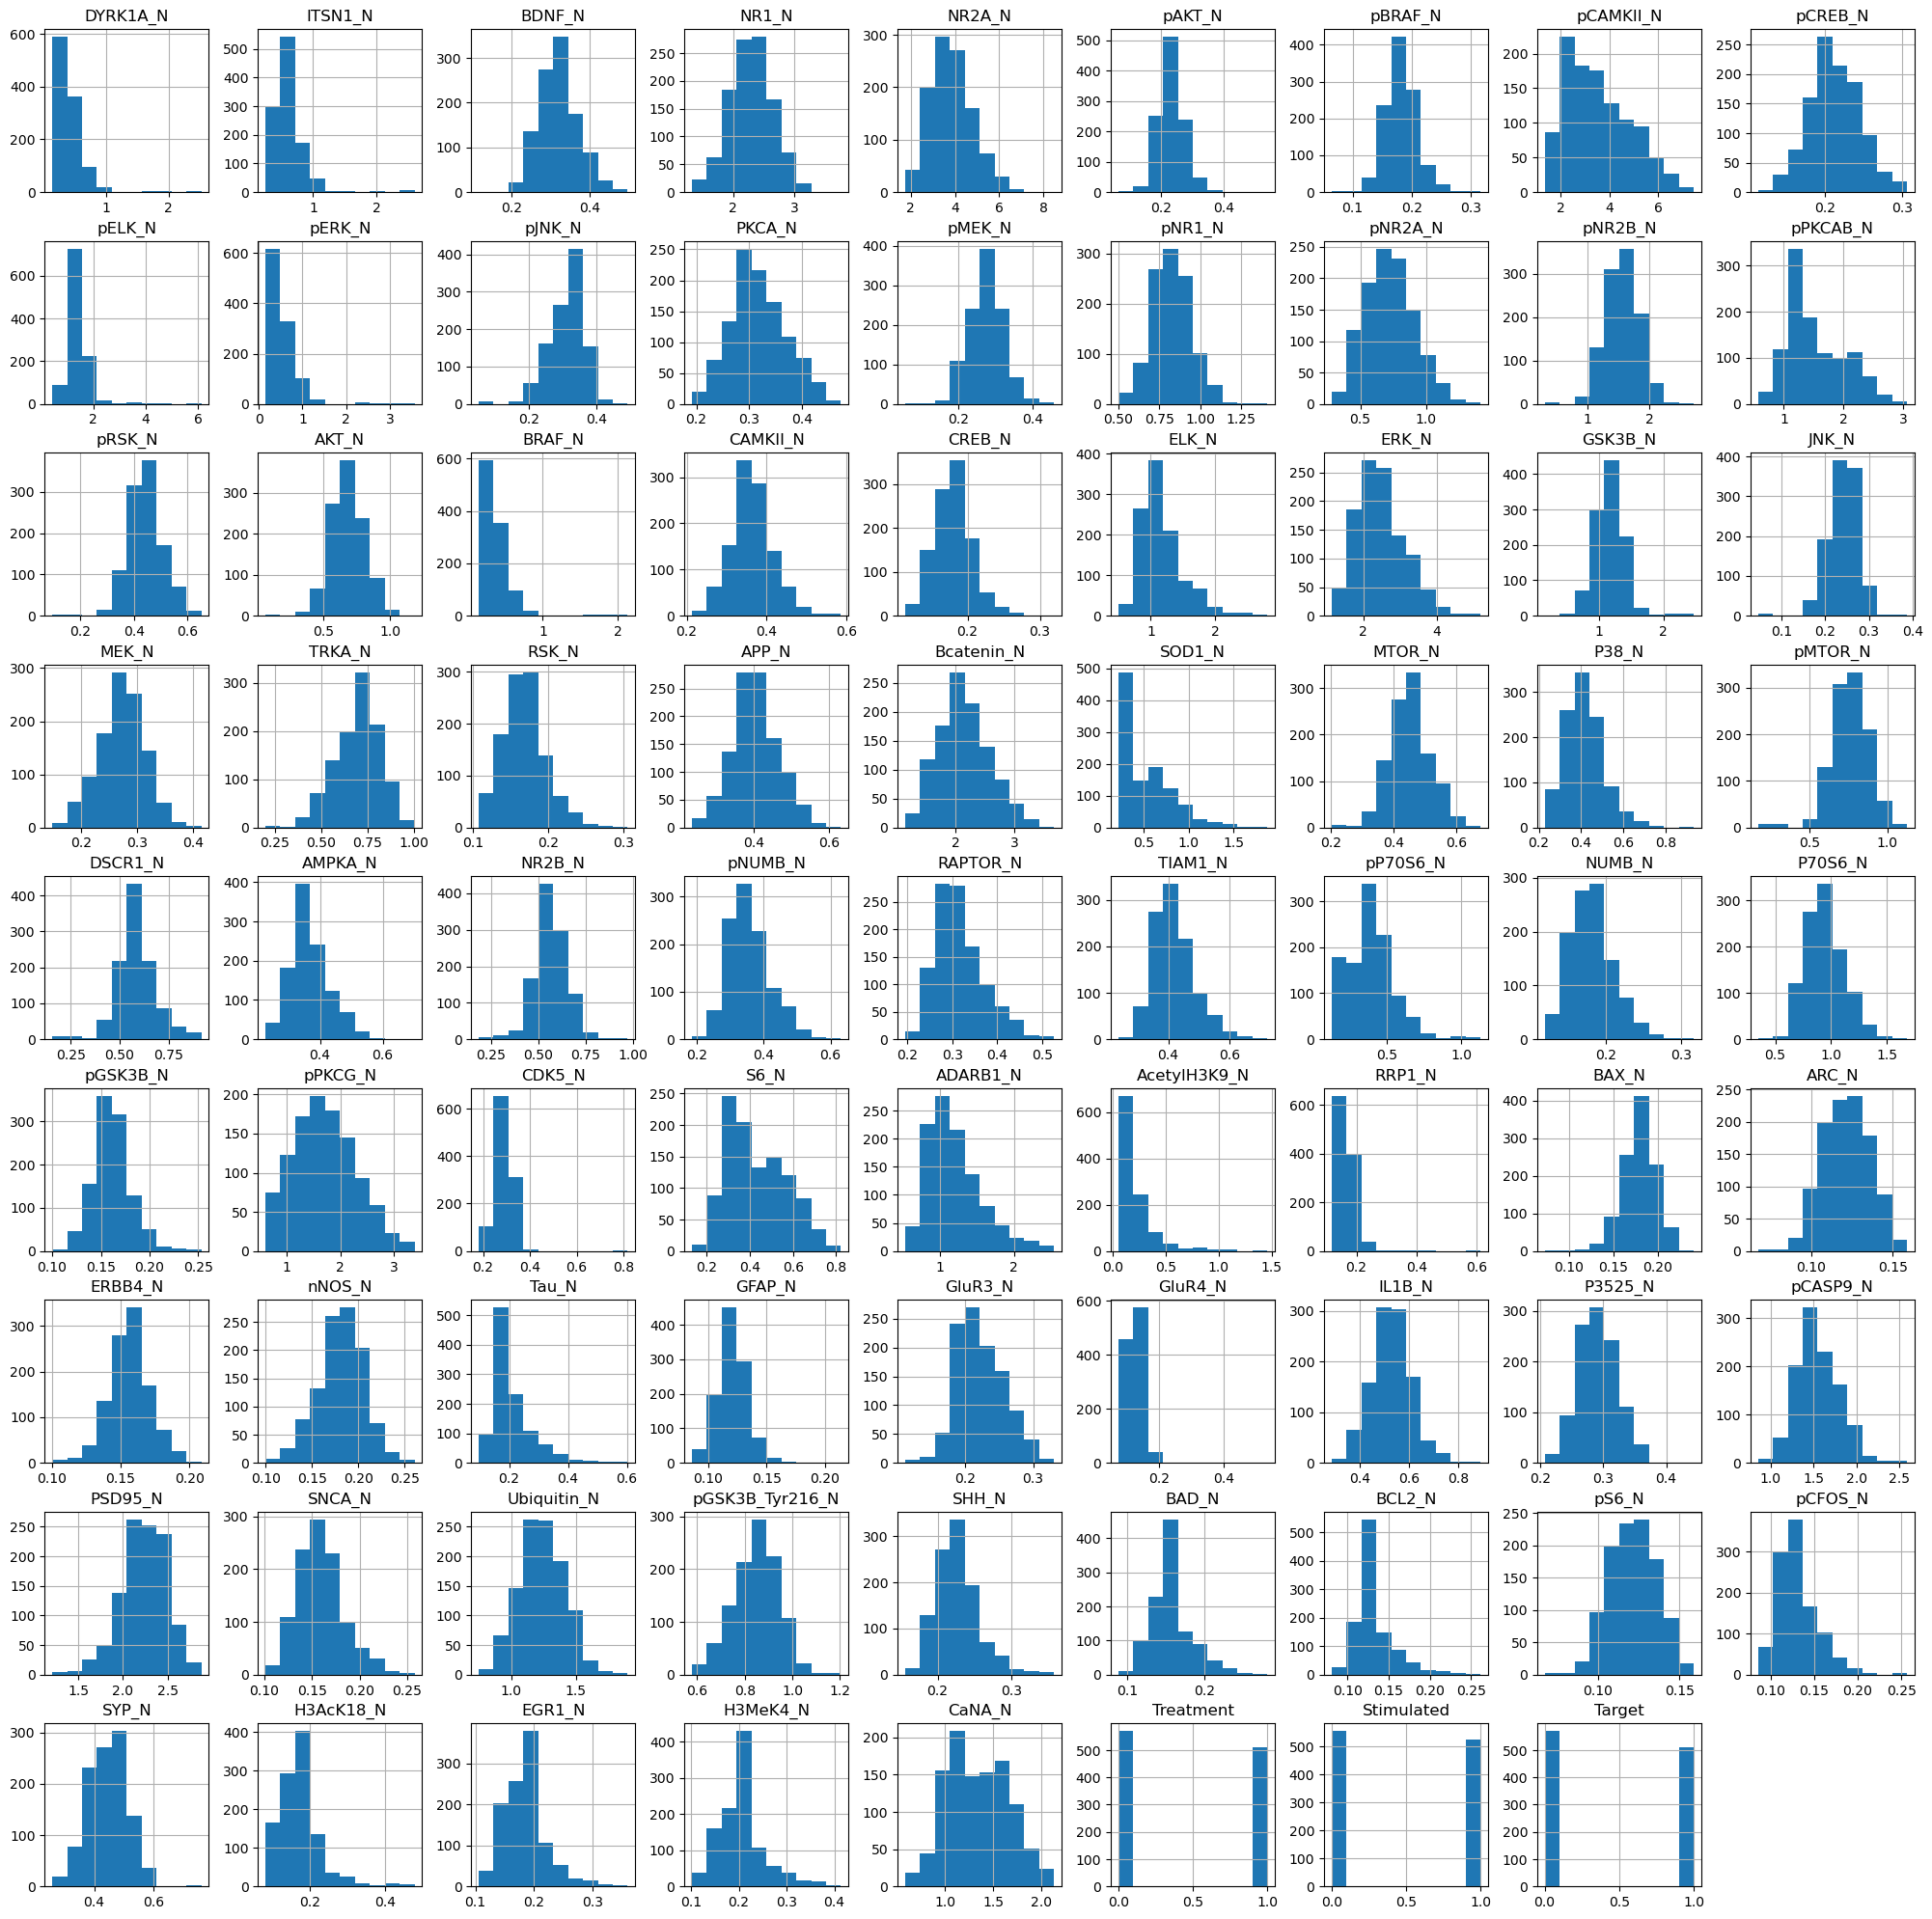

In [21]:
# 칵 컬럼의 데이터 분포 시각화
pre_md_df.hist(figsize=(25, 25))

In [22]:
# Target의 데이터 분포 출력
pre_md_df['Target'].value_counts()

Target
0    569
1    510
Name: count, dtype: int64

### 각 feature 간 상관관계 시각화

Text(0.5, 1.0, 'Correlation')

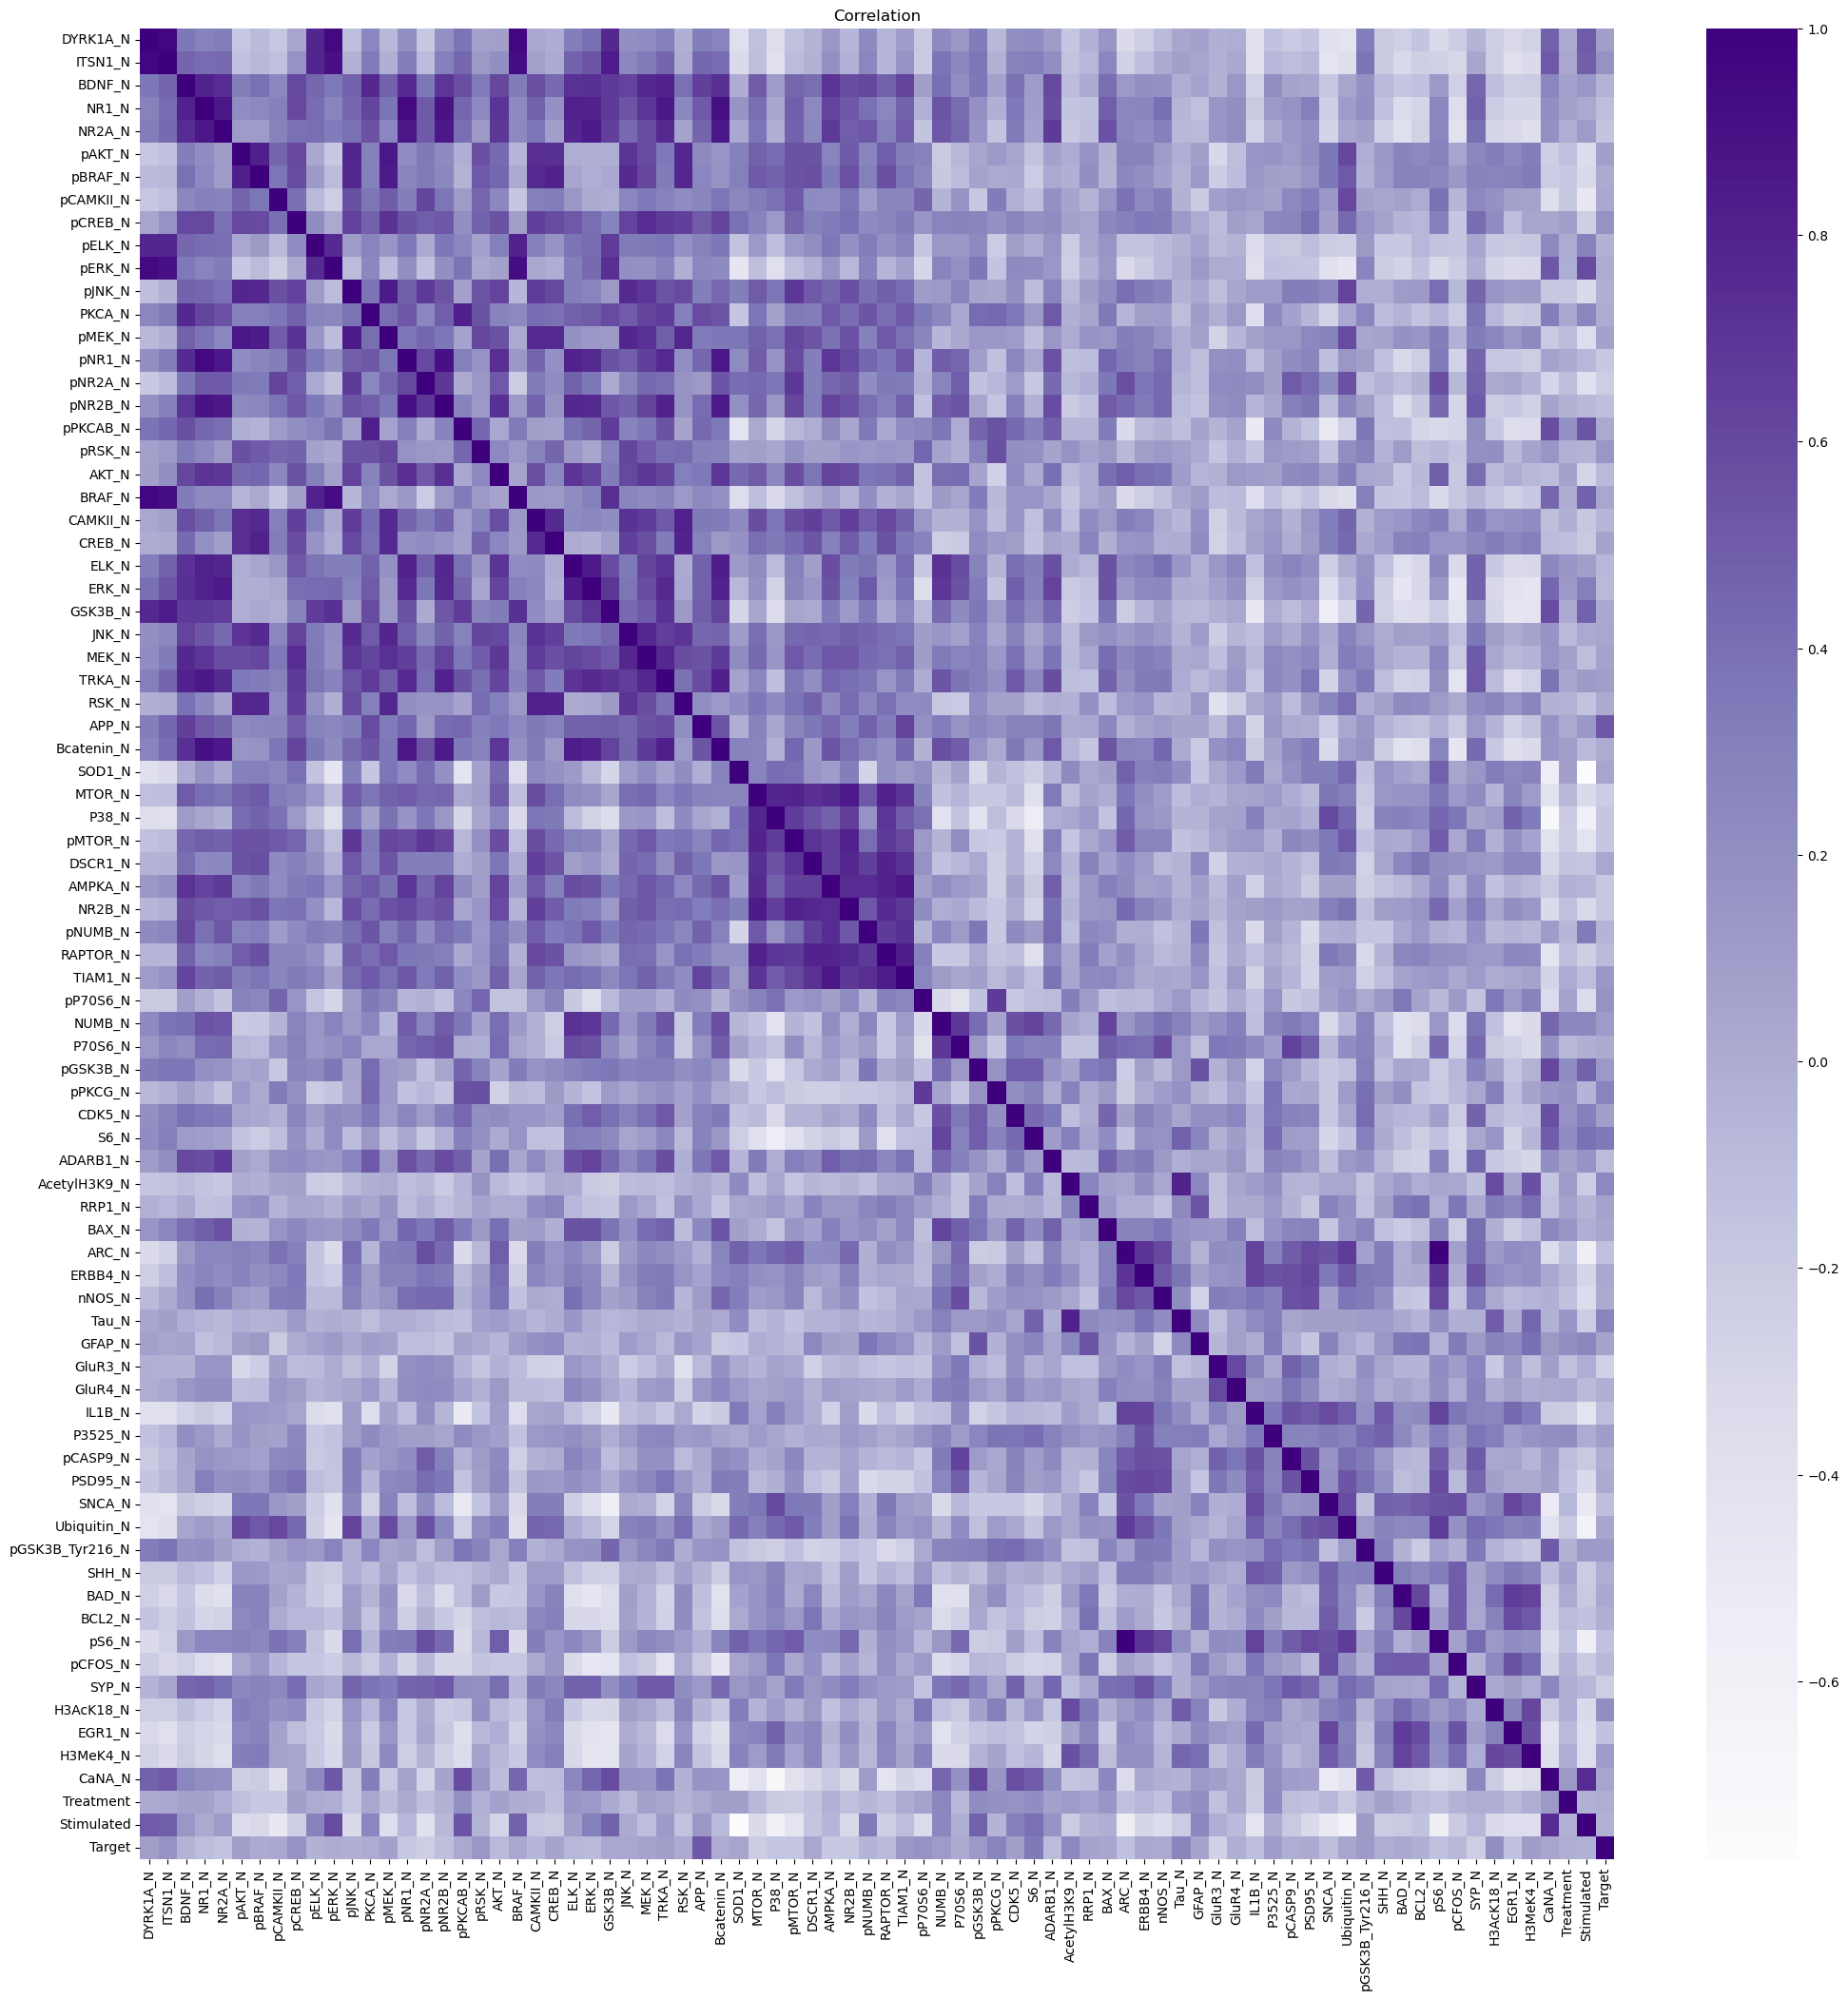

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 컬럼의 상관관계를 히트맵으로 출력
corr = pre_md_df.corr()
fig = plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr, cmap="Purples")
heatmap.set_title("Correlation")

In [24]:
# Target과 feature들의 상관관계도 출력
corr[['Target']].sort_values(by="Target", ascending=False)[1:]

Target
APP_N         0.522546
S6_N          0.342479
pPKCG_N       0.273608
Tau_N         0.271800
AcetylH3K9_N  0.243450
...                ...
AMPKA_N      -0.190395
MTOR_N       -0.224680
SYP_N        -0.226786
pNR2A_N      -0.228249
GluR3_N      -0.259798

[79 rows x 1 columns]

#### 중간 분석
- 현재 Target과의 상관관계가 가장 상위 5개의 feature들은  
  APP_N, S6_N, pPKCG_N, Tau_N, GluR3_N(음의 상관관계)
- Target의 데이터 분포가 균일하지 않은 것을 확인
- 이는 예측 성능에 영향을 줄 수 있기에, 데이터 세트 분할 과정에서  
  SMOTE를 사용하여 Target의 데이터 분포를 균일하게 맞춰서 해결

### 데이터 세트 분할 

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트를 학습용과 테스트용으로 분할
features, targets = pre_md_df.iloc[:, :-1], pre_md_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE로 오버 샘플링 실행
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# SMOTE 적용 전후의 데이터 분포 출력
print(f'SMOTE 적용 전:\n{y_train.value_counts()}')
print(f'SMOTE 적용 후:\n{y_train_over.value_counts()}')

SMOTE 적용 전:
Target
0    455
1    408
Name: count, dtype: int64
SMOTE 적용 후:
Target
0    455
1    455
Name: count, dtype: int64


### 🤖 프로젝트의 방향성
- 본 데이터 세트를 통한 예측은 아래에 특히 민감할 필요가 있다고 판단
> - FN: 다운 증후군이 있는 쥐를 정상이라 예측하는 경우

- FP(정상인 쥐를 다운 증후군이라 예측하는 경우)를 감지하고 정밀도를 향상시키는 것 역시 중요하지만,  
  본 프로젝트에서는 FN의 비율을 낮춤으로서 높은 재현율을 보이는 모델을 찾는 것이 중요하다고 판단

- 또한 과적합 발생 시, 새롭게 들어오는 데이터에 대한 예측 성능이 저하될 수 있기 때문에  
  과적합 여부도 관찰하면서 진행

### 학습 진행
- 여러 가지 분류 모델을 통한 학습 진행

> 1. DTC (DecisionTreeClassifier)

> 2. SVM (SVC)

> 3. KNN (KNeighborsClassifier)

### 1. DTC (결정 트리 분류 모델)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# 별도의 하이퍼 파라미터 설정 없이 학습 진행
dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [27]:
from sklearn.tree import export_graphviz

# graphviz를 이용하여 위 모델의 분류 알고리즘을 .dot 파일로 생성
export_graphviz(
    dtc,
    out_file="./images/downs_syndrome_dtc01.dot",
    class_names=encoders['Target'],
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [28]:
import graphviz

# 위 과정으로 생성된 .dot 파일 불러오기
with open('./images/downs_syndrome_dtc01.dot') as f:
    downs_syndrome_dtc01 = f.read()

downs_syndrome_dtc01_graph = graphviz.Source(downs_syndrome_dtc01)

In [29]:
# 불러온 파일을 .png로 저장
downs_syndrome_dtc01_graph.render(filename='downs_syndrome_dtc01', directory='./images', format='png')

'images\\downs_syndrome_dtc01.png'

<img src='./images/downs_syndrome_dtc01.png'>

#### 중간 분석
- 교차 검증에 사용할 하이퍼 파라미터는 max_depth는 3, 4, 5 / min_samples_split은 40, 60, 80으로 설정

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 교차 검증 파라미터 설정
dtc_parameters = {
    'dtc__max_depth': [3, 4, 5],
    'dtc__min_samples_split': [40, 60, 80]
}

# 표준화 -> 결정 트리 모델 순으로 진행하는 파이프라인 생성 
# 교차검증이 적용된 새로운 결정 트리 분류 모델 생성
dtc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('dtc', dtc)])
g_dtc = GridSearchCV(dtc_pipe, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__max_depth': [3, 4, 5],
                         'dtc__min_samples_split': [40, 60, 80]},
             return_train_score=True)

In [31]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(dtc_result_df['params'][6])
display(dtc_result_df)

# 가장 높은 평가 점수를 받은 모델을 dtc에 할당
dtc = g_dtc.best_estimator_

{'dtc__max_depth': 5, 'dtc__min_samples_split': 40}


params  mean_test_score  \
0  {'dtc__max_depth': 3, 'dtc__min_samples_split'...         0.841758   
1  {'dtc__max_depth': 3, 'dtc__min_samples_split'...         0.841758   
2  {'dtc__max_depth': 3, 'dtc__min_samples_split'...         0.841758   
3  {'dtc__max_depth': 4, 'dtc__min_samples_split'...         0.865934   
4  {'dtc__max_depth': 4, 'dtc__min_samples_split'...         0.857143   
5  {'dtc__max_depth': 4, 'dtc__min_samples_split'...         0.857143   
6  {'dtc__max_depth': 5, 'dtc__min_samples_split'...         0.894505   
7  {'dtc__max_depth': 5, 'dtc__min_samples_split'...         0.861538   
8  {'dtc__max_depth': 5, 'dtc__min_samples_split'...         0.859341   

   rank_test_score  
0                7  
1                7  
2                7  
3                2  
4                5  
5                5  
6                1  
7                3  
8                4

#### 중간 분석
- 임의로 설정한 하이퍼 파라미터의 조합들 중 max_depth는 5,  
  min_samples_split은 40으로 설정한 모델의 평가 점수가 가장 높은 것을 확인

#### 각 feature의 중요도
- 파이프라인은 feature importance를 지원하지 않기 때문에 permutation importance만 출력

In [32]:
from sklearn.inspection import permutation_importance

# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2832
AMPKA_N: 0.2012
GluR3_N: 0.0338
NR2A_N: 0.0316
pERK_N: 0.0306
pAKT_N: 0.0162
pPKCG_N: 0.0157
pNR2A_N: 0.0116
SYP_N: 0.0068
GSK3B_N: 0.0062
CREB_N: 0.0042
pGSK3B_Tyr216_N: 0.004
SOD1_N: 0.0011
Bcatenin_N: 0.0
CAMKII_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
MEK_N: 0.0
MTOR_N: 0.0
JNK_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
ERK_N: 0.0
ELK_N: 0.0
Stimulated: 0.0
BRAF_N: 0.0
AKT_N: 0.0
pRSK_N: 0.0
pPKCAB_N: 0.0
pNR2B_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
PKCA_N: 0.0
pJNK_N: 0.0
pELK_N: 0.0
pCREB_N: 0.0
pBRAF_N: 0.0
NR1_N: 0.0
BDNF_N: 0.0
ITSN1_N: 0.0
DSCR1_N: 0.0
pNUMB_N: 0.0
NR2B_N: 0.0
Treatment: 0.0
IL1B_N: 0.0
P3525_N: 0.0
pCASP9_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
SHH_N: 0.0
BAD_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0


#### 오차 행렬

In [33]:
# 오차 행렬을 출력 및 시각화 해주는 함수
# SMOTE를 통해 타겟 데이터의 분포를 균일하게 맞췄기 때문에 macro 방식으로 평균 산출 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'\
          .format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [34]:
# 결정 트리 모델로 테스트 데이터 예측
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[103  11]
 [ 15  87]]
정확도: 0.8796, 정밀도: 0.8803, 재현율: 0.8782, F1: 0.8790, ROC-AUC: 0.8782
################################################################################


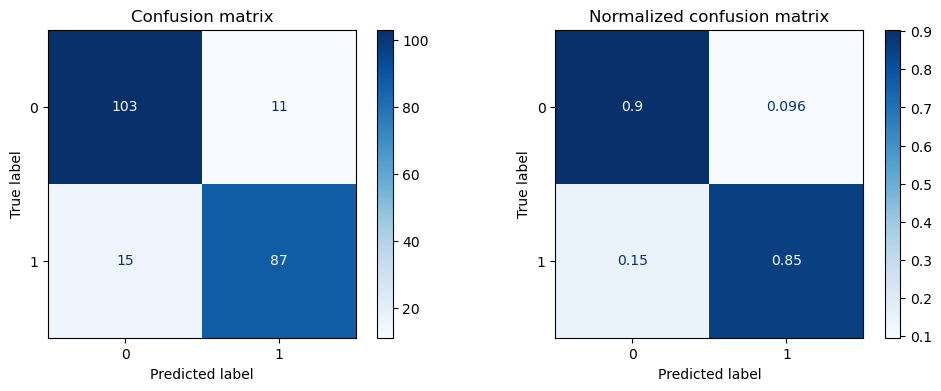

In [35]:
# 오차 행렬 출력
get_evaluation(y_test, dtc_prediction, dtc, X_test)

#### Precision / Recall Trade-off

In [36]:
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율의 변경 지점을 threshold 변수에 담아서 출력
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.02040816, 0.02631579, 0.03422053, 0.07352941,
       0.25      , 0.26666667, 0.33333333, 0.7826087 , 0.875     ,
       0.8974359 , 0.9875    , 0.99512195, 1.        ])

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 정밀도와 재현율의 trade-off를 시각화하는 함수 선언
def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

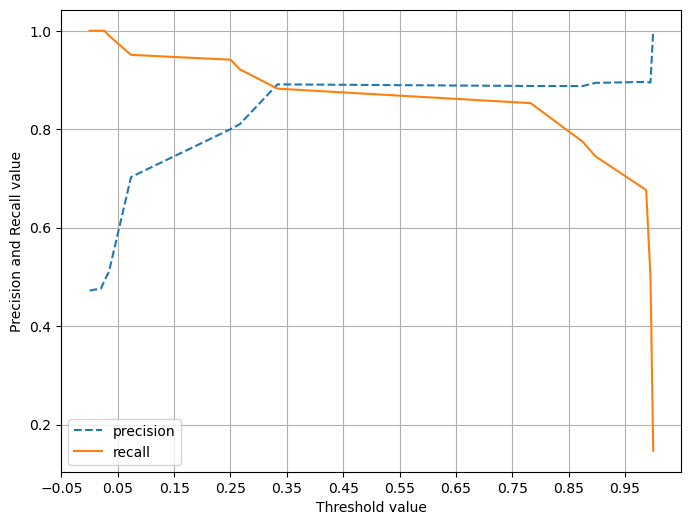

In [38]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### ROC Curve

In [39]:
from sklearn.metrics import roc_curve

# ROC Curve를 시각화해주는 함수
def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

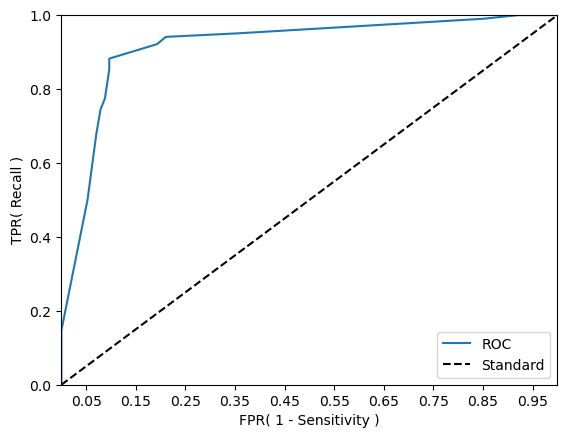

In [40]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 산점도 및 분류 영역 시각화 

In [41]:
import numpy as np

# 데이터의 분포를 산점도로 시각화하고, 모델이 해당 데이터를 분류한 경계와 각 데이터들의 영역을 시각화하는 함수
# 영역의 가시성을 높이기 위해 zorder를 -1로 조정함으로서 영역이 위에 표시되게 함
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=-1)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [42]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

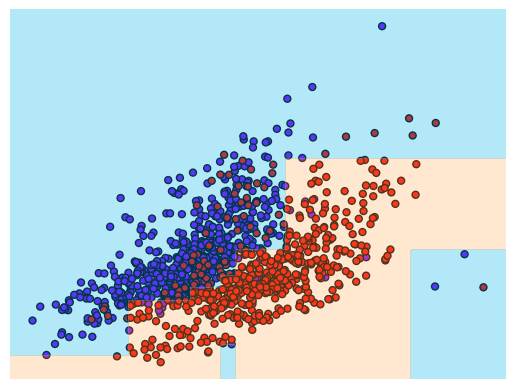

In [43]:
visualize_boundary(dtc, important_features, targets)

#### DTC 모델 학습 결과 
- 결정 트리 분류 모델로 학습한 결과, 평가 지표가 모두 0.87 이상의 높은 수치를 보임
- 또한 과적합 역시 발견되지 않음에 따라 해당 모델이 적절하게 학습되었음을 확인

### 2. SVM (서포트 벡터 머신)

In [44]:
from sklearn.svm import SVC

# SVC에서 사용하는 하이퍼 파라미터 설정
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel': ['linear', 'rbf']}

# SVC 모델 생성
svc = SVC(probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

In [45]:
# SVC 모델로 학습 진행
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=124))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [46]:
# 위 모델의 학습 결과를 데이터프레임으로 작성 후 출력
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(svc_result_df)

params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.839560   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.736264   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.839560   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.795604   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.839560   
..                                                ...              ...   
67  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.618681   
68  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.969231   
69  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.545055   
70  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.969231   
71  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.551648   

    rank_test_score  
0                44  
1                52  
2                44  
3                50  
4                44  
..              ...  
67               55  
68               15  
69               67  
70               15  
71               61  

[72 rows x 3 columns]

In [47]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터 조합 출력
for params in svc_result_df[svc_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [48]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 변수 svc에 할당
svc = g_svc.best_estimator_

#### 중간 분석
- C를 10 또는 100, gamma는 0.01로 설정하고 rbf 커널을 사용한 모델이 가장 높은 평가 점수를 받은 것을 확인

In [49]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0455
ITSN1_N: 0.0037
pCASP9_N: 0.0032
H3MeK4_N: 0.0006
SHH_N: 0.0005
pERK_N: 0.0005
pNR2A_N: 0.0003
DYRK1A_N: 0.0003
pAKT_N: 0.0002
SYP_N: 0.0002
TIAM1_N: 0.0002
MTOR_N: 0.0002
CAMKII_N: 0.0002
BRAF_N: 0.0
RSK_N: 0.0
SOD1_N: 0.0
TRKA_N: 0.0
Bcatenin_N: 0.0
MEK_N: 0.0
JNK_N: 0.0
GSK3B_N: 0.0
P38_N: 0.0
ERK_N: 0.0
ELK_N: 0.0
CREB_N: 0.0
pNR2B_N: 0.0
AKT_N: 0.0
pRSK_N: 0.0
pPKCAB_N: 0.0
DSCR1_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
PKCA_N: 0.0
pJNK_N: 0.0
pELK_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
NR2A_N: 0.0
NR1_N: 0.0
BDNF_N: 0.0
pMTOR_N: 0.0
Stimulated: 0.0
AMPKA_N: 0.0
NR2B_N: 0.0
GluR3_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
CaNA_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
pPKCG_N: 0.0
Treatment: 0.0
RAPTOR_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
ERBB4_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1

In [50]:
# SVC 모델로 테스트 데이터 예측
svc_prediction = svc.predict(X_test)

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


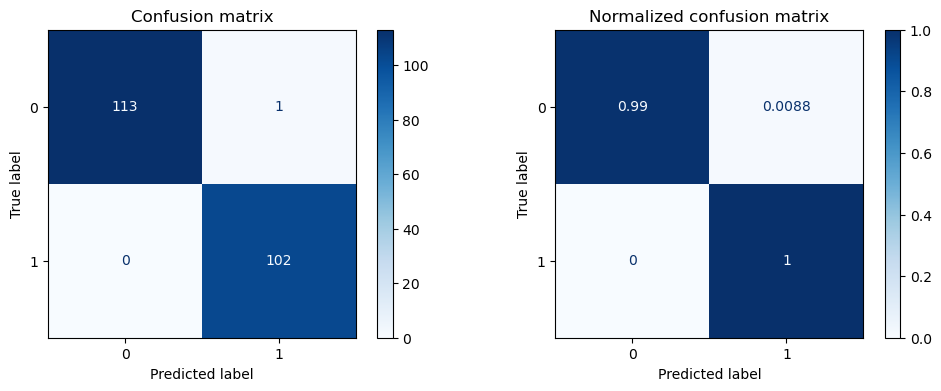

In [51]:
get_evaluation(y_test, svc_prediction, svc, X_test)

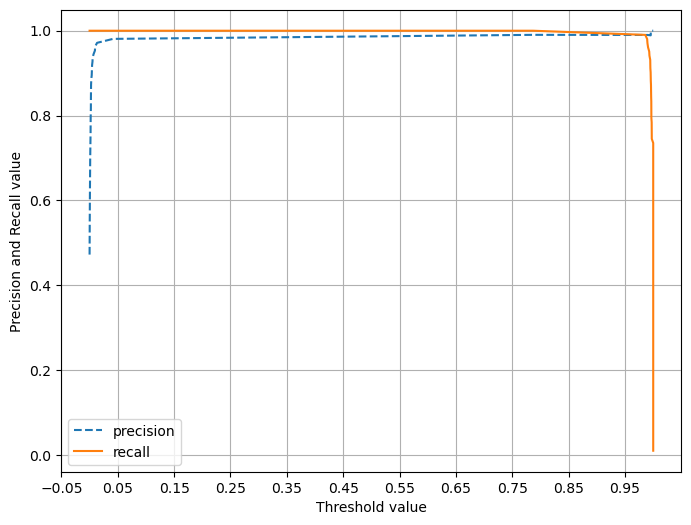

In [52]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

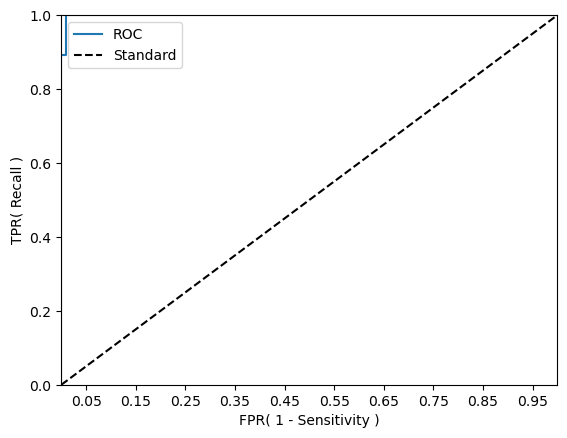

In [53]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [54]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'ITSN1_N']]

important_features

APP_N   ITSN1_N
0     0.453910  0.747193
1     0.430940  0.689064
2     0.423187  0.730247
3     0.410615  0.617076
4     0.398550  0.617430
...        ...       ...
1074  0.372216  0.463591
1075  0.360990  0.474163
1076  0.309978  0.395179
1077  0.341172  0.412894
1078  0.402982  0.461059

[1079 rows x 2 columns]

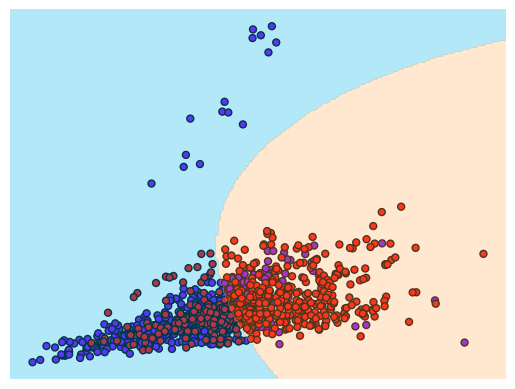

In [55]:
visualize_boundary(svc, important_features, targets)

#### SVC 모델 학습 결과
- SVC 모델로 학습한 결과, 평가 지표가 모두 1에 근접한 수치를 보임
- 또한 산점도와 분류 영역을 시각화한 결과, DTC와는 다른 곡선 경계가 출력되었으며  
  이는 gamma 파라미터의 영향을 보여주는 자료로 판단됨
- 다만, 데이터 분류 영역으로 보아, 과소 적합의 가능성을 배제할 수 없음

### 3. KNN (K-최근접 이웃 알고리즘)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# KNN에 사용할 하이퍼 파라미터 설정
knn_c_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

# 데이터 표준화 후 KNN을 거치는 파이프라인을 생성하고
# 이와 하이퍼 파라미터로 교차 검증을 진행하는 모델 생성
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [57]:
# KNN에 학습 방법만 저장
# Lazy Learning 모델이기 때문에 새로운 데이터가 들어와야 학습을 함
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [58]:
# KNN으로 학습한 결과의 교차 검증결과를 데이터프레임으로 만듬 
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'][0])
display(knn_result_df)

{'knn__n_neighbors': 3}


params  mean_test_score  rank_test_score
0   {'knn__n_neighbors': 3}         0.989011                1
1   {'knn__n_neighbors': 5}         0.975824                2
2   {'knn__n_neighbors': 7}         0.965934                3
3   {'knn__n_neighbors': 9}         0.954945                4
4  {'knn__n_neighbors': 11}         0.947253                5

#### 중간 분석
- 이웃한 데이터 수가 3일 때 성능 평가 점수가 가장 높은 것을 확인

In [59]:
# 위에서 얻은 최적의 하이퍼 파라미터 값을 가진 새로운 KNN 모델 및 파이프라인 생성
# KNN에는 best_estimator가 없기 때문에 재선언해야 됨
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

# 재선언된 파이프라인을 통해 학습 진행
knn_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [60]:
# KNN 모델로 예측
knn_prediction = knn_pipe.predict(X_test)

In [61]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(knn_pipe, X_test, y_test, n_repeats=10, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

pP70S6_N: 0.0014
pNR2A_N: 0.0009
pCASP9_N: 0.0009
BAD_N: 0.0005
Stimulated: 0.0
MEK_N: 0.0
CAMKII_N: 0.0
CREB_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
JNK_N: 0.0
TRKA_N: 0.0
AKT_N: 0.0
RSK_N: 0.0
APP_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
BRAF_N: 0.0
pPKCAB_N: 0.0
pRSK_N: 0.0
AMPKA_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pERK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2B_N: 0.0
DSCR1_N: 0.0
pNUMB_N: 0.0
NR2B_N: 0.0
GluR3_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
SYP_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
Treatment: 0.0
Tau_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
nNOS_N: 0.

오차 행렬
[[114   0]
 [  0 102]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000, ROC-AUC: 1.0000
################################################################################


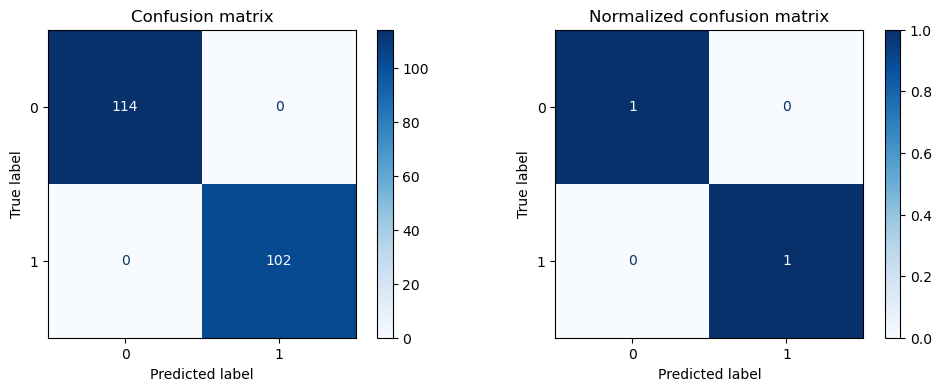

In [62]:
get_evaluation(y_test, knn_prediction, knn_pipe, X_test)

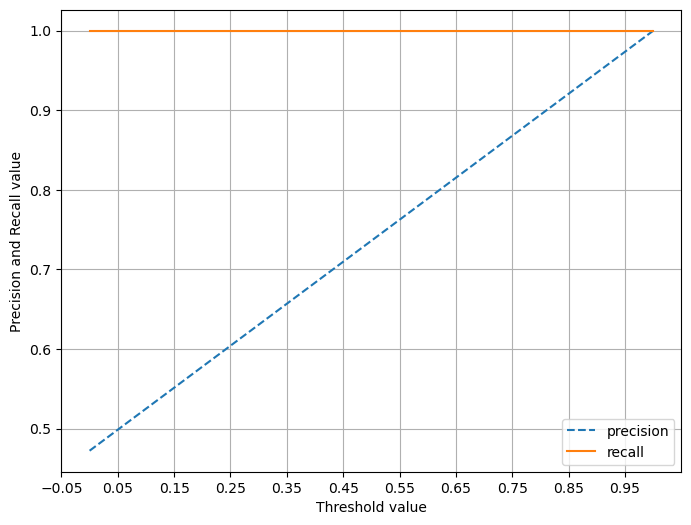

In [63]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

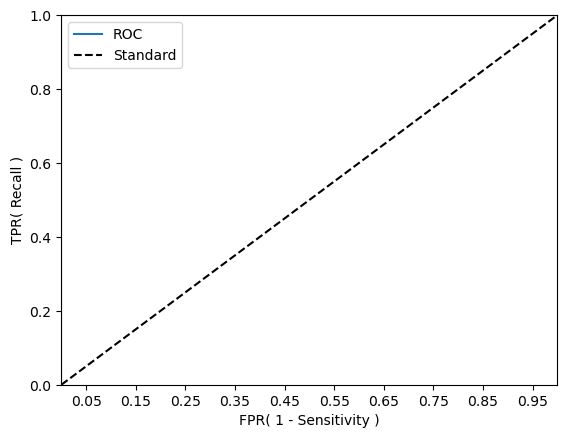

In [64]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [65]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['pP70S6_N', 'pNR2A_N']]

important_features

pP70S6_N   pNR2A_N
0     0.294170  0.605673
1     0.276431  0.587559
2     0.256648  0.602449
3     0.398534  0.520293
4     0.393447  0.507990
...        ...       ...
1074  0.527041  0.510604
1075  0.518377  0.524381
1076  0.460202  0.442638
1077  0.490496  0.479522
1078  0.546729  0.502225

[1079 rows x 2 columns]

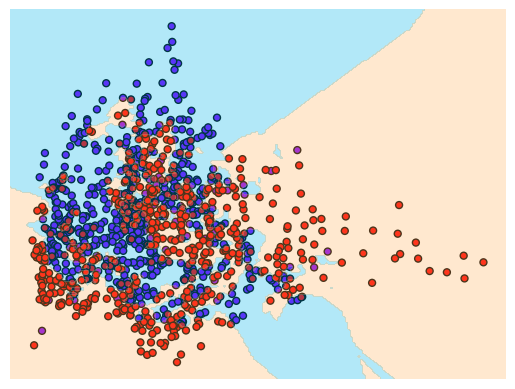

In [66]:
visualize_boundary(knn_pipe, important_features, targets)

### KNN 모델 학습 결과
- KNN 모델 학습 결과 정확도와 오차 행렬이 전부 1로,  
  단 하나의 오답도 없이 테스트 데이터를 정확하게 예측한 것을 확인
- 다만, 산점도 시각화 결과 데이터의 과적합이 발견됨

### 앙상블 학습
1. Voting
> - 위의 모델들을 사용하여 Hard Voting과 Soft Voting 진행

2. Bagging
> - Random Forest

3. Boosting
>- Adaboost
>- GBM
>- XGBoost
>- LightGBM

### 4. Voting 
- 각자의 산점도를 출력하는 과정에서 가장 중요한 feature 2가지로만 다시 학습하는 현상이  
  발생했으니, best_estimator 또는 최적의 하이퍼 파라미터 튜닝을 다시 진행한 다음 Voting 진행

In [67]:
# 하이퍼 파라미터가 최적화된 모델로 재설정
dtc = g_dtc.best_estimator_
svc = g_svc.best_estimator_
knn = KNeighborsClassifier(n_neighbors=3)

dtc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('dtc', dtc)])
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

#### 4-1. Hard Voting

In [68]:
from sklearn.ensemble import VotingClassifier

# 위의 모델 별 파이프라인을 통해 Hard Voting을 실행하는 분류 모델 객체 생성
h_vc = VotingClassifier(estimators=[('dtc', dtc_pipe),
                                    ('svc', svc_pipe),
                                    ('knn', knn_pipe)
                                   ],
                        voting='hard',
                        n_jobs=-1)

In [69]:
# Hard Voting 모델로 학습 진행
h_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('dtc',
                                                                DecisionTreeClassifier(max_depth=5,
                                                                                       min_samples_split=40))]))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('svc',
                                                                SVC(C=10,
                                                                    gamma=0.01,
                                                                    probability=True,
                                                                    random_state=124))]))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 n_jobs=-1)

In [70]:
# Hard Voting 모델로 테스트 데이터 예측
h_vc_prediction = h_vc.predict(X_test)

In [71]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(h_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0417
pCASP9_N: 0.0009
pERK_N: 0.0005
SYP_N: 0.0005
Stimulated: 0.0
CAMKII_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
JNK_N: 0.0
MEK_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
AKT_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
DSCR1_N: 0.0
BRAF_N: 0.0
pPKCAB_N: 0.0
pRSK_N: 0.0
NR2B_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2A_N: 0.0
pNR2B_N: 0.0
AMPKA_N: 0.0
pNUMB_N: 0.0
Treatment: 0.0
SHH_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
RAPTOR_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR3_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
DYRK1A_N: 

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


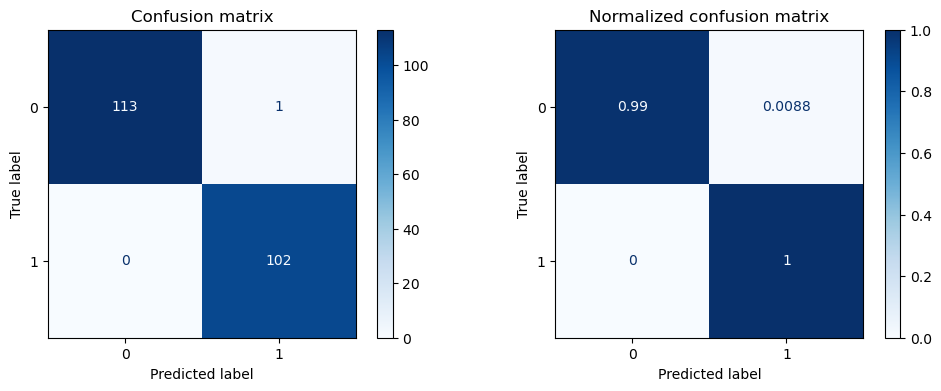

In [72]:
# Hard Voting 모델의 에측 결과 시각화
get_evaluation(y_test, h_vc_prediction, h_vc, X_test)

#### 중간 분석
- Hard Voting 모델의 경우, predict_proba를 지원하지 않음
- 따라서 해당 메소드를 사용하여 시각화할 수 있는 Trade-off와 ROC Curve는 이번 모델에서 시각화하지 않음

In [73]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'pCASP9_N']]

important_features

APP_N  pCASP9_N
0     0.453910  1.603310
1     0.430940  1.671738
2     0.423187  1.663550
3     0.410615  1.484624
4     0.398550  1.534835
...        ...       ...
1074  0.372216  1.323554
1075  0.360990  1.275605
1076  0.309978  1.437534
1077  0.341172  1.498820
1078  0.402982  1.490077

[1079 rows x 2 columns]

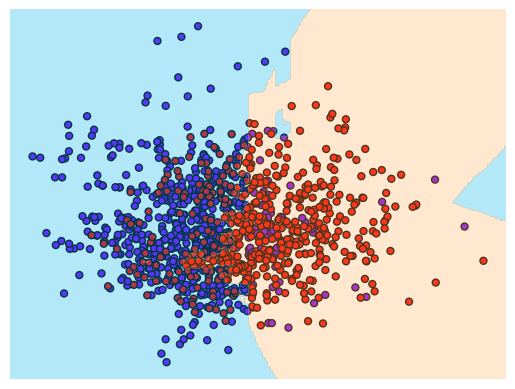

In [74]:
visualize_boundary(h_vc, important_features, targets)

#### Hard Voting 학습 결과
- 모델의 분류 성능이 거의 완벽에 가까운 양상을 보임
- 산점도와 분류 영역을 시각화 한 결과로 보더라도 과적합이 발견되지 않음

#### 4-2. Soft Voting

In [75]:
# Soft Voting을 실행하는 분류 모델 객체 생성
so_vc = VotingClassifier(estimators=[('dtc', dtc_pipe),
                                    ('svc', svc_pipe),
                                    ('knn', knn_pipe)
                                   ],
                        voting='soft',
                        n_jobs=-1)

In [76]:
# Soft Voting 모델로 학습 진행
so_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('dtc',
                                                                DecisionTreeClassifier(max_depth=5,
                                                                                       min_samples_split=40))]))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('svc',
                                                                SVC(C=10,
                                                                    gamma=0.01,
                                                                    probability=True,
                                                                    random_state=124))]))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 n_jobs=-1, voting='soft')

In [77]:
# Soft Voting 모델로 테스트 데이터 예측
so_vc_prediction = so_vc.predict(X_test)

In [78]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(so_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0412
pCASP9_N: 0.0009
SYP_N: 0.0005
Stimulated: 0.0
JNK_N: 0.0
BRAF_N: 0.0
CAMKII_N: 0.0
CREB_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
TRKA_N: 0.0
MEK_N: 0.0
pRSK_N: 0.0
RSK_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
AKT_N: 0.0
pPKCAB_N: 0.0
AMPKA_N: 0.0
pNR2B_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pERK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2A_N: 0.0
DSCR1_N: 0.0
pNUMB_N: 0.0
NR2B_N: 0.0
SHH_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
Treatment: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR3_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
D

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


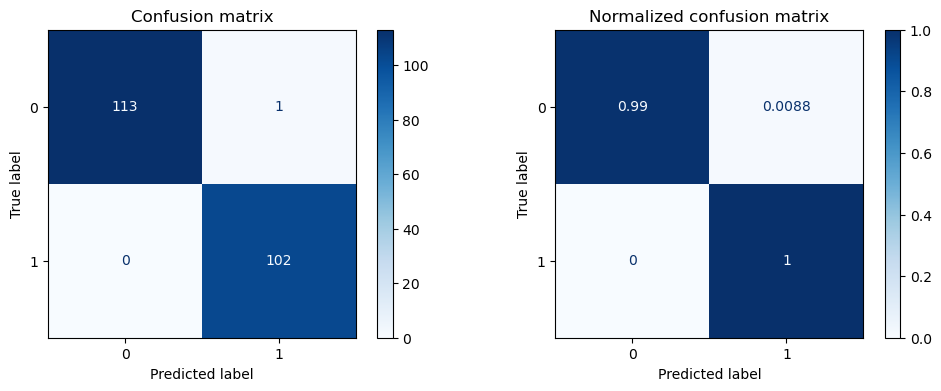

In [79]:
# Soft Voting 모델의 에측 결과 시각화
get_evaluation(y_test, so_vc_prediction, so_vc, X_test)

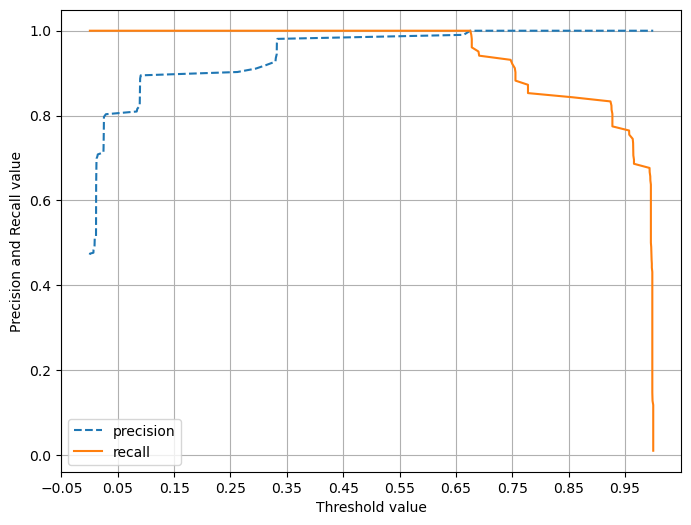

In [80]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

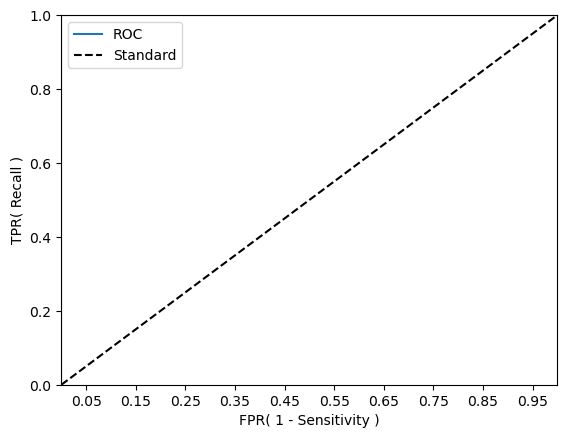

In [81]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [82]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'pCASP9_N']]

important_features

APP_N  pCASP9_N
0     0.453910  1.603310
1     0.430940  1.671738
2     0.423187  1.663550
3     0.410615  1.484624
4     0.398550  1.534835
...        ...       ...
1074  0.372216  1.323554
1075  0.360990  1.275605
1076  0.309978  1.437534
1077  0.341172  1.498820
1078  0.402982  1.490077

[1079 rows x 2 columns]

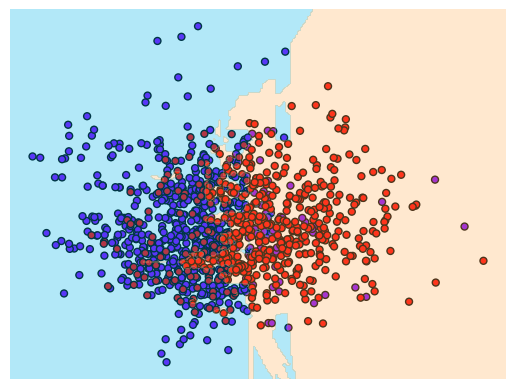

In [83]:
visualize_boundary(so_vc, important_features, targets)

#### Soft Voting 학습 결과
- Hard Voting과 Soft Voting 양쪽의 오차 행렬이 동일한 것을 확인
- 이와 같은 현상이 발생한 이유로는 Voting에 사용한 SVC와 KNN 모델의 평가 점수가 매우 높았기 때문인 것으로 추정
- 이 모델의 산점도 역시 Hard Voting과 비슷한 양상으로, 과적합은 방생하지 않음

### 5. Bagging - Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트에 사용할 하이퍼 파라미터 지정
rfc_parameters = {
    'rfc__max_depth': [3, 4, 5],
    'rfc__min_samples_split': [40, 60, 80]
}

# 랜덤 포레스트 모델 객체 생성
rfc = RandomForestClassifier(n_estimators=100, random_state=124)

# 표준화와 위 모델을 순서대로 거치는 파이프라인 생성 후, 각 하이퍼 파라미터의 조합 별로 교차 검증하는 모델 생성
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True)

In [85]:
# 위 모델로 학습 진행
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=124))]),
             param_grid={'rfc__max_depth': [3, 4, 5],
                         'rfc__min_samples_split': [40, 60, 80]},
             return_train_score=True)

In [86]:
# 랜덤 포레스트 모델의 파라미터 조합 별 평가 점수 및 순위를 데이터프레임 형식으로 제작 후 출력
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터 조합도 출력
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(rfc_result_df['params'][6])
display(rfc_result_df)

{'rfc__max_depth': 5, 'rfc__min_samples_split': 40}


params  mean_test_score  \
0  {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.883516   
1  {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.887912   
2  {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.875824   
3  {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.916484   
4  {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.913187   
5  {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.906593   
6  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.937363   
7  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.930769   
8  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.909890   

   rank_test_score  
0                8  
1                7  
2                9  
3                3  
4                4  
5                6  
6                1  
7                2  
8                5

#### 중간 분석
- DTC와 마찬가지로, max_depth가 5, min_samples_spilt이 40일 때 평균 평가 점수가 가장 높은 것을 확인.
- 하지만 이 때의 평가 점수는 0.93으로, DTC의 0.87보다 높은 양상을 보임

In [87]:
# 가장 좋은 평가를 받은 파라미터를 랜덤 포레스트 모델에 할당
rfc = g_rfc.best_estimator_

# 위 모델로 테스트 데이터 예측
rfc_prediction = rfc.predict(X_test)

In [88]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0645
Tau_N: 0.0198
SOD1_N: 0.019
pPKCAB_N: 0.0167
H3MeK4_N: 0.0123
Stimulated: 0.0122
GluR3_N: 0.012
NR2A_N: 0.012
DSCR1_N: 0.0111
SYP_N: 0.011
DYRK1A_N: 0.0108
AMPKA_N: 0.0106
ITSN1_N: 0.0106
RRP1_N: 0.0097
NR2B_N: 0.0096
GSK3B_N: 0.0096
pERK_N: 0.0093
TIAM1_N: 0.008
pCFOS_N: 0.0079
S6_N: 0.0077
BDNF_N: 0.0074
PKCA_N: 0.0071
pNUMB_N: 0.0068
MTOR_N: 0.0063
ADARB1_N: 0.0063
pMTOR_N: 0.0062
ARC_N: 0.0062
pS6_N: 0.0054
BRAF_N: 0.0052
ERK_N: 0.0051
IL1B_N: 0.0051
AcetylH3K9_N: 0.0048
pGSK3B_Tyr216_N: 0.0048
BCL2_N: 0.0046
Ubiquitin_N: 0.0045
P70S6_N: 0.0045
CaNA_N: 0.0043
pCAMKII_N: 0.0042
pNR2A_N: 0.0035
H3AcK18_N: 0.0034
pP70S6_N: 0.0032
pGSK3B_N: 0.0032
pNR1_N: 0.0029
pCASP9_N: 0.0029
Treatment: 0.0029
CDK5_N: 0.0028
NR1_N: 0.0025
pPKCG_N: 0.0023
RAPTOR_N: 0.0017
SHH_N: 0.0014
P38_N: 0.0014
ELK_N: 0.0012
GluR4_N: 0.0011
PSD95_N: 0.0011
ERBB4_N: 0.0008
P3525_N: 0.0003
AKT_N: 0.0002
pELK_N: 0.0002
pNR2B_N: 0.0002
Bcatenin_N: 0.0
BAX_N: 0.0
SNCA_N: 0.0
pBRAF_N: 0.0
BAD_N: 0.0
CREB

오차 행렬
[[111   3]
 [  5  97]]
정확도: 0.9630, 정밀도: 0.9634, 재현율: 0.9623, F1: 0.9628, ROC-AUC: 0.9623
################################################################################


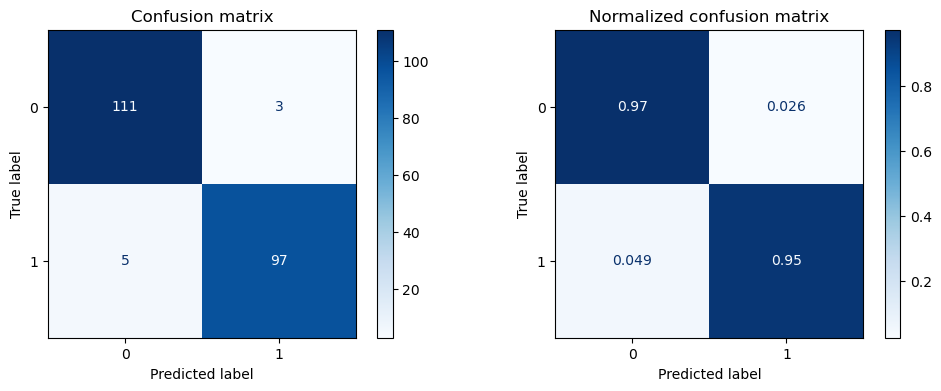

In [89]:
# 랜덤 포레스트 모델의 정확도 및 오차 행렬 출력
get_evaluation(y_test, rfc_prediction, rfc, X_test)

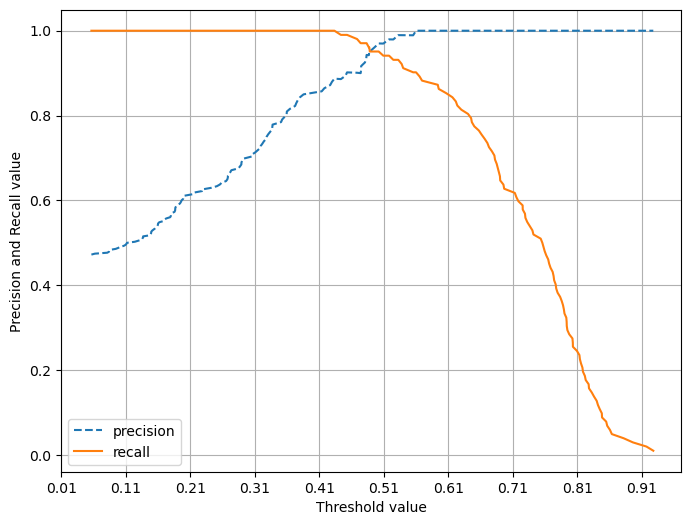

In [90]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

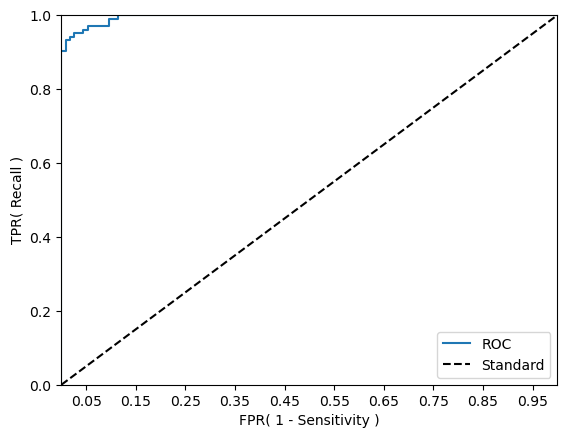

In [91]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [92]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'Tau_N']]

important_features

APP_N     Tau_N
0     0.453910  0.125190
1     0.430940  0.134275
2     0.423187  0.132560
3     0.410615  0.123210
4     0.398550  0.136838
...        ...       ...
1074  0.372216  0.411286
1075  0.360990  0.402073
1076  0.309978  0.395648
1077  0.341172  0.414200
1078  0.402982  0.393170

[1079 rows x 2 columns]

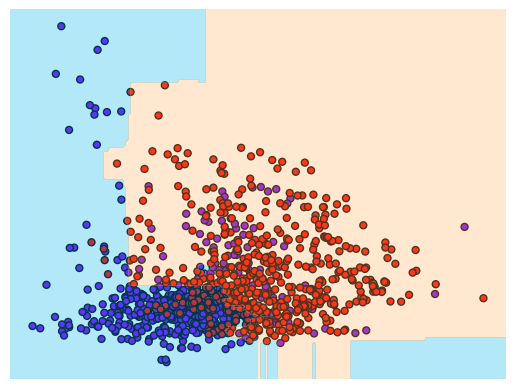

In [93]:
visualize_boundary(rfc, important_features, targets)

#### Random Forest 학습 결과
- 랜덤 포레스트 모델로 학습한 결과, 결정 트리 모델을 썼을 때에 비해서 평가 지표에서 더 우수한 결과를 보임
- 이는 무작위로 생성된 100개의 모델을 활용하여 더 많은 학습을 진행했기 때문인 것으로 추정
- 산점도와 분류 영역을 시각화 했을 때, 이번 모델에서는 과적합이 발생하지 않은 것을 확인

### 6. Boosting (부스팅)

> 1. Adaboost (Adaptive Boost)
> 2. GBM (Gradient Boosting Machine)
> 3. XGBoost (EXtra Gradient Boost)
> 4. LightGBM (Light Gradient Boosting Machine)

#### 6-1. Adaboost (Adaptive Boost)

In [94]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost의 교차 검증에 사용할 하이퍼 파라미터
ada_parameters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(random_state=124)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [95]:
# 위 모델로 학습 및 교차 검증 진행
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]},
             return_train_score=True)

In [96]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(ada_result_df['params'][10])
display(ada_result_df)

{'ada__learning_rate': 1, 'ada__n_estimators': 100}


params  mean_test_score  \
0   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.919780   
1   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.942857   
2   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.951648   
3   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.945055   
4   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.954945   
5   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.959341   
6   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.950549   
7   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.960440   
8   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.963736   
9   {'ada__learning_rate': 1, 'ada__n_estimators':...         0.948352   
10  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.971429   
11  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.967033   

    rank_test_score  
0                12  
1                11  
2                 7  
3                10  
4                 6  
5                 5  
6                 8  
7                 4  
8                 3  
9                 9  
10                1  
11                2

In [97]:
# 가장 좋은 평가를 받은 파라미터를 Adaboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

In [98]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(ada, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2164
AMPKA_N: 0.0611
pPKCAB_N: 0.0386
ITSN1_N: 0.0377
CAMKII_N: 0.0295
GluR3_N: 0.0241
pNR1_N: 0.0235
NR2B_N: 0.0228
PKCA_N: 0.0196
pNR2A_N: 0.0179
Tau_N: 0.0174
BRAF_N: 0.0165
pERK_N: 0.0159
pNUMB_N: 0.0156
pMTOR_N: 0.0151
GluR4_N: 0.0147
pPKCG_N: 0.014
P38_N: 0.0134
Ubiquitin_N: 0.0134
RRP1_N: 0.0133
pGSK3B_N: 0.0123
DSCR1_N: 0.0122
BDNF_N: 0.0105
pS6_N: 0.0102
S6_N: 0.01
pJNK_N: 0.0096
MTOR_N: 0.0094
CaNA_N: 0.0094
NR2A_N: 0.0093
BCL2_N: 0.008
Stimulated: 0.0068
AcetylH3K9_N: 0.0063
P3525_N: 0.0057
ELK_N: 0.0054
H3MeK4_N: 0.0051
Treatment: 0.0045
SOD1_N: 0.0039
IL1B_N: 0.0032
ERBB4_N: 0.0022
pCASP9_N: 0.0019
H3AcK18_N: 0.0015
TIAM1_N: 0.0011
AKT_N: 0.0
pRSK_N: 0.0
BAD_N: 0.0
pNR2B_N: 0.0
SHH_N: 0.0
pMEK_N: 0.0
SNCA_N: 0.0
pELK_N: 0.0
pCFOS_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pAKT_N: 0.0
NR1_N: 0.0
EGR1_N: 0.0
PSD95_N: 0.0
CDK5_N: 0.0
CREB_N: 0.0
ADARB1_N: 0.0
P70S6_N: 0.0
NUMB_N: 0.0
pP70S6_N: 0.0
RAPTOR_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
nNOS_N: 0.0
GFAP_N: 0.0
DYRK1A_N: 0.0
Bcat

오차 행렬
[[111   3]
 [  3  99]]
정확도: 0.9722, 정밀도: 0.9721, 재현율: 0.9721, F1: 0.9721, ROC-AUC: 0.9721
################################################################################


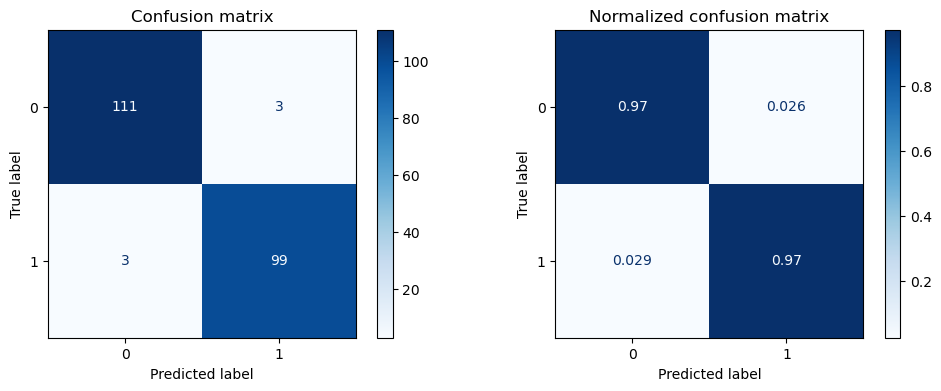

In [99]:
# 위 예측의 정확도와 오차행렬 시각화
get_evaluation(y_test, ada_prediction, ada, X_test)

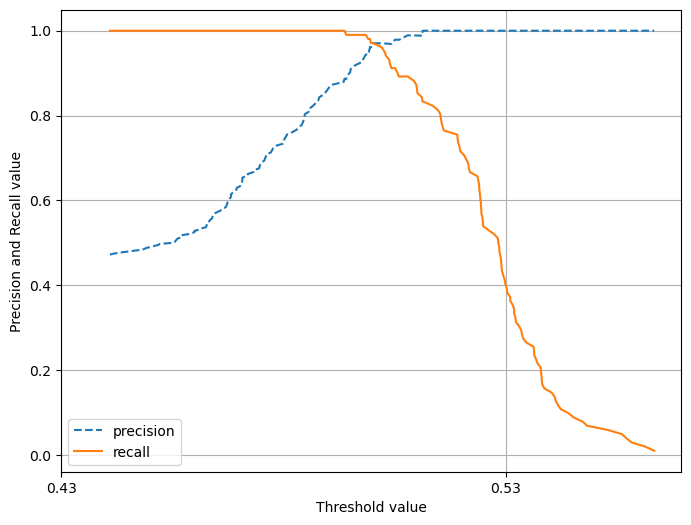

In [100]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

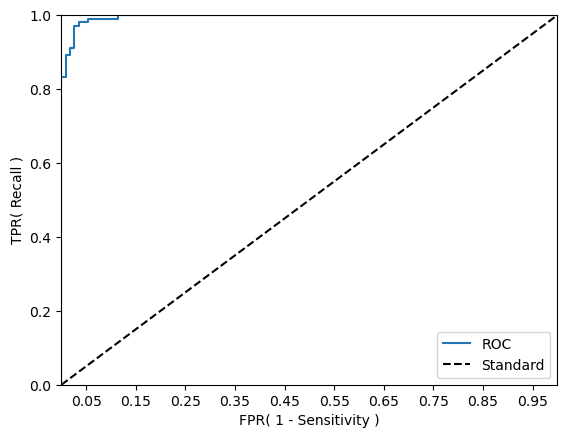

In [101]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [102]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

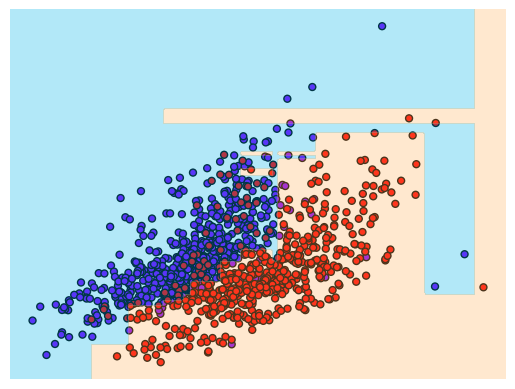

In [103]:
visualize_boundary(ada, important_features, targets)

#### Adaboost 학습 결과
- Adaboost 모델로 학습한 결과, learning_rate가 1, n_estimators가 100일 때 가장 우수한 평가 점수를 보임
- 또한 산점도와 분류 영역 시각화 결과, 과적합도 일어나지 않은 것으로 판단

#### 6-2. GBM (Gradient Boosting Machine)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM의 교차 검증에 사용할 하이퍼 파라미터
gbm_parameters = {
    'gbm__loss': ['log_loss', 'exponential'],
    'gbm__n_estimators': [50, 100, 150],
    'gbm__learning_rate': [0.3, 0.5, 0.7, 1],
    'gbm__subsample': [0.3, 0.5, 0.7, 1]
}

# 표준화와 GBM을 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
gbm = GradientBoostingClassifier(random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])
g_gbm = GridSearchCV(gbm_pipe, param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [105]:
# 위 모델로 학습 및 교차 검증 진행
g_gbm.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbm',
                                        GradientBoostingClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'gbm__learning_rate': [0.3, 0.5, 0.7, 1],
                         'gbm__loss': ['log_loss', 'exponential'],
                         'gbm__n_estimators': [50, 100, 150],
                         'gbm__subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [106]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

params  mean_test_score  \
0   {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.951648   
1   {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.975824   
2   {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.971429   
3   {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.975824   
4   {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.972527   
..                                                ...              ...   
91  {'gbm__learning_rate': 1, 'gbm__loss': 'expone...         0.983516   
92  {'gbm__learning_rate': 1, 'gbm__loss': 'expone...         0.968132   
93  {'gbm__learning_rate': 1, 'gbm__loss': 'expone...         0.975824   
94  {'gbm__learning_rate': 1, 'gbm__loss': 'expone...         0.979121   
95  {'gbm__learning_rate': 1, 'gbm__loss': 'expone...         0.985714   

    rank_test_score  
0                81  
1                38  
2                56  
3                41  
4                52  
..              ...  
91                7  
92               65  
93               41  
94               23  
95                2  

[96 rows x 3 columns]

In [107]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'gbm__learning_rate': 0.5, 'gbm__loss': 'log_loss', 'gbm__n_estimators': 150, 'gbm__subsample': 1}


In [108]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.5,
                                 loss='log_loss',
                                 n_estimators=150,
                                 subsample=1,
                                 random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])

gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=150,
                                            random_state=124, subsample=1))])

In [109]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm_pipe.predict(X_test)

In [110]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2458
ITSN1_N: 0.0313
AMPKA_N: 0.0262
pPKCAB_N: 0.0144
pGSK3B_N: 0.011
GluR3_N: 0.0093
Tau_N: 0.0086
pMTOR_N: 0.0073
AcetylH3K9_N: 0.0069
CaNA_N: 0.0066
Ubiquitin_N: 0.006
NR2B_N: 0.0057
pPKCG_N: 0.0056
CAMKII_N: 0.0046
pAKT_N: 0.0045
pNUMB_N: 0.0043
TRKA_N: 0.004
GSK3B_N: 0.0035
P38_N: 0.0031
SOD1_N: 0.0028
ERBB4_N: 0.0025
Stimulated: 0.0025
pERK_N: 0.0023
SYP_N: 0.0023
BDNF_N: 0.0014
pNR1_N: 0.0012
BRAF_N: 0.0012
MTOR_N: 0.0009
S6_N: 0.0008
DSCR1_N: 0.0006
TIAM1_N: 0.0006
ELK_N: 0.0006
ADARB1_N: 0.0006
IL1B_N: 0.0005
pNR2A_N: 0.0003
JNK_N: 0.0003
H3AcK18_N: 0.0002
pCFOS_N: 0.0002
DYRK1A_N: 0.0002
NR2A_N: 0.0
MEK_N: 0.0
pELK_N: 0.0
pMEK_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
pRSK_N: 0.0
AKT_N: 0.0
EGR1_N: 0.0
NR1_N: 0.0
H3MeK4_N: 0.0
GFAP_N: 0.0
nNOS_N: 0.0
Treatment: 0.0
ARC_N: 0.0
BAX_N: 0.0
CDK5_N: 0.0
P3525_N: 0.0
pCASP9_N: 0.0
P70S6_N: 0.0
NUMB_N: 0.0
pP70S6_N: 0.0
RSK_N: 0.0
RAPTOR_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BAD_N: 0.0
Bcaten

오차 행렬
[[112   2]
 [  1 101]]
정확도: 0.9861, 정밀도: 0.9859, 재현율: 0.9863, F1: 0.9861, ROC-AUC: 0.9863
################################################################################


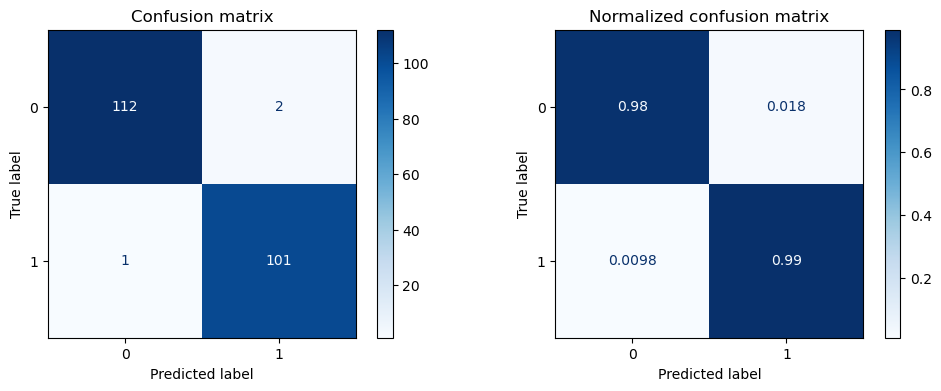

In [111]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

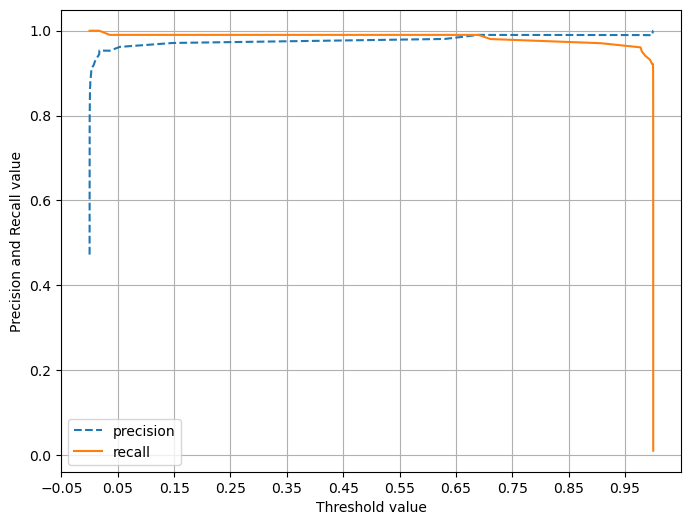

In [112]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

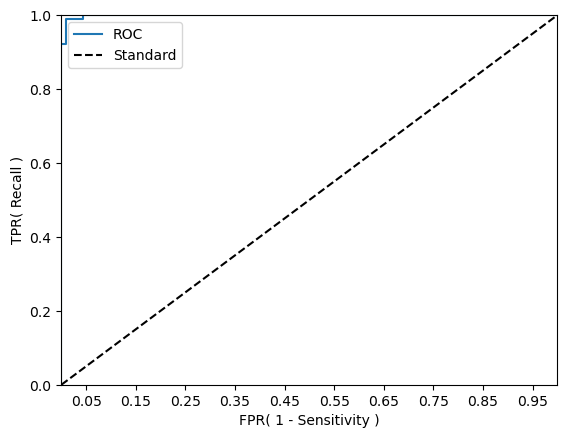

In [113]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [114]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'ITSN1_N']]

important_features

APP_N   ITSN1_N
0     0.453910  0.747193
1     0.430940  0.689064
2     0.423187  0.730247
3     0.410615  0.617076
4     0.398550  0.617430
...        ...       ...
1074  0.372216  0.463591
1075  0.360990  0.474163
1076  0.309978  0.395179
1077  0.341172  0.412894
1078  0.402982  0.461059

[1079 rows x 2 columns]

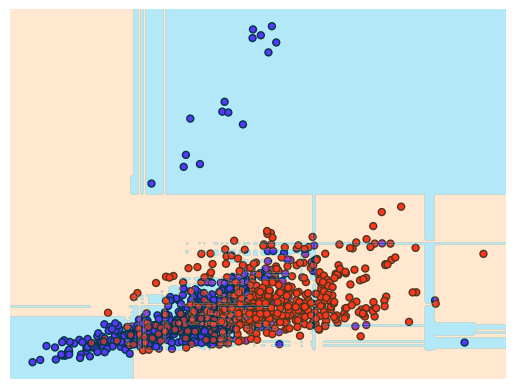

In [115]:
visualize_boundary(gbm_pipe, important_features, targets)

In [117]:
gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=150,
                                            random_state=124, subsample=1))])

In [118]:
gbm_prediction = gbm_pipe.predict(X_test)

오차 행렬
[[112   2]
 [  1 101]]
정확도: 0.9861, 정밀도: 0.9859, 재현율: 0.9863, F1: 0.9861, ROC-AUC: 0.9863
################################################################################


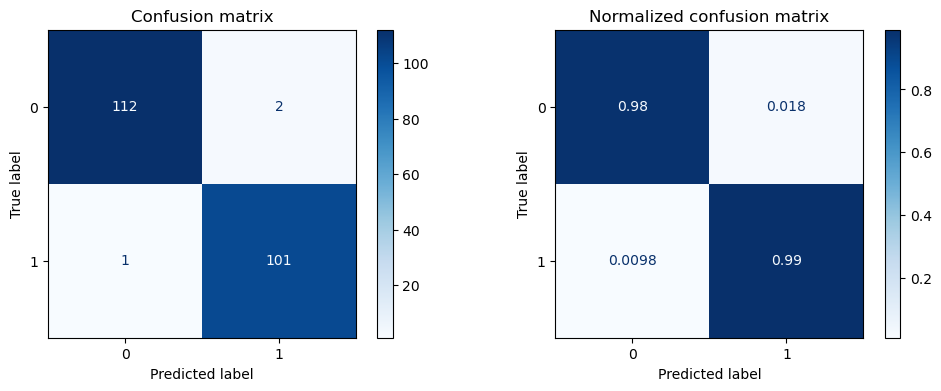

In [119]:
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

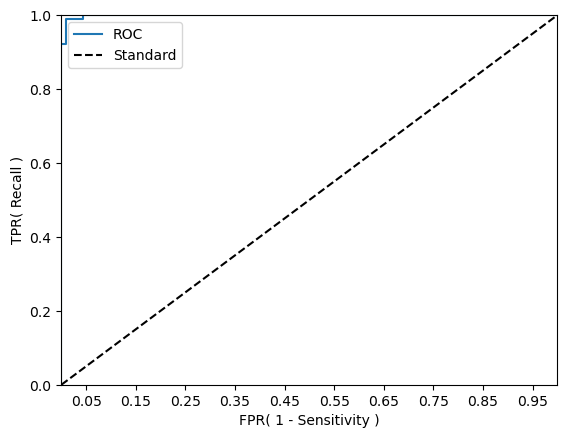

In [120]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### GBM 학습 결과
- GBM 학습 결과, learning_rate는 0.5, n_estimators는 150,  
  subsample은 1이고, 로그 손실 함수를 사용한 모델의 평가 점수가 가장 높은 것을 확인함
- subsample이 1로 되었기 때문에 과적합이 발생

#### 6-3. XGBoost (Extra Gradient Boost)

In [121]:
from xgboost import XGBClassifier

# 학습용 데이터를 한 번 더 분리하여 evalset에 사용할 데이터 생성
X_val_train, X_val_test, y_val_train, y_val_test = \
                train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# SMOTE로 위 데이터 오버 샘플링
X_val_train_over, y_val_train_over = smote.fit_resample(X_val_train, y_val_train)

# evalset 생성
evals = [(X_val_train_over, y_val_train_over), (X_val_test, y_val_test)]

y_val_train_over.value_counts()

Target
0    364
1    364
Name: count, dtype: int64

In [122]:
# XGBoost의 교차 검증에 사용할 하이퍼 파라미터
xgb_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'subsample': [0.3, 0.5, 0.7, 1],
    'early_stopping_rounds': [10, 30, 50, 70, 100]
}

# XGBoost 모델로 교차 검증
xgb = XGBClassifier(seed=124)

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [123]:
# 위 모델로 교차 검증 진행
g_xgb.fit(X_train_over, y_train_over, eval_set=evals)

[0]	validation_0-logloss:0.49939	validation_1-logloss:0.51149
[1]	validation_0-logloss:0.37276	validation_1-logloss:0.38000
[2]	validation_0-logloss:0.30087	validation_1-logloss:0.29936
[3]	validation_0-logloss:0.23621	validation_1-logloss:0.23121
[4]	validation_0-logloss:0.18895	validation_1-logloss:0.18426
[5]	validation_0-logloss:0.15681	validation_1-logloss:0.15009
[6]	validation_0-logloss:0.12724	validation_1-logloss:0.12392
[7]	validation_0-logloss:0.10529	validation_1-logloss:0.10398
[8]	validation_0-logloss:0.09057	validation_1-logloss:0.08854
[9]	validation_0-logloss:0.07837	validation_1-logloss:0.07501
[10]	validation_0-logloss:0.06778	validation_1-logloss:0.06707
[11]	validation_0-logloss:0.06013	validation_1-logloss:0.05804
[12]	validation_0-logloss:0.05284	validation_1-logloss:0.05072
[13]	validation_0-logloss:0.04780	validation_1-logloss:0.04563
[14]	validation_0-logloss:0.04330	validation_1-logloss:0.04132
[15]	validation_0-logloss:0.03798	validation_1-logloss:0.03705
[1

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [10, 30, 50, 70, 100],
                         'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [124]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

for params in xgb_result_df[xgb_result_df['rank_test_score'] == 1]['params']:
    print(params)

display(xgb_result_df)

{'early_stopping_rounds': 10, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 30, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 50, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 70, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 100, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}


params  mean_test_score  \
0    {'early_stopping_rounds': 10, 'learning_rate':...         0.964835   
1    {'early_stopping_rounds': 10, 'learning_rate':...         0.976923   
2    {'early_stopping_rounds': 10, 'learning_rate':...         0.981319   
3    {'early_stopping_rounds': 10, 'learning_rate':...         0.975824   
4    {'early_stopping_rounds': 10, 'learning_rate':...         0.971429   
..                                                 ...              ...   
235  {'early_stopping_rounds': 100, 'learning_rate'...         0.963736   
236  {'early_stopping_rounds': 100, 'learning_rate'...         0.938462   
237  {'early_stopping_rounds': 100, 'learning_rate'...         0.953846   
238  {'early_stopping_rounds': 100, 'learning_rate'...         0.971429   
239  {'early_stopping_rounds': 100, 'learning_rate'...         0.963736   

     rank_test_score  
0                159  
1                 17  
2                  1  
3                 33  
4                 70  
..               ...  
235              164  
236              235  
237              201  
238               70  
239              164  

[240 rows x 3 columns]

In [125]:
# 가장 좋은 평가를 받은 파라미터를 XGboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

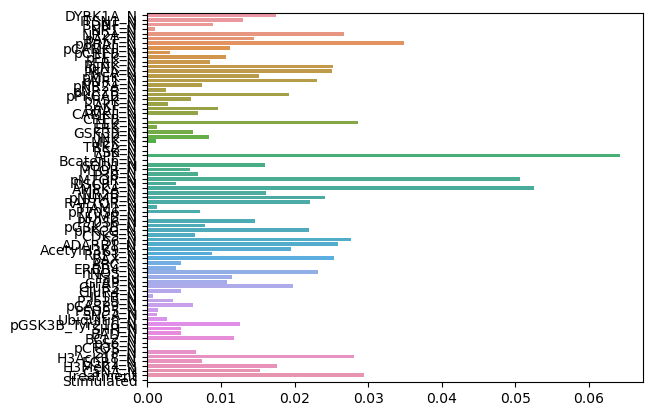

In [126]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=xgb.feature_importances_, y=features.columns)
plt.show()

In [127]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2227
AMPKA_N: 0.0255
ITSN1_N: 0.0134
Tau_N: 0.013
SOD1_N: 0.0106
pNR2A_N: 0.0079
pNUMB_N: 0.0079
AcetylH3K9_N: 0.0056
pPKCG_N: 0.0046
BRAF_N: 0.0046
GluR3_N: 0.0042
P70S6_N: 0.0037
pERK_N: 0.0032
RAPTOR_N: 0.0028
H3MeK4_N: 0.0028
P3525_N: 0.0019
EGR1_N: 0.0019
TIAM1_N: 0.0014
CAMKII_N: 0.0009
ELK_N: 0.0009
pCAMKII_N: 0.0005
pELK_N: 0.0
NR1_N: 0.0
DSCR1_N: 0.0
pAKT_N: 0.0
pMTOR_N: 0.0
pBRAF_N: 0.0
Bcatenin_N: 0.0
pMEK_N: 0.0
AKT_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
MEK_N: 0.0
JNK_N: 0.0
ERK_N: 0.0
pNR2B_N: 0.0
pRSK_N: 0.0
CREB_N: 0.0
Stimulated: 0.0
PSD95_N: 0.0
ARC_N: 0.0
H3AcK18_N: 0.0
pCFOS_N: 0.0
pS6_N: 0.0
BAD_N: 0.0
pGSK3B_Tyr216_N: 0.0
SNCA_N: 0.0
pCASP9_N: 0.0
IL1B_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
DYRK1A_N: 0.0
BAX_N: 0.0
pP70S6_N: 0.0
ADARB1_N: 0.0
pGSK3B_N: 0.0
NUMB_N: 0.0
SYP_N: -0.0005
NR2B_N: -0.0005
MTOR_N: -0.0005
BCL2_N: -0.0009
pJNK_N: -0.0009
CDK5_N: -0.0009
BDNF_N: -0.0014
Ubiquitin_N: -0.0014
GSK3B_N: -0.0014
pCREB_N: -0.0019
pPKCAB_N: -0.0023
pNR1_N: -0.0023
ERBB4_

오차 행렬
[[109   5]
 [  2 100]]
정확도: 0.9676, 정밀도: 0.9672, 재현율: 0.9683, F1: 0.9675, ROC-AUC: 0.9683
################################################################################


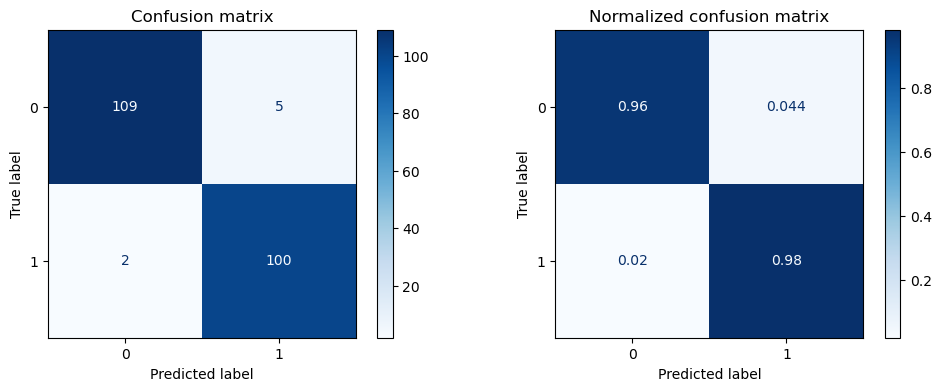

In [128]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

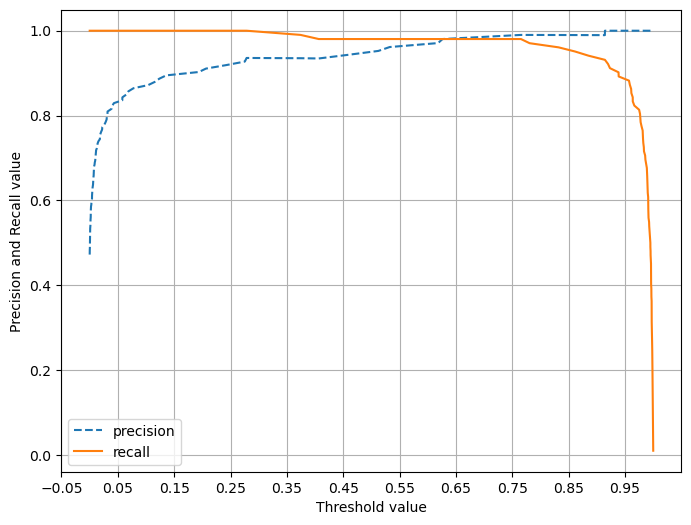

In [129]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

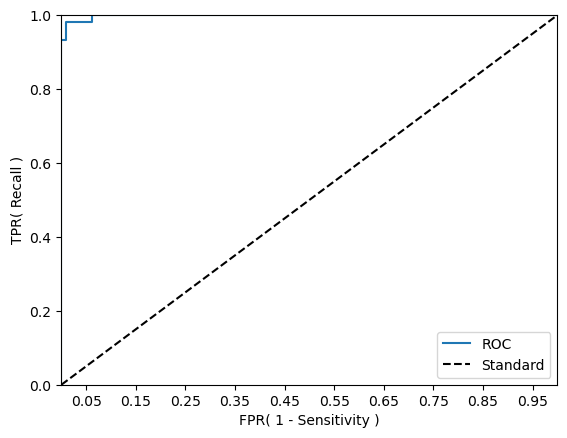

In [130]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### XGBoost 모델 학습 결과
- XGBoost 모델 학습 결과, learning_rate는 0.3, n_estimators는 50,  
  subsample은 0.7, early_stopping_rounds는 10인 모델의 평가 점수가 가장 높은 것을 확인
- 가장 높은 평가 점수를 보인 하이퍼 파라미터 조합들에서 early_stopping_rounds를 제외한  
  나머지 값들이 전부 같았기 때문에, 사전에 설정한 early_stopping_rounds 이전에  
  학습이 완료되었다는 것을 알 수 있음
- 산점도와 분류 영역을 시각화하는 함수가 XGBoost 모델과 아래의 LightGBM에는 호환되지 않았기 때문에  
  해당 모델에서는 산점도를 시각화하지 않음

#### 6-4. LightGBM(Light Gradient Boosting Machine)

In [131]:
from lightgbm import LGBMClassifier

# LightGBM의 교차 검증에 사용할 하이퍼 파라미터
lgbm_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'subsample': [0.3, 0.5, 0.7, 1]
}

# LightGBM 모델 객체를 만든 뒤, 위의 하이퍼 파라미터 별로 교차 검증
lgbm = LGBMClassifier(seed=124)
g_lgbm = GridSearchCV(lgbm, param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [132]:
# 위 모델로 학습 및 교차 검증 실행
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 455, number of negative: 455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19639
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(seed=124), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [133]:
# 위 모델의 학습 결과를 데이터프레잉으로 작성 후 출력
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.3, 'n_estimators': 50, 'su...         0.985714   
1   {'learning_rate': 0.3, 'n_estimators': 50, 'su...         0.985714   
2   {'learning_rate': 0.3, 'n_estimators': 50, 'su...         0.985714   
3   {'learning_rate': 0.3, 'n_estimators': 50, 'su...         0.985714   
4   {'learning_rate': 0.3, 'n_estimators': 100, 's...         0.983516   
5   {'learning_rate': 0.3, 'n_estimators': 100, 's...         0.983516   
6   {'learning_rate': 0.3, 'n_estimators': 100, 's...         0.983516   
7   {'learning_rate': 0.3, 'n_estimators': 100, 's...         0.983516   
8   {'learning_rate': 0.3, 'n_estimators': 150, 's...         0.983516   
9   {'learning_rate': 0.3, 'n_estimators': 150, 's...         0.983516   
10  {'learning_rate': 0.3, 'n_estimators': 150, 's...         0.983516   
11  {'learning_rate': 0.3, 'n_estimators': 150, 's...         0.983516   
12  {'learning_rate': 0.5, 'n_estimators': 50, 'su...         0.985714   
13  {'learning_rate': 0.5, 'n_estimators': 50, 'su...         0.985714   
14  {'learning_rate': 0.5, 'n_estimators': 50, 'su...         0.985714   
15  {'learning_rate': 0.5, 'n_estimators': 50, 'su...         0.985714   
16  {'learning_rate': 0.5, 'n_estimators': 100, 's...         0.982418   
17  {'learning_rate': 0.5, 'n_estimators': 100, 's...         0.982418   
18  {'learning_rate': 0.5, 'n_estimators': 100, 's...         0.982418   
19  {'learning_rate': 0.5, 'n_estimators': 100, 's...         0.982418   
20  {'learning_rate': 0.5, 'n_estimators': 150, 's...         0.982418   
21  {'learning_rate': 0.5, 'n_estimators': 150, 's...         0.982418   
22  {'learning_rate': 0.5, 'n_estimators': 150, 's...         0.982418   
23  {'learning_rate': 0.5, 'n_estimators': 150, 's...         0.982418   
24  {'learning_rate': 0.7, 'n_estimators': 50, 'su...         0.982418   
25  {'learning_rate': 0.7, 'n_estimators': 50, 'su...         0.982418   
26  {'learning_rate': 0.7, 'n_estimators': 50, 'su...         0.982418   
27  {'learning_rate': 0.7, 'n_estimators': 50, 'su...         0.982418   
28  {'learning_rate': 0.7, 'n_estimators': 100, 's...         0.981319   
29  {'learning_rate': 0.7, 'n_estimators': 100, 's...         0.981319   
30  {'learning_rate': 0.7, 'n_estimators': 100, 's...         0.981319   
31  {'learning_rate': 0.7, 'n_estimators': 100, 's...         0.981319   
32  {'learning_rate': 0.7, 'n_estimators': 150, 's...         0.981319   
33  {'learning_rate': 0.7, 'n_estimators': 150, 's...         0.981319   
34  {'learning_rate': 0.7, 'n_estimators': 150, 's...         0.981319   
35  {'learning_rate': 0.7, 'n_estimators': 150, 's...         0.981319   
36  {'learning_rate': 1, 'n_estimators': 50, 'subs...         0.985714   
37  {'learning_rate': 1, 'n_estimators': 50, 'subs...         0.985714   
38  {'learning_rate': 1, 'n_estimators': 50, 'subs...         0.985714   
39  {'learning_rate': 1, 'n_estimators': 50, 'subs...         0.985714   
40  {'learning_rate': 1, 'n_estimators': 100, 'sub...         0.985714   
41  {'learning_rate': 1, 'n_estimators': 100, 'sub...         0.985714   
42  {'learning_rate': 1, 'n_estimators': 100, 'sub...         0.985714   
43  {'learning_rate': 1, 'n_estimators': 100, 'sub...         0.985714   
44  {'learning_rate': 1, 'n_estimators': 150, 'sub...         0.985714   
45  {'learning_rate': 1, 'n_estimators': 150, 'sub...         0.985714   
46  {'learning_rate': 1, 'n_estimators': 150, 'sub...         0.985714   
47  {'learning_rate': 1, 'n_estimators': 150, 'sub...         0.985714   

    rank_test_score  
0                 1  
1                 1  
2                 1  
3                 1  
4                21  
5                21  
6                21  
7                21  
8                21  
9                21  
10               21  
11               21  
12                1  
13                1  
14                1  
15                1  
16               29  
17               29  
18

In [134]:
# 가장 좋은 평가를 받은 하이퍼 파라미터 조합도 확인
for params in lgbm_result_df[lgbm_result_df['rank_test_score'] == 1]['params']:
    print(params)   

{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.3}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.5}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.7}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 150, 's

In [135]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 lgbm 변수에 저장
lgbm = g_lgbm.best_estimator_

# 해당 모델로 테스트 데이터 예측
lgbm_prediction = lgbm.predict(X_test)

In [136]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(lgbm, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2457
AMPKA_N: 0.0404
ITSN1_N: 0.0208
GluR3_N: 0.012
AcetylH3K9_N: 0.0099
NR2B_N: 0.0083
pPKCG_N: 0.0057
Tau_N: 0.0046
RRP1_N: 0.004
MTOR_N: 0.0035
SHH_N: 0.0035
BRAF_N: 0.0034
DYRK1A_N: 0.0034
SOD1_N: 0.0034
S6_N: 0.0034
PKCA_N: 0.0031
SYP_N: 0.0025
P38_N: 0.0023
pPKCAB_N: 0.002
CAMKII_N: 0.0019
pJNK_N: 0.0017
pAKT_N: 0.0017
DSCR1_N: 0.0015
CaNA_N: 0.0015
ERK_N: 0.0012
NR2A_N: 0.0012
BAX_N: 0.0012
pCREB_N: 0.0011
JNK_N: 0.0011
NR1_N: 0.0009
H3AcK18_N: 0.0009
RSK_N: 0.0009
PSD95_N: 0.0009
ADARB1_N: 0.0008
Ubiquitin_N: 0.0008
H3MeK4_N: 0.0006
pNUMB_N: 0.0005
TIAM1_N: 0.0
pERK_N: 0.0
pRSK_N: 0.0
pCASP9_N: 0.0
pNR2B_N: 0.0
pNR2A_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
SNCA_N: 0.0
pGSK3B_Tyr216_N: 0.0
pELK_N: 0.0
RAPTOR_N: 0.0
BAD_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
BDNF_N: 0.0
EGR1_N: 0.0
AKT_N: 0.0
P3525_N: 0.0
IL1B_N: 0.0
CREB_N: 0.0
Treatment: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pMTOR_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
ARC_N: 0.0
Bcatenin_N: 0.0
E

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


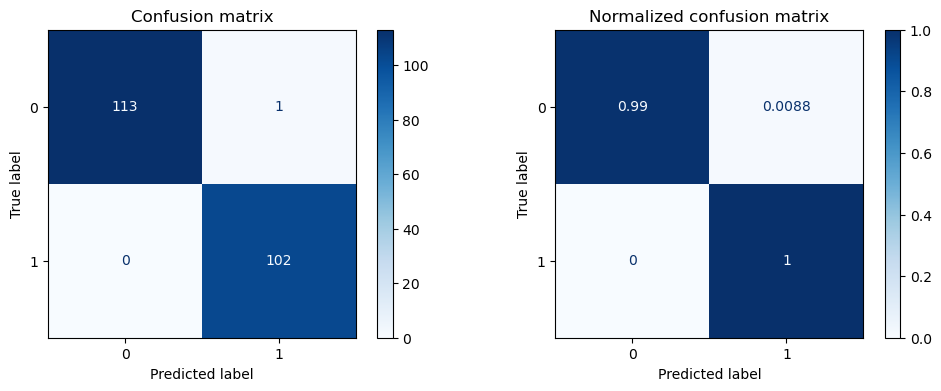

In [137]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

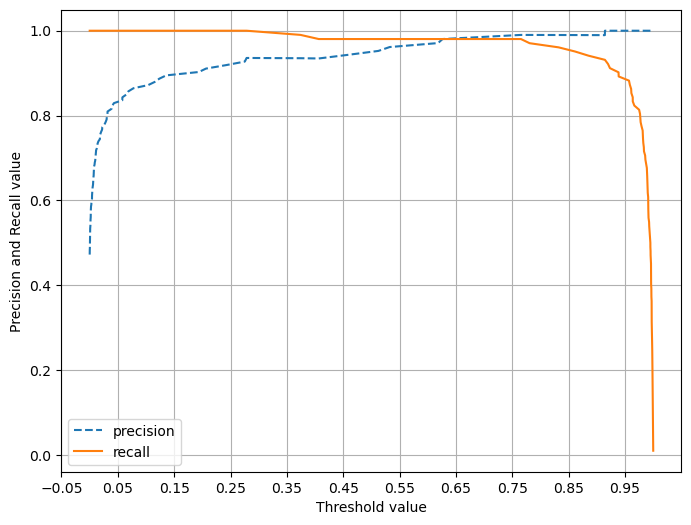

In [138]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

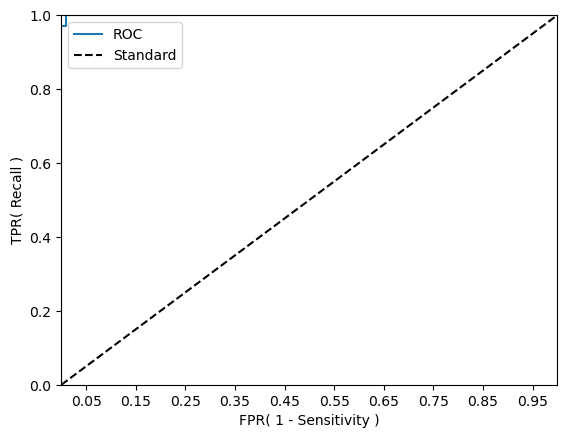

In [139]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### LightGBM 학습 결과
- 거의 모든 예측을 성공한 모델이 도출됨
- XGB와 비교했을 때, 평가 점수가 상승한 것을 확인

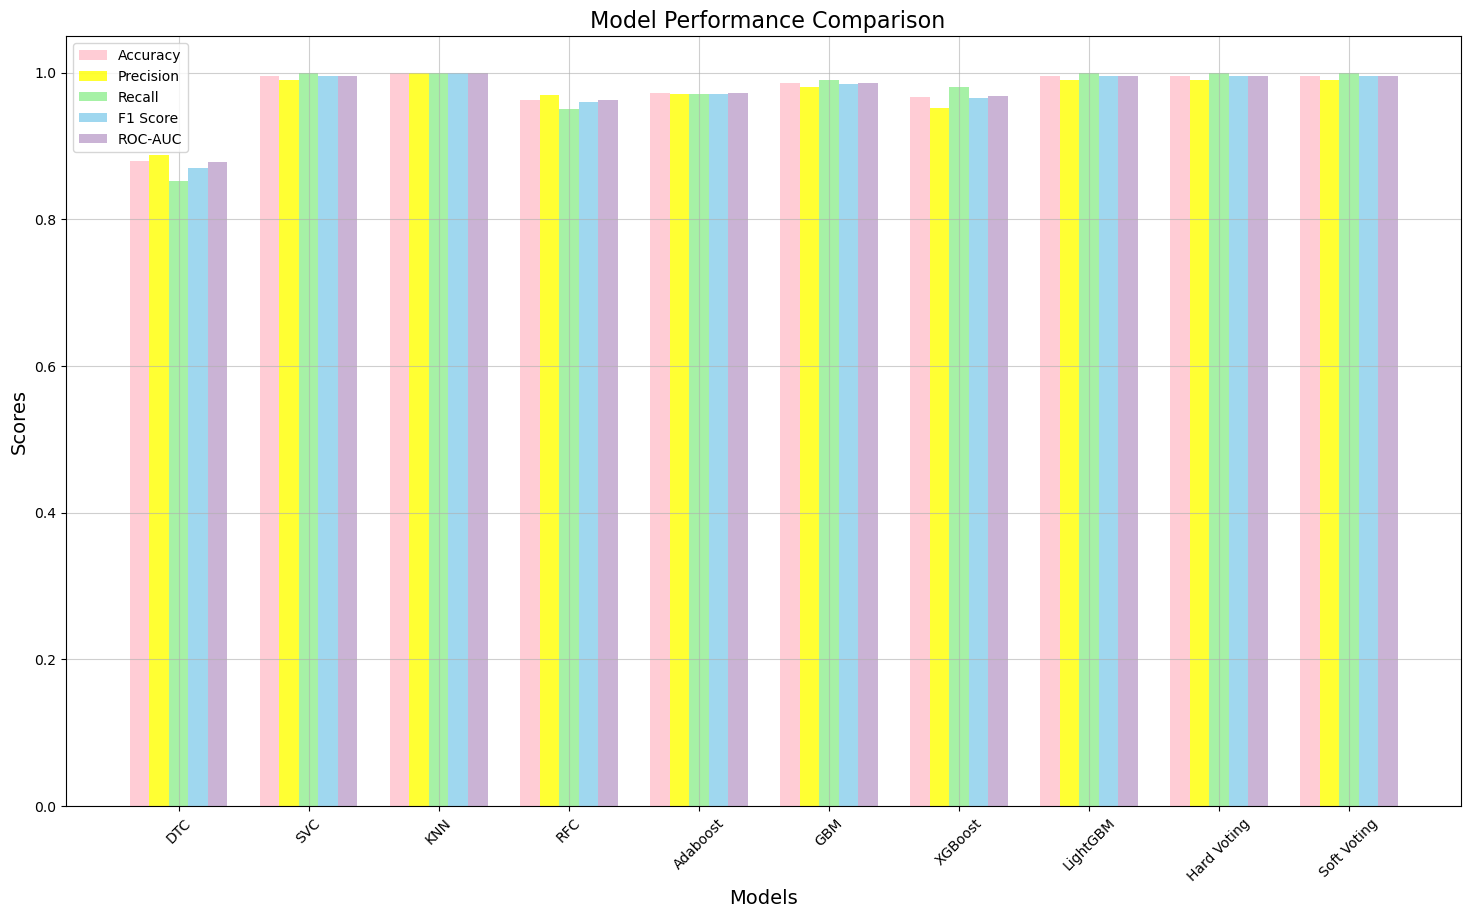

In [140]:
 import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
models = [
    "DTC", "SVC", "KNN", "RFC", "Adaboost", "GBM",
    "XGBoost", "LightGBM", "Hard Voting", "Soft Voting"
]

# 모델 별 정확도
accuracies = [accuracy_score(y_test, dtc_prediction), accuracy_score(y_test, svc_prediction),
              accuracy_score(y_test, knn_prediction), accuracy_score(y_test, rfc_prediction),
              accuracy_score(y_test, ada_prediction), accuracy_score(y_test, gbm_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction),
              accuracy_score(y_test, h_vc_prediction), accuracy_score(y_test, so_vc_prediction)]

# 모델 별 정밀도
precisions = [precision_score(y_test, dtc_prediction), precision_score(y_test, svc_prediction),
              precision_score(y_test, knn_prediction), precision_score(y_test, rfc_prediction),
              precision_score(y_test, ada_prediction), precision_score(y_test, gbm_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction),
              precision_score(y_test, h_vc_prediction), precision_score(y_test, so_vc_prediction)]

# 모델 별 재현율
recalls = [recall_score(y_test, dtc_prediction), recall_score(y_test, svc_prediction),
           recall_score(y_test, knn_prediction), recall_score(y_test, rfc_prediction),
           recall_score(y_test, ada_prediction), recall_score(y_test, gbm_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction),
           recall_score(y_test, h_vc_prediction), recall_score(y_test, so_vc_prediction)]

# 모델 별 F1 Score
f1_scores = [f1_score(y_test, dtc_prediction), f1_score(y_test, svc_prediction),
             f1_score(y_test, knn_prediction), f1_score(y_test, rfc_prediction),
             f1_score(y_test, ada_prediction), f1_score(y_test, gbm_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction),
             f1_score(y_test, h_vc_prediction), f1_score(y_test, so_vc_prediction)]

# 모델 별 ROC-AUC 점수
roc_aucs = [roc_auc_score(y_test, dtc_prediction), roc_auc_score(y_test, svc_prediction),
            roc_auc_score(y_test, knn_prediction), roc_auc_score(y_test, rfc_prediction),
            roc_auc_score(y_test, ada_prediction), roc_auc_score(y_test, gbm_prediction),
            roc_auc_score(y_test, xgb_prediction), roc_auc_score(y_test, lgbm_prediction),
            roc_auc_score(y_test, h_vc_prediction), roc_auc_score(y_test, so_vc_prediction)]

# 그래프 설정
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', alpha=0.8, color='pink')
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', alpha=0.8, color='yellow')
bar3 = ax.bar(index + 2*bar_width, recalls, bar_width, label='Recall', alpha=0.8, color='lightgreen')
bar4 = ax.bar(index + 3*bar_width, f1_scores, bar_width, label='F1 Score', alpha=0.8, color='skyblue')
bar5 = ax.bar(index + 4*bar_width, roc_aucs, bar_width, label='ROC-AUC', alpha=0.8, color='#bda0cb')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title(' Model Performance Comparison', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

### 📑 최종 정리
- 이번 데이터 세트에 대해 개별 모델 학습에서는 KNN이,  
  앙상블 학습에서는 LightGBM이 가장 우수한 평가를 기록했습니다.
- 다만 데이터의 과적합 여부도 고려해봤을 때, DTC와 Random Forest 역시  
  이번 데이터에 사용하기 적합한 모델이라고 할 수 있습니다.

### ☕ 회고
- feature의 개수가 많은 것에 비해 전처리 과정이 미숙했습니다.
- 또한 모델의 부적절성에 대해 사이클을 돌려 결점을 채우지 못한 점도 반성할 사항입니다.

#### 전체 2nd Cycle
- 현재 DTC를 제외한 모든 모델에서 과적합 발생
- 기존에는 산점도와 분류 영역 시각화 그래프만 보고 과적합 여부를 판단했지만,  
  첫 사이클 이후 평가 지표가 0.9 이상이면 과적합 위험이 높다는 사실을 새롭게 인지

- 따라서 첫 사이클에서 평가 지표 0.9 미만을 기록한 DTC를 제외한 나머지 모델들의  
  하이퍼 파라미터를 조정하여 평가 지표를 0.9 미만으로 감소시키는 방향으로 학습 진행

### 🤖 프로젝트의 방향성
- 본 데이터 세트를 통한 예측은 아래에 특히 민감할 필요가 있다고 판단
> - FN: 다운 증후군이 있는 쥐를 정상이라 예측하는 경우

- FP(정상인 쥐를 다운 증후군이라 예측하는 경우)를 감지하고 정밀도를 향상시키는 것 역시 중요하지만,  
  본 프로젝트에서는 FN의 비율을 낮춤으로서 높은 재현율을 보이는 모델을 찾는 것이 중요하다고 판단

- 또한 과적합 발생 시, 새롭게 들어오는 데이터에 대한 예측 성능이 저하될 수 있기 때문에  
  과적합 여부도 관찰하면서 진행

### SVM (서포트 벡터 머신) 모델 학습
- 하이퍼 파라미터 중 C(Cost)의 값을 낮춤으로서 과적합 해소

In [141]:
from sklearn.svm import SVC

# SVC에서 사용하는 하이퍼 파라미터 설정
svc_parameters = {'svc__C': [0.001, 0.01, 0.1],
                 'svc__gamma': [0.001, 0.01, 0.1, 1],
                 'svc__kernel': ['linear', 'rbf']}

# SVC 모델 생성
svc = SVC(probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

In [142]:
# SVC 모델로 학습 진행
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=124))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [143]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.839560   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.736264   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.839560   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.795604   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.839560   
5   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.947253   
6   {'svc__C': 0.001, 'svc__gamma': 1, 'svc__kerne...         0.839560   
7   {'svc__C': 0.001, 'svc__gamma': 1, 'svc__kerne...         0.560440   
8   {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...         0.951648   
9   {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...         0.736264   
10  {'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...         0.951648   
11  {'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...         0.795604   
12  {'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...         0.951648   
13  {'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...         0.947253   
14  {'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...         0.951648   
15  {'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...         0.560440   
16  {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.969231   
17  {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.736264   
18  {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.969231   
19  {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.874725   
20  {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.969231   
21  {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.947253   
22  {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.969231   
23  {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.560440   

    rank_test_score  
0                13  
1                19  
2                13  
3                17  
4                13  
5                 9  
6                13  
7                22  
8                 5  
9                19  
10                5  
11               17  
12                5  
13                9  
14                5  
15               22  
16                1  
17               19  
18                1  
19               12  
20                1  
21                9  
22                1  
23               22

In [144]:
# 평가 점수 순으로 데이터프레임 정렬
svc_result_df.sort_values(by='mean_test_score', ascending=False)

params  mean_test_score  \
22  {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.969231   
20  {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.969231   
18  {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.969231   
16  {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.969231   
12  {'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...         0.951648   
8   {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...         0.951648   
10  {'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...         0.951648   
14  {'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...         0.951648   
13  {'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...         0.947253   
21  {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.947253   
5   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.947253   
19  {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.874725   
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.839560   
6   {'svc__C': 0.001, 'svc__gamma': 1, 'svc__kerne...         0.839560   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.839560   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.839560   
11  {'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...         0.795604   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.795604   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.736264   
9   {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...         0.736264   
17  {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.736264   
15  {'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...         0.560440   
7   {'svc__C': 0.001, 'svc__gamma': 1, 'svc__kerne...         0.560440   
23  {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.560440   

    rank_test_score  
22                1  
20                1  
18                1  
16                1  
12                5  
8                 5  
10                5  
14                5  
13                9  
21                9  
5                 9  
19               12  
0                13  
6                13  
4                13  
2                13  
11               17  
3                17  
1                19  
9                19  
17               19  
15               22  
7                22  
23               22

#### DTC 모델의 평가 점수(0.88)과 가장 유사한 모델 선정 후 학습

In [145]:
# DTC 모델의 평가 점수와 가장 유사한 점수를 기록했을 떄의 하이퍼 파라미터 출력
print(svc_result_df['params'][19])

{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [146]:
# 위의 하이퍼 파라미터로 튜닝 후 학습
svc = SVC(C=0.1, gamma=0.01, kernel='rbf', probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, gamma=0.01, probability=True, random_state=124))])

In [147]:
# 튜닝 완료된 모델로 테스트 데이터 예측
svc_prediction = svc_pipe.predict(X_test)

오차 행렬
[[111   3]
 [  9  93]]
정확도: 0.9444, 정밀도: 0.9469, 재현율: 0.9427, F1: 0.9441, ROC-AUC: 0.9427
################################################################################


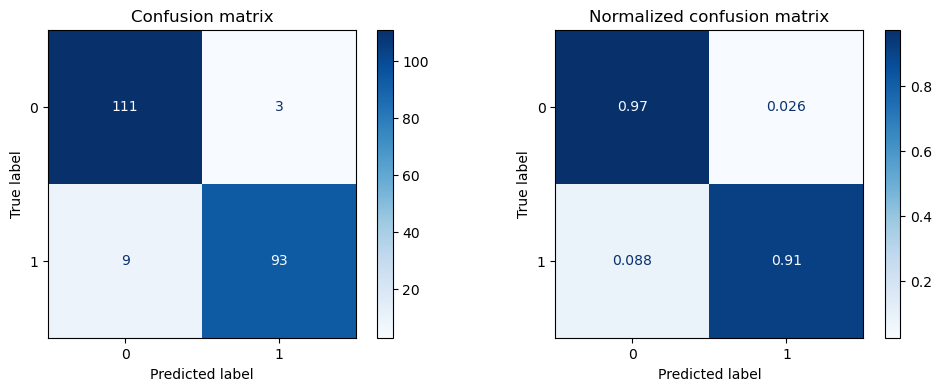

In [148]:
# 현재 모델의 오차 행렬 시각화
get_evaluation(y_test, svc_prediction, svc_pipe, X_test)

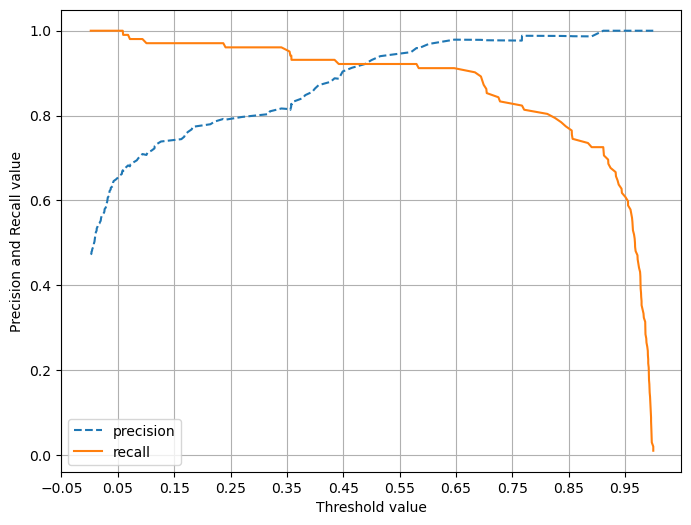

In [149]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

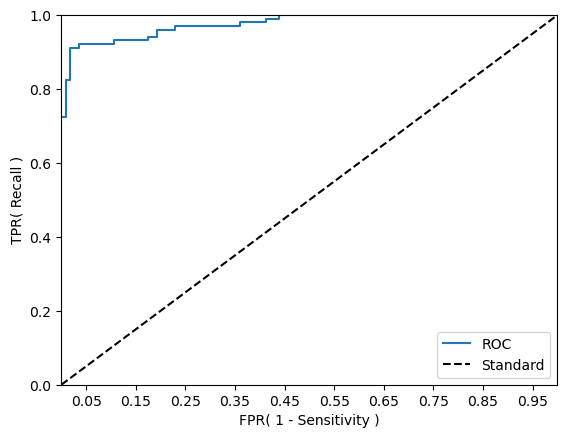

In [150]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [151]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(svc_pipe, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0583
TIAM1_N: 0.0128
GluR3_N: 0.0113
Stimulated: 0.0108
BDNF_N: 0.0108
ADARB1_N: 0.0108
pCREB_N: 0.0106
ERK_N: 0.0097
SYP_N: 0.0096
NR2A_N: 0.0091
pPKCAB_N: 0.0091
AMPKA_N: 0.009
ARC_N: 0.0085
pS6_N: 0.0085
pNR1_N: 0.008
CAMKII_N: 0.0073
SHH_N: 0.0071
H3MeK4_N: 0.0068
NR1_N: 0.0068
pNUMB_N: 0.0059
P3525_N: 0.0056
PKCA_N: 0.0054
PSD95_N: 0.0054
Tau_N: 0.0051
pERK_N: 0.0048
pPKCG_N: 0.0048
pP70S6_N: 0.0045
RSK_N: 0.0043
BRAF_N: 0.0043
MTOR_N: 0.0043
BAD_N: 0.0042
nNOS_N: 0.0042
AcetylH3K9_N: 0.004
pELK_N: 0.0039
CREB_N: 0.0039
SOD1_N: 0.0039
ELK_N: 0.0037
DSCR1_N: 0.0035
H3AcK18_N: 0.0032
BCL2_N: 0.0031
pNR2A_N: 0.0031
NR2B_N: 0.0031
GSK3B_N: 0.0028
BAX_N: 0.0026
IL1B_N: 0.0023
RRP1_N: 0.0022
RAPTOR_N: 0.002
CaNA_N: 0.0017
pBRAF_N: 0.0017
pMTOR_N: 0.0017
Ubiquitin_N: 0.0014
P38_N: 0.0014
pJNK_N: 0.0012
ITSN1_N: 0.0012
TRKA_N: 0.0009
JNK_N: 0.0008
AKT_N: 0.0008
pGSK3B_Tyr216_N: 0.0008
ERBB4_N: 0.0006
S6_N: 0.0006
pNR2B_N: 0.0002
Treatment: 0.0
GFAP_N: -0.0
P70S6_N: -0.0006
EGR1_N

In [152]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'TIAM1_N']]

important_features

APP_N   TIAM1_N
0     0.453910  0.482864
1     0.430940  0.454519
2     0.423187  0.447197
3     0.410615  0.442650
4     0.398550  0.419095
...        ...       ...
1074  0.372216  0.340756
1075  0.360990  0.346252
1076  0.309978  0.292788
1077  0.341172  0.301587
1078  0.402982  0.368269

[1079 rows x 2 columns]

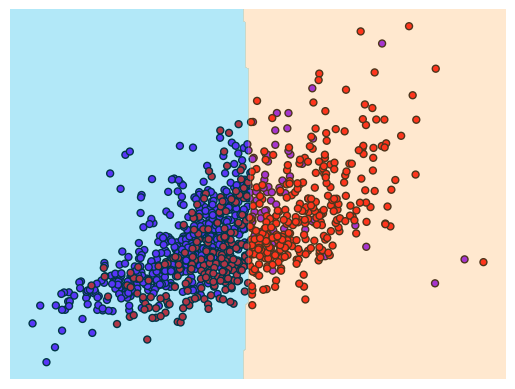

In [153]:
visualize_boundary(svc_pipe, important_features, targets)

#### SVM - 1st Cycle
- RBF 커널을 사용하였고, gamma 값을 설정함에 따라 산점도 분류 영역이 약간 곡선의 형태를 띄는 것을 확인
- 다만, 평가 지표가 아직 0.9 이상으로 과적합이 우려되기 때문에  
  이번 모델 다음으로 높은 평가 점수를 받은 하이퍼 파라미터 조합으로 다시 튜닝 후 학습

In [154]:
# 위 모델 다음으로 높은 평가 점수를 기록했을 떄의 하이퍼 파라미터 출력
for params in svc_result_df[svc_result_df['rank_test_score'] == 13]['params']:
    print(params)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
{'svc__C': 0.001, 'svc__gamma': 1, 'svc__kernel': 'linear'}


#### 중간 분석
- gamma 값만 다른 파라미터 조합이 여러 가지 존재
- 단, 모든 하이퍼 파라미터 조합에서 kernel 값이 linear(선형)인 만큼,  
  gamma 값을 바꿔가면서 테스트 하는 것은 의미가 없을 것으로 추정

In [155]:
# 위의 하이퍼 파라미터로 튜닝 후 학습
svc = SVC(C=0.001, gamma=0.001, kernel='linear', probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.001, gamma=0.001, kernel='linear', probability=True,
                     random_state=124))])

In [156]:
# 튜닝 완료된 모델로 테스트 데이터 예측
svc_prediction = svc_pipe.predict(X_test)

오차 행렬
[[98 16]
 [11 91]]
정확도: 0.8750, 정밀도: 0.8748, 재현율: 0.8759, F1: 0.8749, ROC-AUC: 0.8759
################################################################################


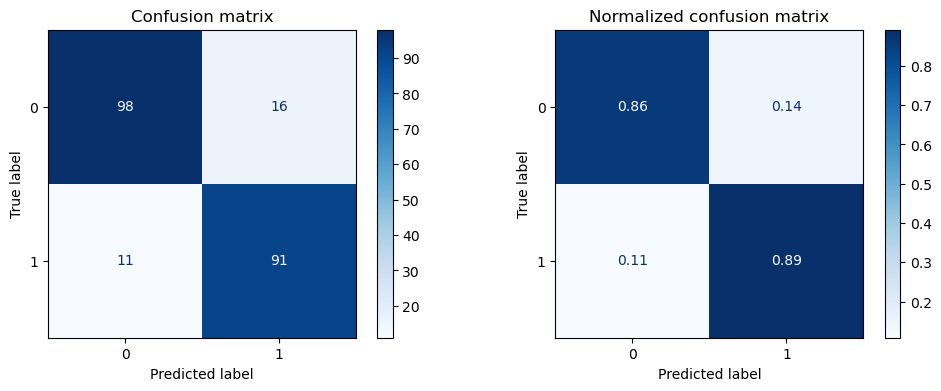

In [157]:
# 현재 모델의 오차 행렬 시각화
get_evaluation(y_test, svc_prediction, svc_pipe, X_test)

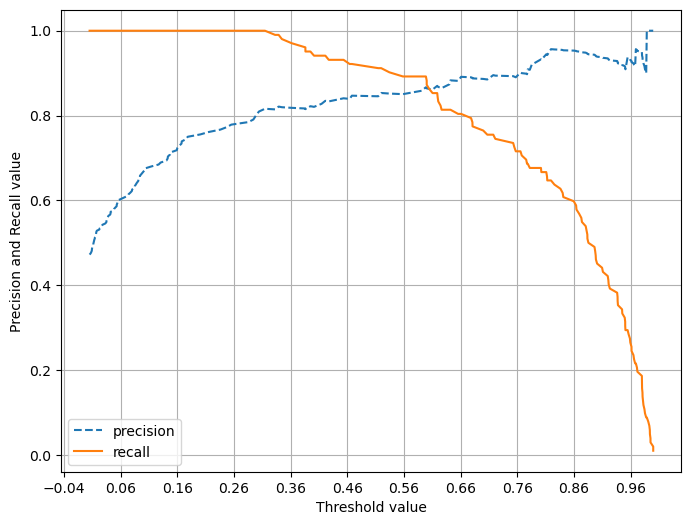

In [158]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

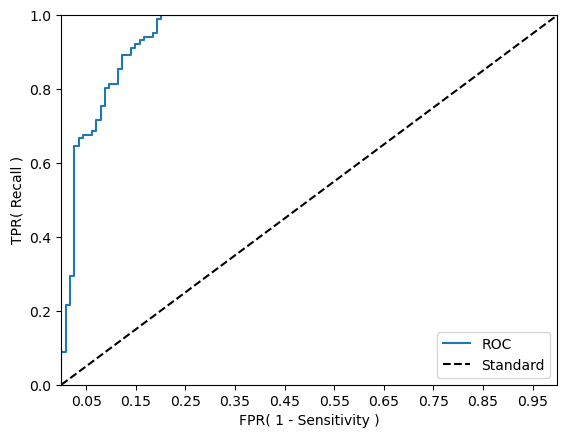

In [159]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [160]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(svc_pipe, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.1102
SYP_N: 0.0289
pNR1_N: 0.0227
AMPKA_N: 0.0159
NR2A_N: 0.0144
pPKCAB_N: 0.0136
pNR2A_N: 0.0136
DSCR1_N: 0.0134
Stimulated: 0.013
ELK_N: 0.0114
TIAM1_N: 0.011
NR1_N: 0.0108
ERK_N: 0.0079
GluR3_N: 0.0052
PKCA_N: 0.0043
MTOR_N: 0.0034
H3MeK4_N: 0.0031
BDNF_N: 0.0028
Ubiquitin_N: 0.0023
SOD1_N: 0.0022
CaNA_N: 0.002
pP70S6_N: 0.0019
IL1B_N: 0.0014
NR2B_N: 0.0005
Tau_N: 0.0003
pAKT_N: 0.0003
BRAF_N: 0.0002
BCL2_N: 0.0
JNK_N: 0.0
GluR4_N: 0.0
nNOS_N: 0.0
pNR2B_N: -0.0002
SHH_N: -0.0003
RRP1_N: -0.0003
GSK3B_N: -0.0012
AcetylH3K9_N: -0.0015
ARC_N: -0.0015
Treatment: -0.0015
pS6_N: -0.0015
pERK_N: -0.0015
pBRAF_N: -0.0015
pELK_N: -0.0017
pRSK_N: -0.0019
SNCA_N: -0.0019
pNUMB_N: -0.0023
CREB_N: -0.0025
pCFOS_N: -0.0026
pMEK_N: -0.0028
PSD95_N: -0.0029
pGSK3B_Tyr216_N: -0.0032
pJNK_N: -0.0034
AKT_N: -0.0035
P70S6_N: -0.0037
BAX_N: -0.0037
P3525_N: -0.0037
ADARB1_N: -0.0037
BAD_N: -0.0039
pMTOR_N: -0.0046
CDK5_N: -0.0046
ERBB4_N: -0.0049
CAMKII_N: -0.0052
H3AcK18_N: -0.0052
RSK_N: -0.0

In [161]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'SYP_N']]

important_features

APP_N     SYP_N
0     0.453910  0.427099
1     0.430940  0.441581
2     0.423187  0.435777
3     0.410615  0.391691
4     0.398550  0.434154
...        ...       ...
1074  0.372216  0.374088
1075  0.360990  0.375259
1076  0.309978  0.422121
1077  0.341172  0.397676
1078  0.402982  0.420347

[1079 rows x 2 columns]

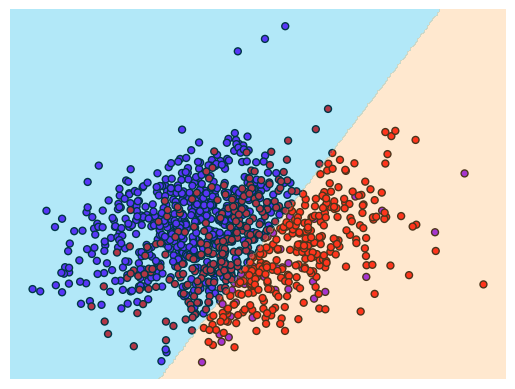

In [162]:
visualize_boundary(svc_pipe, important_features, targets)

#### gamma = 1

In [163]:
# 위의 하이퍼 파라미터로 튜닝 후 학습
svc = SVC(C=0.001, gamma=1, kernel='linear', probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.001, gamma=1, kernel='linear', probability=True,
                     random_state=124))])

In [164]:
# 튜닝 완료된 모델로 테스트 데이터 예측
svc_prediction = svc_pipe.predict(X_test)

오차 행렬
[[98 16]
 [11 91]]
정확도: 0.8750, 정밀도: 0.8748, 재현율: 0.8759, F1: 0.8749, ROC-AUC: 0.8759
################################################################################


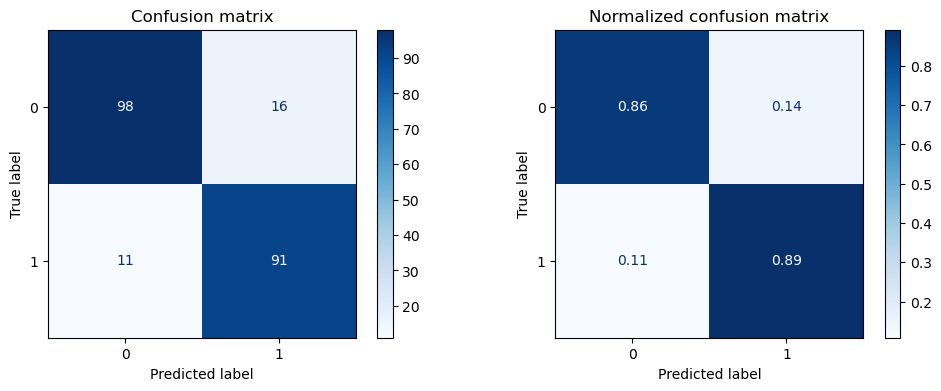

In [165]:
# 현재 모델의 오차 행렬 시각화
get_evaluation(y_test, svc_prediction, svc_pipe, X_test)

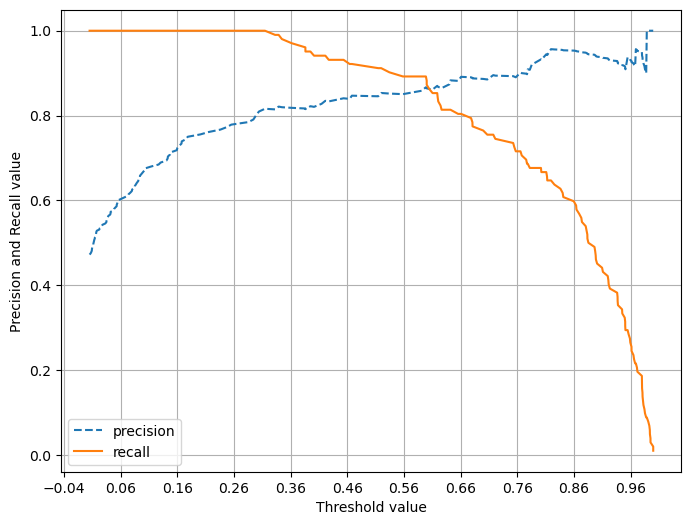

In [166]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

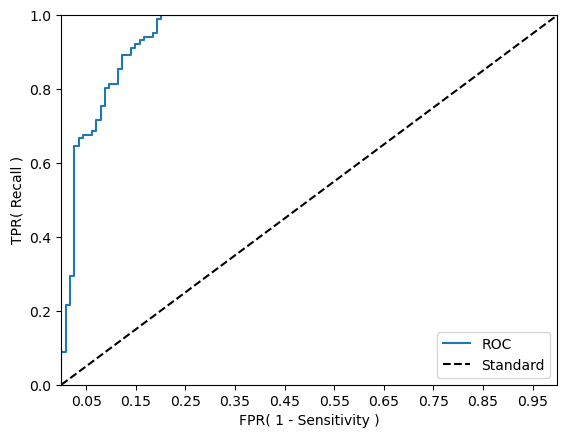

In [167]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, svc_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [168]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(svc_pipe, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.1102
SYP_N: 0.0289
pNR1_N: 0.0227
AMPKA_N: 0.0159
NR2A_N: 0.0144
pPKCAB_N: 0.0136
pNR2A_N: 0.0136
DSCR1_N: 0.0134
Stimulated: 0.013
ELK_N: 0.0114
TIAM1_N: 0.011
NR1_N: 0.0108
ERK_N: 0.0079
GluR3_N: 0.0052
PKCA_N: 0.0043
MTOR_N: 0.0034
H3MeK4_N: 0.0031
BDNF_N: 0.0028
Ubiquitin_N: 0.0023
SOD1_N: 0.0022
CaNA_N: 0.002
pP70S6_N: 0.0019
IL1B_N: 0.0014
NR2B_N: 0.0005
Tau_N: 0.0003
pAKT_N: 0.0003
BRAF_N: 0.0002
BCL2_N: 0.0
JNK_N: 0.0
GluR4_N: 0.0
nNOS_N: 0.0
pNR2B_N: -0.0002
SHH_N: -0.0003
RRP1_N: -0.0003
GSK3B_N: -0.0012
AcetylH3K9_N: -0.0015
ARC_N: -0.0015
Treatment: -0.0015
pS6_N: -0.0015
pERK_N: -0.0015
pBRAF_N: -0.0015
pELK_N: -0.0017
pRSK_N: -0.0019
SNCA_N: -0.0019
pNUMB_N: -0.0023
CREB_N: -0.0025
pCFOS_N: -0.0026
pMEK_N: -0.0028
PSD95_N: -0.0029
pGSK3B_Tyr216_N: -0.0032
pJNK_N: -0.0034
AKT_N: -0.0035
P70S6_N: -0.0037
BAX_N: -0.0037
P3525_N: -0.0037
ADARB1_N: -0.0037
BAD_N: -0.0039
pMTOR_N: -0.0046
CDK5_N: -0.0046
ERBB4_N: -0.0049
CAMKII_N: -0.0052
H3AcK18_N: -0.0052
RSK_N: -0.0

In [169]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'SYP_N']]

important_features

APP_N     SYP_N
0     0.453910  0.427099
1     0.430940  0.441581
2     0.423187  0.435777
3     0.410615  0.391691
4     0.398550  0.434154
...        ...       ...
1074  0.372216  0.374088
1075  0.360990  0.375259
1076  0.309978  0.422121
1077  0.341172  0.397676
1078  0.402982  0.420347

[1079 rows x 2 columns]

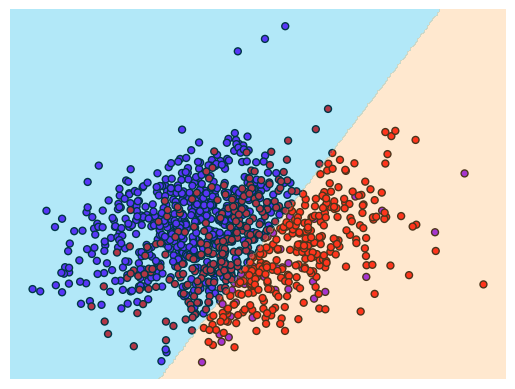

In [170]:
visualize_boundary(svc_pipe, important_features, targets)

#### SVM 모델 학습 결과
- C(Cost) 파라미터의 값을 낮춤으로서 어느 정도의 오류를 허용했으며(소프트 마진),  
  의도적으로 best_estimator_가 아닌 그보다 더 낮은 평가 점수를 기록한 하이퍼 파라미터로 튜닝함에 따라  
  전체 - 1st Cycle 때의 SVM 모델에서 발생한 과적합 현상이 해소되었을 것으로 추정
- linear kernel에서는 gamma 값에 영향이 없기에, 그에 따른 모델의 성능 변화가 발견되지 않음
- 또한, 이번 프로젝트에서 주의깊게 봐야될 재현율도 약 0.876으로 이상적인 수치를 보였으며,  
  이는 정밀도(0.874)보다 근소하게 높기 때문에 SVM 모델의 학습을 종료함

### KNN(K-최근접 이웃 알고리즘) 모델 학습
- n_neighbors 수치를 크게 증가시켜 과적합 해소

In [171]:
from sklearn.neighbors import KNeighborsClassifier

# KNN에 사용할 하이퍼 파라미터 설정
knn_c_parameters = {'knn__n_neighbors': [101, 103, 105, 107, 109]}

knn = KNeighborsClassifier()

# 데이터 표준화 후 KNN을 거치는 파이프라인을 생성하고
# 이와 하이퍼 파라미터로 교차 검증을 진행하는 모델 생성
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [172]:
# KNN에 학습 방법만 저장
# Lazy Learning 모델이기 때문에 새로운 데이터가 들어와야 학습을 함
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [101, 103, 105, 107, 109]},
             return_train_score=True)

In [173]:
# KNN으로 학습한 결과의 교차 검증결과를 데이터프레임으로 만듬 
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'][0])
display(knn_result_df)

{'knn__n_neighbors': 101}


params  mean_test_score  rank_test_score
0  {'knn__n_neighbors': 101}         0.774725                2
1  {'knn__n_neighbors': 103}         0.775824                1
2  {'knn__n_neighbors': 105}         0.772527                3
3  {'knn__n_neighbors': 107}         0.771429                5
4  {'knn__n_neighbors': 109}         0.772527                3

#### 중간 분석
- n_neighbor가 103일 때 성능 평가 점수가 가장 높은 것을 확인

In [174]:
# 위에서 얻은 최적의 하이퍼 파라미터 값을 가진 새로운 KNN 모델 및 파이프라인 생성
# KNN에는 best_estimator가 없기 때문에 재선언해야 됨
knn = KNeighborsClassifier(n_neighbors=103)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

# 재선언된 파이프라인을 통해 학습 진행
knn_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=103))])

In [175]:
# KNN 모델로 예측
knn_prediction = knn_pipe.predict(X_test)

In [176]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(knn_pipe, X_test, y_test, n_repeats=10, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

ADARB1_N: 0.0134
NR2A_N: 0.012
AMPKA_N: 0.0111
RAPTOR_N: 0.0111
pNR2A_N: 0.0111
pPKCAB_N: 0.0088
NR1_N: 0.0083
pNR1_N: 0.0083
MTOR_N: 0.0083
NR2B_N: 0.0074
RSK_N: 0.0074
pELK_N: 0.0069
P3525_N: 0.006
pNUMB_N: 0.006
P70S6_N: 0.0046
Ubiquitin_N: 0.0046
pPKCG_N: 0.0042
TIAM1_N: 0.0042
AKT_N: 0.0042
BDNF_N: 0.0042
CAMKII_N: 0.0042
pNR2B_N: 0.0042
Tau_N: 0.0037
pP70S6_N: 0.0028
ELK_N: 0.0028
H3MeK4_N: 0.0028
GSK3B_N: 0.0023
H3AcK18_N: 0.0023
BAX_N: 0.0019
BCL2_N: 0.0019
pCAMKII_N: 0.0019
pCFOS_N: 0.0019
pBRAF_N: 0.0014
ERK_N: 0.0005
JNK_N: 0.0005
pERK_N: 0.0005
SHH_N: 0.0005
pMTOR_N: 0.0
BRAF_N: -0.0005
APP_N: -0.0005
GluR4_N: -0.0005
NUMB_N: -0.0009
GFAP_N: -0.0009
pJNK_N: -0.0014
CREB_N: -0.0019
DSCR1_N: -0.0019
RRP1_N: -0.0023
Stimulated: -0.0023
PSD95_N: -0.0028
PKCA_N: -0.0032
AcetylH3K9_N: -0.0037
SNCA_N: -0.0037
CaNA_N: -0.0037
P38_N: -0.0037
ERBB4_N: -0.0042
DYRK1A_N: -0.0046
pMEK_N: -0.0046
EGR1_N: -0.0046
S6_N: -0.0046
ITSN1_N: -0.0051
nNOS_N: -0.0056
pAKT_N: -0.0056
pGSK3B_Tyr216

오차 행렬
[[90 24]
 [22 80]]
정확도: 0.7870, 정밀도: 0.7864, 재현율: 0.7869, F1: 0.7866, ROC-AUC: 0.7869
################################################################################


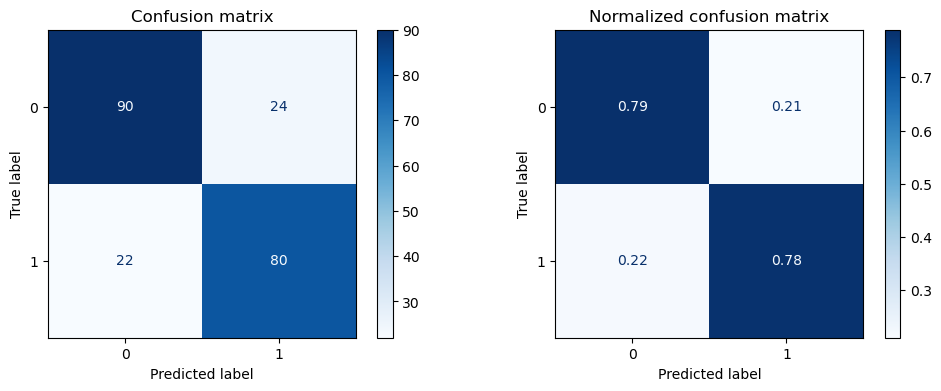

In [177]:
get_evaluation(y_test, knn_prediction, knn_pipe, X_test)

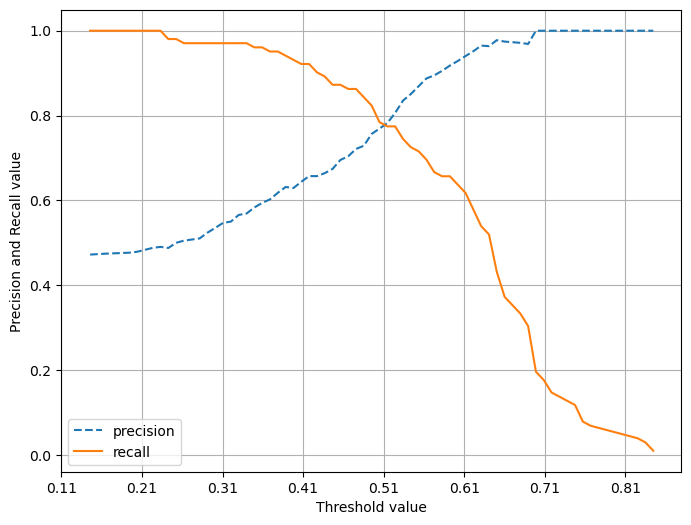

In [178]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

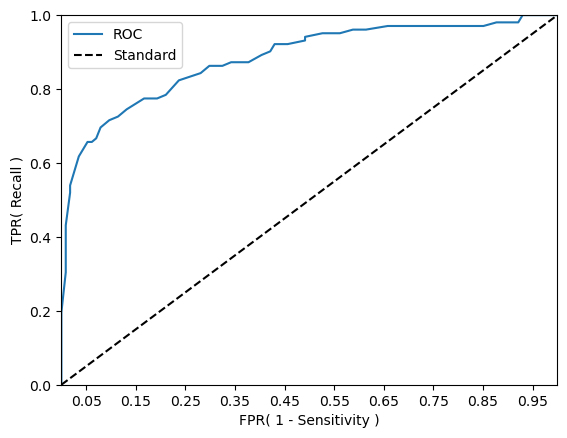

In [179]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [180]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['ADARB1_N', 'NR2A_N']]

important_features

ADARB1_N    NR2A_N
0     1.339070  5.990152
1     1.306323  5.685038
2     1.279600  5.622059
3     1.198765  4.979503
4     1.206995  4.718679
...        ...       ...
1074  0.737226  2.600035
1075  0.756047  2.801492
1076  0.764098  2.220852
1077  0.783185  2.384088
1078  0.736635  2.594348

[1079 rows x 2 columns]

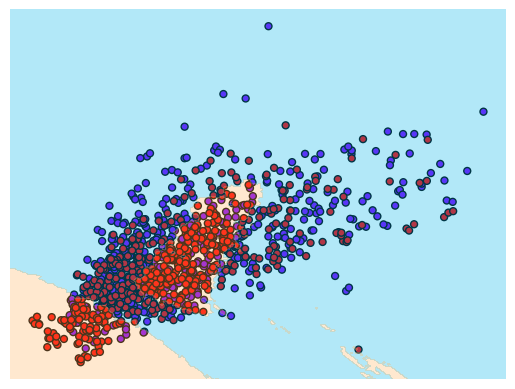

In [181]:
visualize_boundary(knn_pipe, important_features, targets)

#### KNN 모델 학습 결과
- n_neighbors 값을 크게 증가시킴으로서 기존 모델의 과적합 현상을 해소했을 것이라 추정
- 또한 재현율이 0.787이라는, 0.8에 근접한 이상적인 수치를 보였고  
  시각화한 그래프 역시 모델이 적절하게 훈련되었다는 것을 시사함에 따라 KNN 모델의 학습을 종료함

#### 이후 순서
- Voting
- RFC
- Boosting
- 총평

### Voting 모델 학습
- DTC, SVM, KNN의 3가지 모델로 Voting
- 산점도 시각화 과정(함수)에서 중요도가 높은 feature 2가지만으로 학습을 진행했기 때문에,  
  Voting 진행 전 모든 feature가 포함된 best_estimator_ 로 다시 학습

#### Hard Voting

In [188]:
# 각 모델 별로 최적화된 하이퍼 파라미터로 다시 튜닝
dtc = g_dtc.best_estimator_
svc = g_svc.best_estimator_
knn = KNeighborsClassifier(n_neighbors=103)

# DTC와 SVM은 이미 파이프라인이 포함되어 있기 때문에 KNN만 따로 파이프라인 선언
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

In [189]:
from sklearn.ensemble import VotingClassifier

# 위의 모델 별 파이프라인을 통해 Hard Voting을 실행하는 분류 모델 객체 생성
h_vc = VotingClassifier(estimators=[('dtc', dtc),
                                    ('svc', svc),
                                    ('knn', knn_pipe)
                                   ],
                        voting='hard',
                        n_jobs=-1)

In [190]:
# Hard Voting 모델로 학습 진행
h_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      min_samples_split=40))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.1, gamma=0.001,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=124))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=103))]))],
                 n_jobs=-1)

In [191]:
# Hard Voting 모델로 테스트 데이터 예측
h_vc_prediction = h_vc.predict(X_test)

In [192]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(h_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2269
AMPKA_N: 0.0843
ERK_N: 0.0282
Stimulated: 0.0245
TIAM1_N: 0.0236
GluR3_N: 0.0222
pAKT_N: 0.019
ITSN1_N: 0.0185
pNR2B_N: 0.0167
ELK_N: 0.0162
NUMB_N: 0.0162
P3525_N: 0.0148
IL1B_N: 0.0134
TRKA_N: 0.0134
AKT_N: 0.012
pP70S6_N: 0.0111
ERBB4_N: 0.0102
pNR2A_N: 0.0102
DYRK1A_N: 0.0097
Treatment: 0.0088
Bcatenin_N: 0.0083
pNUMB_N: 0.0083
GSK3B_N: 0.0069
BCL2_N: 0.0065
NR2B_N: 0.006
NR2A_N: 0.006
SHH_N: 0.0051
NR1_N: 0.0051
pPKCG_N: 0.0046
SYP_N: 0.0046
BRAF_N: 0.0046
MEK_N: 0.0046
Tau_N: 0.0042
ADARB1_N: 0.0042
pNR1_N: 0.0042
pELK_N: 0.0037
pCASP9_N: 0.0032
nNOS_N: 0.0032
pPKCAB_N: 0.0032
pCREB_N: 0.0028
pGSK3B_N: 0.0028
BDNF_N: 0.0028
MTOR_N: 0.0023
SOD1_N: 0.0023
CREB_N: 0.0023
DSCR1_N: 0.0019
Ubiquitin_N: 0.0014
RAPTOR_N: 0.0014
RSK_N: 0.0014
RRP1_N: 0.0014
pCAMKII_N: 0.0009
pERK_N: 0.0005
CaNA_N: 0.0005
pBRAF_N: 0.0005
pMTOR_N: 0.0005
JNK_N: 0.0005
P70S6_N: 0.0
pRSK_N: -0.0005
S6_N: -0.0005
BAX_N: -0.0005
BAD_N: -0.0009
H3MeK4_N: -0.0009
AcetylH3K9_N: -0.0009
PKCA_N: -0.001

오차 행렬
[[109   5]
 [  4  98]]
정확도: 0.9583, 정밀도: 0.9580, 재현율: 0.9585, F1: 0.9582, ROC-AUC: 0.9585
################################################################################


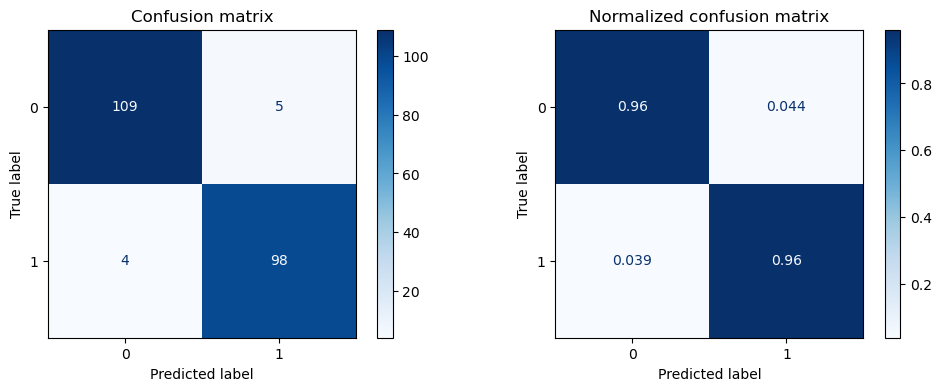

In [193]:
# Hard Voting 모델의 에측 결과 시각화
get_evaluation(y_test, h_vc_prediction, h_vc, X_test)

#### 중간 분석
- Hard Voting 모델의 경우, predict_proba를 지원하지 않음
- 따라서 해당 메소드를 사용하여 시각화할 수 있는 Trade-off와 ROC Curve는 이번 모델에서 시각화하지 않음

In [194]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

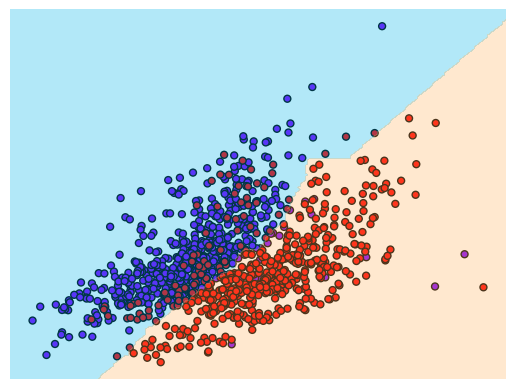

In [195]:
visualize_boundary(h_vc, important_features, targets)

#### Hard Voting 모델 학습 결과
- 재현율을 포함한 평가 지표가 모두 0.95 이상으로 매우 높은 수치를 보임
- 그에 따라 과적합이 발생했을 가능성도 존재

#### Soft Voting

In [196]:
# 각 모델 별로 최적화된 하이퍼 파라미터로 다시 튜닝
dtc = g_dtc.best_estimator_
svc = g_svc.best_estimator_
knn = KNeighborsClassifier(n_neighbors=103)

# DTC와 SVM은 이미 파이프라인이 포함되어 있기 때문에 KNN만 따로 파이프라인 선언
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

In [197]:
# Soft Voting을 실행하는 분류 모델 객체 생성
so_vc = VotingClassifier(estimators=[('dtc', dtc),
                                    ('svc', svc),
                                    ('knn', knn_pipe)
                                   ],
                        voting='soft',
                        n_jobs=-1)

In [198]:
# Soft Voting 모델로 학습 진행
so_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      min_samples_split=40))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.1, gamma=0.001,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=124))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=103))]))],
                 n_jobs=-1, voting='soft')

In [199]:
# Soft Voting 모델로 테스트 데이터 예측
so_vc_prediction = so_vc.predict(X_test)

In [200]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(so_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2551
AMPKA_N: 0.1028
GluR3_N: 0.0194
ERK_N: 0.012
TIAM1_N: 0.0097
Tau_N: 0.0079
SOD1_N: 0.0079
pP70S6_N: 0.0065
NUMB_N: 0.006
ADARB1_N: 0.006
pAKT_N: 0.0056
pBRAF_N: 0.0051
P3525_N: 0.0051
Ubiquitin_N: 0.0046
AKT_N: 0.0042
pNR2A_N: 0.0037
IL1B_N: 0.0037
DSCR1_N: 0.0032
NR2A_N: 0.0032
BAD_N: 0.0032
pGSK3B_Tyr216_N: 0.0028
ITSN1_N: 0.0028
ERBB4_N: 0.0028
CDK5_N: 0.0028
MEK_N: 0.0028
SHH_N: 0.0023
pNR2B_N: 0.0023
SYP_N: 0.0023
pERK_N: 0.0019
Stimulated: 0.0019
pCASP9_N: 0.0009
AcetylH3K9_N: 0.0005
GFAP_N: 0.0005
S6_N: 0.0
GluR4_N: 0.0
BAX_N: 0.0
BDNF_N: 0.0
H3MeK4_N: 0.0
PKCA_N: 0.0
BRAF_N: -0.0
DYRK1A_N: -0.0
EGR1_N: -0.0005
pCFOS_N: -0.0005
pS6_N: -0.0005
ARC_N: -0.0005
Bcatenin_N: -0.0005
pGSK3B_N: -0.0005
TRKA_N: -0.0005
PSD95_N: -0.0009
P70S6_N: -0.0014
P38_N: -0.0014
BCL2_N: -0.0014
pPKCG_N: -0.0019
ELK_N: -0.0023
MTOR_N: -0.0042
pCREB_N: -0.0042
GSK3B_N: -0.0046
pCAMKII_N: -0.0046
SNCA_N: -0.0051
pPKCAB_N: -0.0056
RAPTOR_N: -0.006
nNOS_N: -0.006
pNUMB_N: -0.006
Treatment: 

오차 행렬
[[105   9]
 [  4  98]]
정확도: 0.9398, 정밀도: 0.9396, 재현율: 0.9409, F1: 0.9398, ROC-AUC: 0.9409
################################################################################


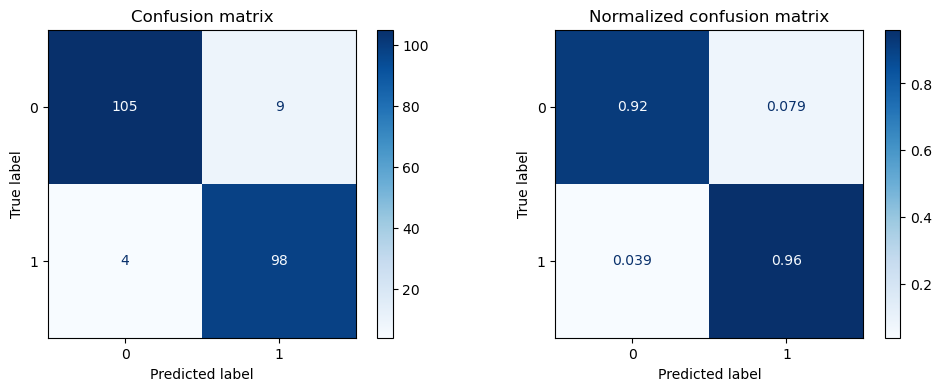

In [201]:
# Soft Voting 모델의 에측 결과 시각화
get_evaluation(y_test, so_vc_prediction, so_vc, X_test)

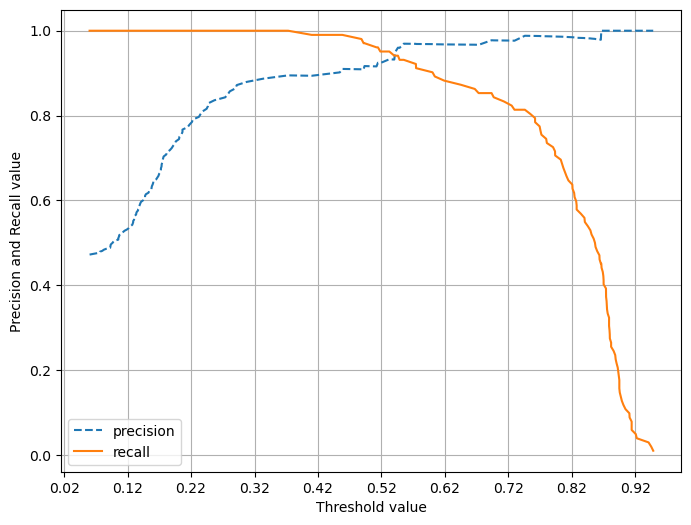

In [202]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

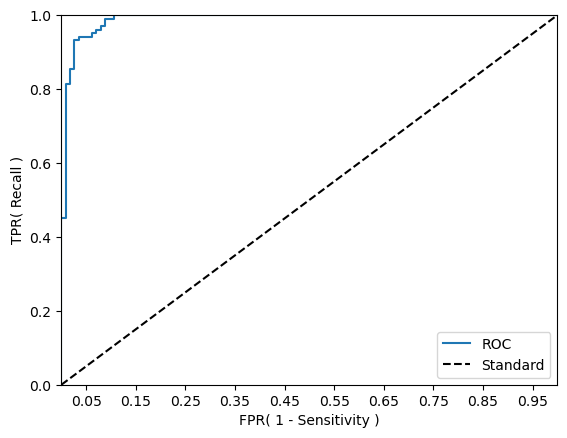

In [203]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [204]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

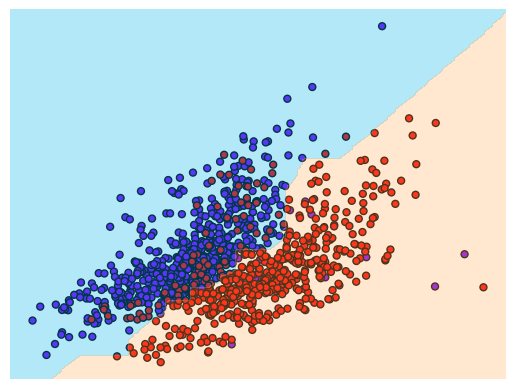

In [205]:
visualize_boundary(so_vc, important_features, targets)

#### Soft Voting 모델 학습 결과
- Hard Voting 모델에 비해 재현율을 포함한 평가 지표가 전반적으로 하락함
- 이에 따라 기존 Hard Voting 모델에서 발생한 과적합이 해소되었을 것으로 기대

### Random Forest 모델 학습 

In [209]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트에 사용할 하이퍼 파라미터 지정
rfc_parameters = {
    'rfc__max_depth': [3, 4, 5],
    'rfc__min_samples_split': [200, 400, 600, 800]
}

# 랜덤 포레스트 모델 객체 생성
rfc = RandomForestClassifier(n_estimators=50, random_state=124)

# 표준화와 위 모델을 순서대로 거치는 파이프라인 생성 후, 각 하이퍼 파라미터의 조합 별로 교차 검증하는 모델 생성
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True)

In [210]:
# 위 모델로 학습 진행
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=124))]),
             param_grid={'rfc__max_depth': [3, 4, 5],
                         'rfc__min_samples_split': [200, 400, 600, 800]},
             return_train_score=True)

In [211]:
# 랜덤 포레스트 모델의 파라미터 조합 별 평가 점수 및 순위를 데이터프레임 형식으로 제작 후 출력
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터 조합도 출력
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

params  mean_test_score  \
0   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.830769   
1   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.773626   
2   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.500000   
3   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.500000   
4   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.835165   
5   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.773626   
6   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.500000   
7   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.500000   
8   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.836264   
9   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.773626   
10  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.500000   
11  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.500000   

    rank_test_score  
0                 3  
1                 4  
2                 7  
3                 7  
4                 2  
5                 4  
6                 7  
7                 7  
8                 1  
9                 4  
10                7  
11                7

In [213]:
for params in rfc_result_df[rfc_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'rfc__max_depth': 5, 'rfc__min_samples_split': 200}


#### 중간 분석
- max_depth가 5, min_samples_spilt이 200일 때 평균 평가 점수가 가장 높은 것을 확인.
- 이 때의 평가 점수는 약 0.83으로 측정됨

In [214]:
# 가장 좋은 평가를 받은 파라미터를 랜덤 포레스트 모델에 할당
rfc = g_rfc.best_estimator_

# 위 모델로 테스트 데이터 예측
rfc_prediction = rfc.predict(X_test)

In [215]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0577
ITSN1_N: 0.0329
S6_N: 0.0233
AcetylH3K9_N: 0.0218
AMPKA_N: 0.0213
Tau_N: 0.0122
DYRK1A_N: 0.0119
DSCR1_N: 0.0093
Stimulated: 0.0086
H3AcK18_N: 0.0083
pGSK3B_N: 0.0076
RRP1_N: 0.0066
GluR3_N: 0.006
nNOS_N: 0.0059
CaNA_N: 0.0057
pNUMB_N: 0.0056
ERBB4_N: 0.0051
pS6_N: 0.0049
pERK_N: 0.0048
MTOR_N: 0.0045
GSK3B_N: 0.004
Ubiquitin_N: 0.0037
BRAF_N: 0.0037
pPKCG_N: 0.0035
JNK_N: 0.0035
pCAMKII_N: 0.0035
ADARB1_N: 0.0034
SHH_N: 0.0032
SYP_N: 0.0031
TIAM1_N: 0.0029
IL1B_N: 0.0028
pNR2A_N: 0.0028
CDK5_N: 0.0028
RSK_N: 0.0028
GluR4_N: 0.0026
Bcatenin_N: 0.0025
pMTOR_N: 0.0023
pGSK3B_Tyr216_N: 0.0022
H3MeK4_N: 0.002
TRKA_N: 0.0019
pNR1_N: 0.0019
ARC_N: 0.0015
pAKT_N: 0.0014
NR2A_N: 0.0012
pMEK_N: 0.0011
pCREB_N: 0.0005
ERK_N: 0.0005
PKCA_N: 0.0003
pNR2B_N: 0.0
pELK_N: 0.0
CAMKII_N: 0.0
BDNF_N: 0.0
pJNK_N: 0.0
pRSK_N: 0.0
pBRAF_N: 0.0
AKT_N: 0.0
NR1_N: 0.0
BCL2_N: 0.0
CREB_N: 0.0
ELK_N: 0.0
SNCA_N: 0.0
PSD95_N: 0.0
pCASP9_N: 0.0
P3525_N: 0.0
GFAP_N: 0.0
BAX_N: 0.0
pCFOS_N: 0.0
P70S6_

오차 행렬
[[99 15]
 [10 92]]
정확도: 0.8843, 정밀도: 0.8840, 재현율: 0.8852, F1: 0.8841, ROC-AUC: 0.8852
################################################################################


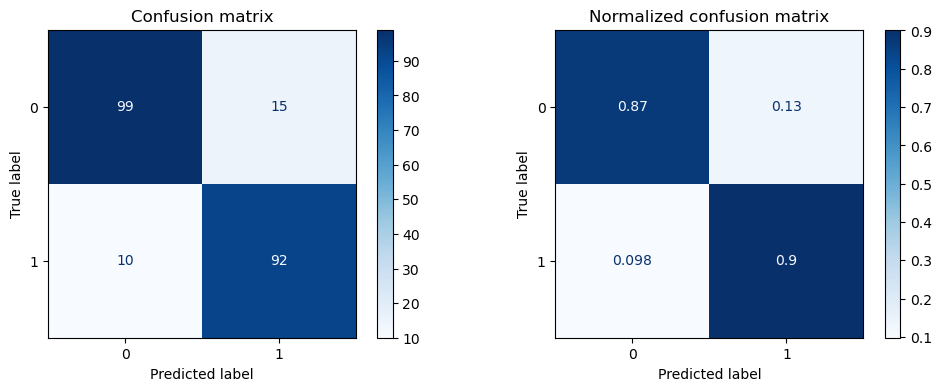

In [216]:
# 랜덤 포레스트 모델의 정확도 및 오차 행렬 출력
get_evaluation(y_test, rfc_prediction, rfc, X_test)

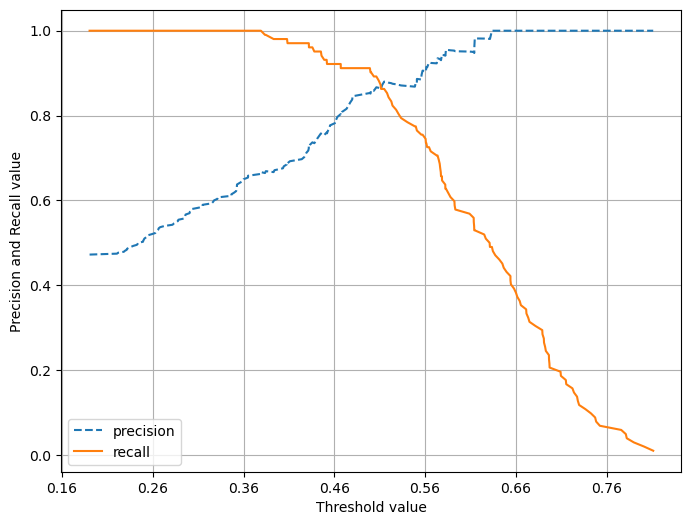

In [217]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

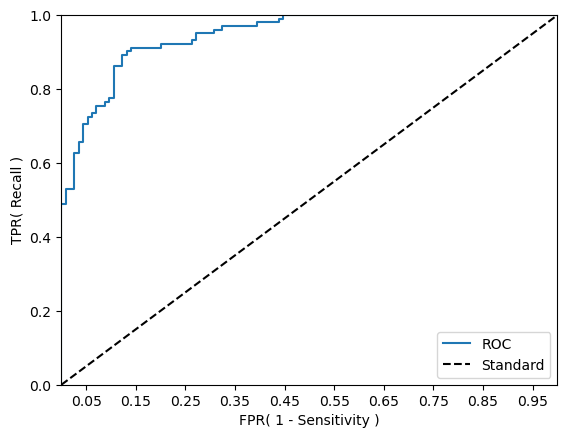

In [218]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [219]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'ITSN1_N']]

important_features

APP_N   ITSN1_N
0     0.453910  0.747193
1     0.430940  0.689064
2     0.423187  0.730247
3     0.410615  0.617076
4     0.398550  0.617430
...        ...       ...
1074  0.372216  0.463591
1075  0.360990  0.474163
1076  0.309978  0.395179
1077  0.341172  0.412894
1078  0.402982  0.461059

[1079 rows x 2 columns]

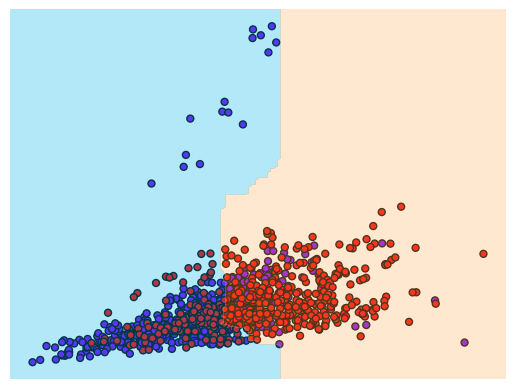

In [220]:
visualize_boundary(rfc, important_features, targets)

#### Random Forest 학습 결과
- 이전 사이클에서 발생한 과적합을 해결하기 위해,  
  n_estimators를 감소시키고 min_samples_split을 크게 증가시킴
- 그 결과, 재현율을 포함한 평가 지표는 약 0.88로 측정
- 이에 따라 과적합 문제는 어느 정도 해소되었을 것이라 추정되며,  
  새로운 데이터가 들어와도 좋은 예측 성능을 보여줄 것이라 기대 

### Boosting 모델 학습

#### 1. Adaboost

In [224]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost의 교차 검증에 사용할 하이퍼 파라미터
ada_parameters = {
    'ada__n_estimators': [10, 20, 30],
    'ada__learning_rate': [0.1, 0.2, 0.3]
}

# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(random_state=124)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [225]:
# 위 모델로 학습 및 교차 검증 진행
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.1, 0.2, 0.3],
                         'ada__n_estimators': [10, 20, 30]},
             return_train_score=True)

In [226]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

params  mean_test_score  \
0  {'ada__learning_rate': 0.1, 'ada__n_estimators...         0.776923   
1  {'ada__learning_rate': 0.1, 'ada__n_estimators...         0.800000   
2  {'ada__learning_rate': 0.1, 'ada__n_estimators...         0.826374   
3  {'ada__learning_rate': 0.2, 'ada__n_estimators...         0.786813   
4  {'ada__learning_rate': 0.2, 'ada__n_estimators...         0.836264   
5  {'ada__learning_rate': 0.2, 'ada__n_estimators...         0.880220   
6  {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.826374   
7  {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.889011   
8  {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.895604   

   rank_test_score  
0                9  
1                7  
2                5  
3                8  
4                4  
5                3  
6                6  
7                2  
8                1

#### 중간 분석
- 지금까지 최적의 모델이 나온 평균 평가 점수는 약 0.83이므로,  
  이번에도 그와 비슷한 점수를 받은 하이퍼 파라미터로 튜닝

In [232]:
# 0.83에 가장 가까운 점수를 받은 하이퍼 파라미터로 튜닝
for params in ada_result_df[ada_result_df['rank_test_score'] == 4]['params']:
    print(params)

{'ada__learning_rate': 0.2, 'ada__n_estimators': 20}


In [233]:
# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=124)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
ada_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=20,
                                    random_state=124))])

In [235]:
# ADaboost 모델로 테스트 데이터 예측
ada_prediction = ada_pipe.predict(X_test)

In [236]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(ada_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2037
AMPKA_N: 0.0639
AcetylH3K9_N: 0.0272
NR2B_N: 0.0083
MTOR_N: 0.0082
Tau_N: 0.0065
GluR3_N: 0.0009
pCAMKII_N: 0.0
RSK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
NR2A_N: 0.0
JNK_N: 0.0
MEK_N: 0.0
TRKA_N: 0.0
NR1_N: 0.0
pCREB_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
BDNF_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
DSCR1_N: 0.0
ELK_N: 0.0
CREB_N: 0.0
CAMKII_N: 0.0
pAKT_N: 0.0
BRAF_N: 0.0
pBRAF_N: 0.0
AKT_N: 0.0
pRSK_N: 0.0
pPKCAB_N: 0.0
pNR2B_N: 0.0
pNR2A_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
PKCA_N: 0.0
pJNK_N: 0.0
pERK_N: 0.0
pELK_N: 0.0
Stimulated: 0.0
pNUMB_N: 0.0
Treatment: 0.0
RAPTOR_N: 0.0
pCASP9_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BAD_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
SYP_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
P3525_N: 0.0
IL1B_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
nNOS_N: 0.0
DY

오차 행렬
[[97 17]
 [23 79]]
정확도: 0.8148, 정밀도: 0.8156, 재현율: 0.8127, F1: 0.8135, ROC-AUC: 0.8127
################################################################################


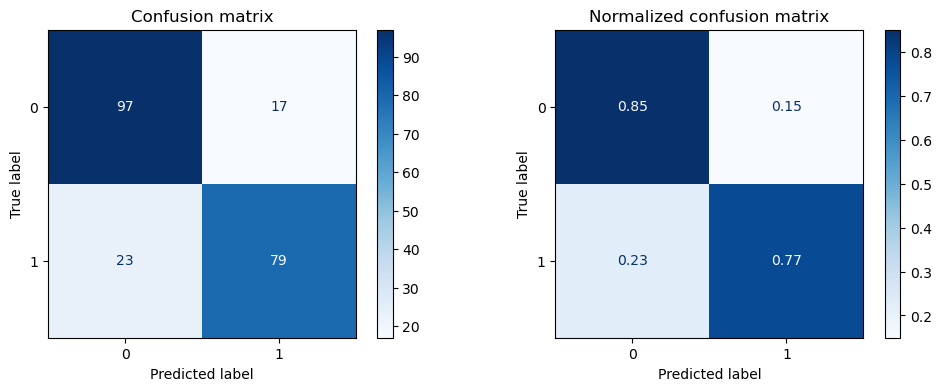

In [237]:
# 위 예측의 정확도와 오차행렬 시각화
get_evaluation(y_test, ada_prediction, ada_pipe, X_test)

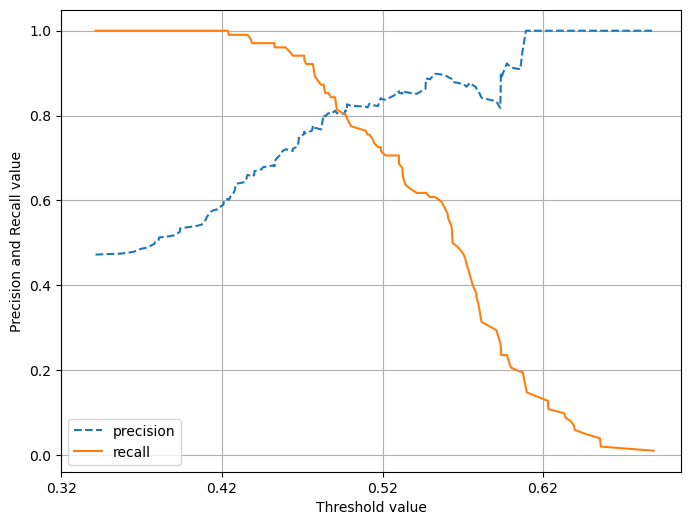

In [238]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, ada_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

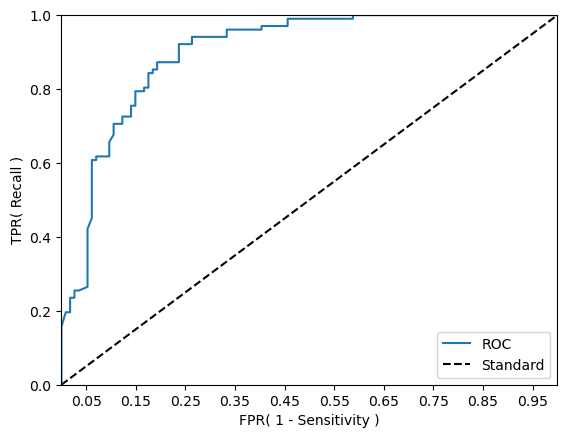

In [239]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, ada_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [240]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

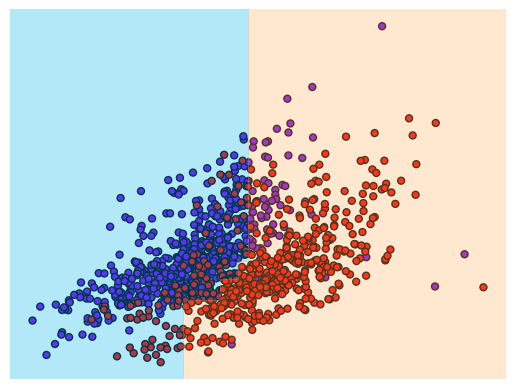

In [241]:
visualize_boundary(ada_pipe, important_features, targets)

#### Adaboost - 1st Cycle
- 평가 지표는 이상적인 수치로 측정되었지만, 정밀도가 재현율보다 미세하게 높음
- 따라서 임계치(threshold) 조정 후 재평가

In [243]:
# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=124)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
ada_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=20,
                                    random_state=124))])

In [245]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

# 임시로 임계치를 0.5로 설정한 뒤, Target에 대한 확률과 예측 값을 변수에 할당
ada_proba = ada_pipe.predict_proba(X_test)
ada_prediction = ada_pipe.predict(X_test)

In [246]:
print(ada_proba)

[[0.6587245  0.3412755 ]
 [0.45328418 0.54671582]
 [0.55528805 0.44471195]
 [0.34460125 0.65539875]
 [0.57097689 0.42902311]
 [0.5327668  0.4672332 ]
 [0.50215442 0.49784558]
 [0.42925348 0.57074652]
 [0.61949671 0.38050329]
 [0.53784137 0.46215863]
 [0.51767164 0.48232836]
 [0.46769148 0.53230852]
 [0.51211661 0.48788339]
 [0.6083511  0.3916489 ]
 [0.58692662 0.41307338]
 [0.56529468 0.43470532]
 [0.4184036  0.5815964 ]
 [0.57354749 0.42645251]
 [0.43923167 0.56076833]
 [0.36081659 0.63918341]
 [0.62148872 0.37851128]
 [0.37697524 0.62302476]
 [0.44358981 0.55641019]
 [0.51830678 0.48169322]
 [0.42540152 0.57459848]
 [0.4808689  0.5191311 ]
 [0.50955229 0.49044771]
 [0.44720255 0.55279745]
 [0.6245463  0.3754537 ]
 [0.54731295 0.45268705]
 [0.45045982 0.54954018]
 [0.46769148 0.53230852]
 [0.42779011 0.57220989]
 [0.54726885 0.45273115]
 [0.3112496  0.6887504 ]
 [0.36023324 0.63976676]
 [0.63838866 0.36161134]
 [0.56409677 0.43590323]
 [0.56455146 0.43544854]
 [0.48528307 0.51471693]


In [265]:
# 확률값 중 뒤에 있는 값을 n(데이터 수) * 1 형태의 ndarrat로 변환
custom_proba = ada_proba[:, 1].reshape(-1, 1)

# 임계치(0.5)와 위의 확률로 Binarizer 학습
binarizer = Binarizer(threshold=threshold).fit(custom_proba)

# 확률이 0.5 이상인 것은 1, 그렇지 않은 값은 0으로 변환
custom_prediction = binarizer.transform(custom_proba)

custom_prediction

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

오차 행렬
[[76 38]
 [ 6 96]]
정확도: 0.7963, 정밀도: 0.8216, 재현율: 0.8039, F1: 0.7945, ROC-AUC: 0.8039
################################################################################


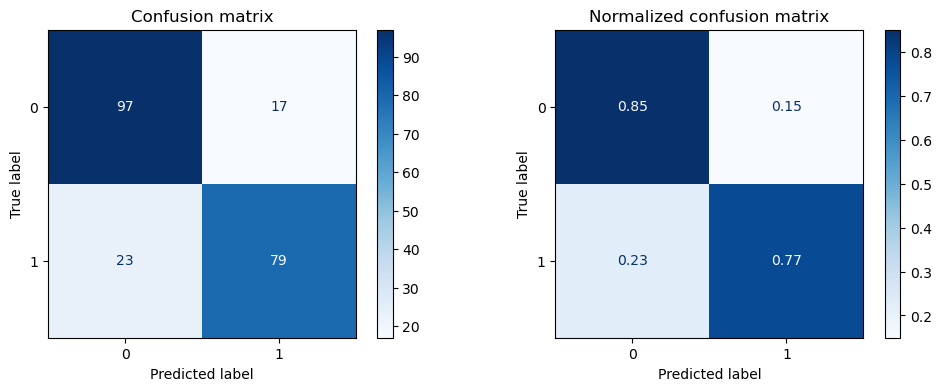

In [266]:
get_evaluation(y_test, custom_prediction, ada_pipe, X_test)

In [267]:
# 특정 임계치가 담긴 list를 전달받으면, 각각에 대한 평가 지표를 출력해주는 함수
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation_by_custom_proba(y_test, custom_prediction)

# 평가 지표만 출력해주는 함수
def get_evaluation_by_custom_proba(y_test, prediction):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)

#### 중간 정리
- 재현율을 향상시키려면 임계치를 낮춰야 되므로, 위 함수에 전달할 임계치 리스트는 0.5보다 작은 값만 담아서 전달

In [268]:
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율의 변경 지점을 threshold 변수에 담아서 출력
proba_class1 = ada_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.3412755 , 0.35645911, 0.36161134, 0.36494748, 0.36948919,
       0.37253635, 0.37372448, 0.3754537 , 0.37789135, 0.37851128,
       0.38050329, 0.38057581, 0.38084377, 0.38679004, 0.39050956,
       0.3916489 , 0.39373031, 0.39394779, 0.40392241, 0.40726061,
       0.40793061, 0.40829681, 0.40994177, 0.41029115, 0.41041651,
       0.41170082, 0.41241498, 0.41307338, 0.41446544, 0.41781996,
       0.41807892, 0.42085574, 0.42113278, 0.42124847, 0.42377008,
       0.42417018, 0.42481818, 0.42513754, 0.42645251, 0.42798198,
       0.42833187, 0.42874472, 0.42902311, 0.43442606, 0.43470532,
       0.43533187, 0.43544854, 0.43590323, 0.43799082, 0.43870918,
       0.44006617, 0.44022327, 0.44471195, 0.44547058, 0.45258679,
       0.45268705, 0.45273115, 0.45331873, 0.45427037, 0.45569348,
       0.45695138, 0.45749859, 0.4595747 , 0.46215863, 0.46408256,
       0.46411307, 0.4672332 , 0.46804738, 0.47097361, 0.47128895,
       0.47130352, 0.47238511, 0.47596622, 0.47648547, 0.47660

- 위의 Trade-off 그래프를 참고하여 0.44 ~ 0.47 사이의 임계치만 테스트

In [269]:
ada_thresholds = [i for i in thresholds if (i >= 0.44) & (i <= 0.47)]

ada_thresholds

[0.4400661689374919,
 0.4402232741439863,
 0.44471195168318634,
 0.4454705835571265,
 0.4525867904097481,
 0.45268704834939305,
 0.4527311466442856,
 0.4533187339308866,
 0.45427037288518884,
 0.45569347701696344,
 0.4569513842410526,
 0.45749859087379513,
 0.4595747031037564,
 0.46215862964201704,
 0.46408256381758756,
 0.4641130710187172,
 0.4672331966752407,
 0.46804737648113703]

In [270]:
# 위 임계치 별 평가 지표 출력
get_evaluation_by_thresholds(y_test, ada_proba[:, 1].reshape(-1, 1), ada_thresholds)

0.4400661689374919
오차 행렬
[[65 49]
 [ 3 99]]
정확도: 0.7593, 정밀도: 0.6689, 재현율: 0.9706, F1: 0.7920, ROC-AUC: 0.7704
################################################################################
0.4402232741439863
오차 행렬
[[66 48]
 [ 3 99]]
정확도: 0.7639, 정밀도: 0.6735, 재현율: 0.9706, F1: 0.7952, ROC-AUC: 0.7748
################################################################################
0.44471195168318634
오차 행렬
[[67 47]
 [ 3 99]]
정확도: 0.7685, 정밀도: 0.6781, 재현율: 0.9706, F1: 0.7984, ROC-AUC: 0.7792
################################################################################
0.4454705835571265
오차 행렬
[[68 46]
 [ 3 99]]
정확도: 0.7731, 정밀도: 0.6828, 재현율: 0.9706, F1: 0.8016, ROC-AUC: 0.7835
################################################################################
0.4525867904097481
오차 행렬
[[68 46]
 [ 4 98]]
정확도: 0.7685, 정밀도: 0.6806, 재현율: 0.9608, F1: 0.7967, ROC-AUC: 0.7786
################################################################################
0.45268704834939305
오차 행렬
[[70 44]
 [ 4

#### 중간 분석
- 각 임계치에 따른 평가 지표 중, ROC-AUC 점수가 0.8에 가장 가까운  
  0.46215862964201704를 임계치로 설정한 다음 모델 평가 진행

In [281]:
# 임계치 재설정
threshold = 0.46215862964201704

In [282]:
# 임계치 조정 후 다시 데이터 예측
custom_proba = ada_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

custom_prediction

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

오차 행렬
[[76 38]
 [ 6 96]]
정확도: 0.7963, 정밀도: 0.8216, 재현율: 0.8039, F1: 0.7945, ROC-AUC: 0.8039
################################################################################


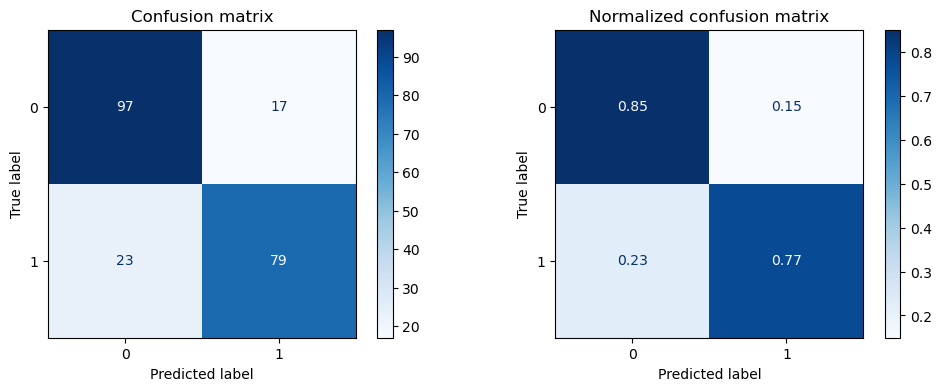

In [283]:
get_evaluation(y_test, custom_prediction, ada_pipe, X_test)

#### Adaboost - 2nd Cycle
- 재현율에 변화가 없음
- 임계치를 높여서 다시 평가

In [284]:
# 0.47 이상 0.5 미만인 임계치만 가져옴
ada_thresholds = [i for i in thresholds if (i >= 0.47) & (i < 0.5)]

ada_thresholds

[0.47097361308049457,
 0.47128894922701803,
 0.47130351914034896,
 0.4723851141492697,
 0.4759662156386703,
 0.4764854744478279,
 0.47660209804352416,
 0.47789655621809074,
 0.48169322127667574,
 0.4823283587455282,
 0.48335285171624165,
 0.48376197974293034,
 0.48431168386940476,
 0.48622202334550724,
 0.4878833882283892,
 0.49044770860439746,
 0.4915139416247127,
 0.496182619147967,
 0.4968199041590388,
 0.497760063738217,
 0.49784557599195917,
 0.4990333270333311]

In [285]:
# 위 임계치 별 평가 지표 출력
get_evaluation_by_thresholds(y_test, ada_proba[:, 1].reshape(-1, 1), ada_thresholds)

0.47097361308049457
오차 행렬
[[84 30]
 [ 6 96]]
정확도: 0.8333, 정밀도: 0.7619, 재현율: 0.9412, F1: 0.8421, ROC-AUC: 0.8390
################################################################################
0.47128894922701803
오차 행렬
[[84 30]
 [ 7 95]]
정확도: 0.8287, 정밀도: 0.7600, 재현율: 0.9314, F1: 0.8370, ROC-AUC: 0.8341
################################################################################
0.47130351914034896
오차 행렬
[[84 30]
 [ 8 94]]
정확도: 0.8241, 정밀도: 0.7581, 재현율: 0.9216, F1: 0.8319, ROC-AUC: 0.8292
################################################################################
0.4723851141492697
오차 행렬
[[85 29]
 [ 8 94]]
정확도: 0.8287, 정밀도: 0.7642, 재현율: 0.9216, F1: 0.8356, ROC-AUC: 0.8336
################################################################################
0.4759662156386703
오차 행렬
[[86 28]
 [ 8 94]]
정확도: 0.8333, 정밀도: 0.7705, 재현율: 0.9216, F1: 0.8393, ROC-AUC: 0.8380
################################################################################
0.4764854744478279
오차 행렬
[[87 27]
 [ 

#### 중간 분석
- 모든 평가 지표를 종합해봤을 때 0.8에 가장 가까워지는  
  0.48335285171624165로 임계치 설정 후 평가

In [296]:
threshold = 0.48335285171624165

In [297]:
# 임계치 조정 후 다시 데이터 예측
custom_proba = ada_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

custom_prediction

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

오차 행렬
[[92 22]
 [14 88]]
정확도: 0.8333, 정밀도: 0.8340, 재현율: 0.8349, F1: 0.8333, ROC-AUC: 0.8349
################################################################################


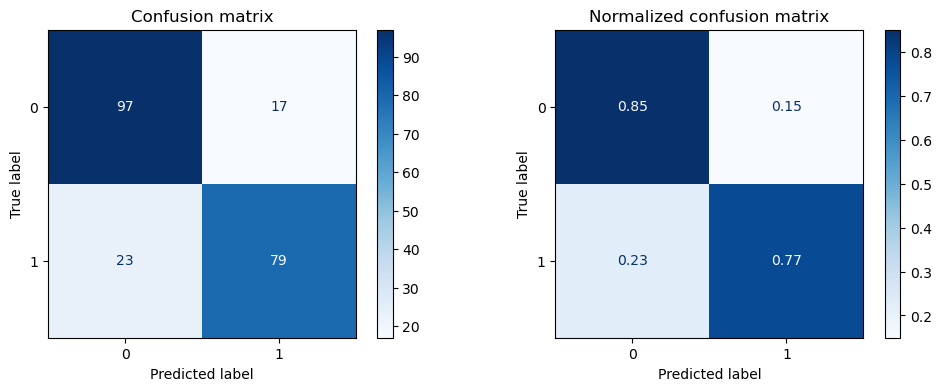

In [299]:
# 오차 행렬 시각화
get_evaluation(y_test, custom_prediction, ada_pipe, X_test)

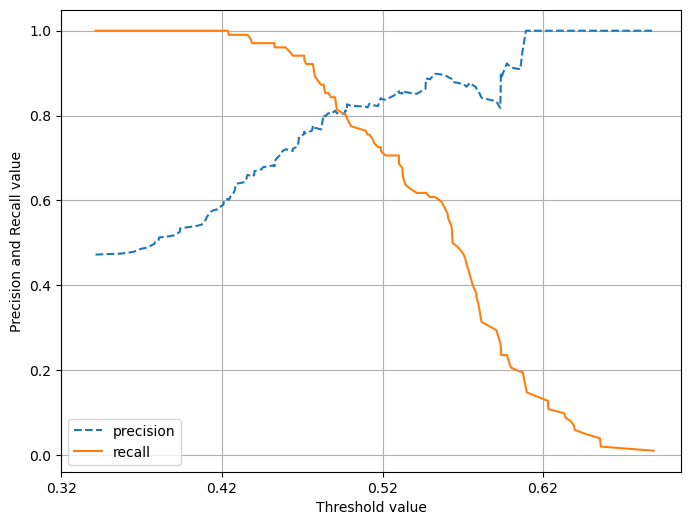

In [302]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, custom_proba)

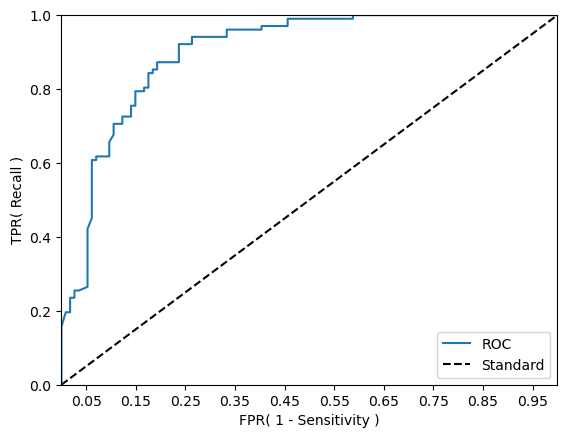

In [303]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, custom_proba)

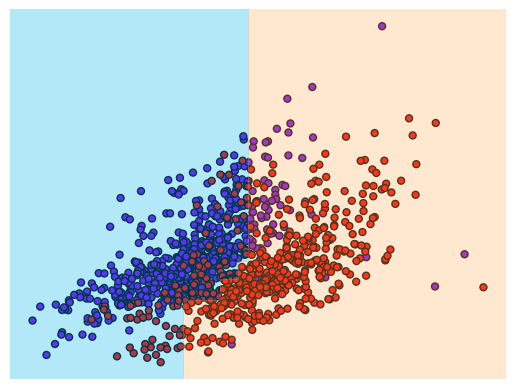

In [304]:
visualize_boundary(ada_pipe, important_features, targets)

#### Adaboost 모델 학습 결과
- 임계치 조정까지 완료함에 따라 최적의 재현율을 가지면서 과적합도 해소됨

#### 2. GBM

In [305]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM의 교차 검증에 사용할 하이퍼 파라미터
gbm_parameters = {
    'gbm__loss': ['log_loss', 'exponential'],
    'gbm__n_estimators': [10, 20, 30],
    'gbm__learning_rate': [0.1, 0.2, 0.3],
    'gbm__subsample': [0.1, 0.2, 0.3]
}

# 표준화와 GBM을 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
gbm = GradientBoostingClassifier(random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])
g_gbm = GridSearchCV(gbm_pipe, param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [306]:
# 위 모델로 학습 및 교차 검증 진행
g_gbm.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbm',
                                        GradientBoostingClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'gbm__learning_rate': [0.1, 0.2, 0.3],
                         'gbm__loss': ['log_loss', 'exponential'],
                         'gbm__n_estimators': [10, 20, 30],
                         'gbm__subsample': [0.1, 0.2, 0.3]},
             return_train_score=True)

In [307]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

params  mean_test_score  \
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.895604   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.890110   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.913187   
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.923077   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.910989   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.930769   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.938462   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.895604   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.902198   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.915385   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.920879   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.907692   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.925275   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.923077   
18  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
19  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.907692   
20  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.907692   
21  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
22  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.932967   
23  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.940659   
24  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.893407   
25  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.938462   
26  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.951648   
27  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
28  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.898901   
29  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.906593   
30  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.886813   
31  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.924176   
32  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.926374   
33  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.907692   
34  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.920879   
35  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.943956   
36  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.854945   
37  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.902198   
38  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.892308   
39  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.860440   
40  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.923077   
41  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.928571   
42  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.845055   
43  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.935165   
44  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.948352   
45  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.872527   
46  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.902198   
47  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.897802   
48  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.874725   
49  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.924176   
50  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.919780   
51  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.897802   
52  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.919780   
53  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo.

In [310]:
# 평가 순위 순으로 출력
gbm_result_df.sort_values(by='rank_test_score')

params  mean_test_score  \
26  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.951648   
44  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.948352   
35  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.943956   
23  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.940659   
25  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.938462   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.938462   
43  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.935165   
53  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.934066   
22  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.932967   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.930769   
41  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.928571   
32  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.926374   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.925275   
31  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.924176   
49  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.924176   
40  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.923077   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.923077   
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.923077   
34  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.920879   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.920879   
50  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.919780   
52  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.919780   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.915385   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.913187   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.910989   
20  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.907692   
19  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.907692   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.907692   
33  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.907692   
29  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.906593   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.902198   
46  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.902198   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
37  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.902198   
28  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.898901   
51  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.897802   
47  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.897802   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.895604   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.895604   
24  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.893407   
38  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.892308   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.890110   
21  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
30  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.886813   
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
48  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.874725   
45  {'gbm__learning_rate': 0.3, 'gbm__loss': 'expo...         0.872527   
18  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
27  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
39  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.860440   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
36  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...         0.854945   
42  {'gbm__learning_rate': 0.3, 'gbm__loss': 'log_.

#### 중간 분석
- 평가 점수가 0.83에 가장 가까울 때의 하이퍼 파라미터로 튜닝 후 모델 평가

In [311]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 54]['params']:
    print(params)

{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_loss', 'gbm__n_estimators': 30, 'gbm__subsample': 0.1}


In [312]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.3,
                                 loss='log_loss',
                                 n_estimators=30,
                                 subsample=0.1,
                                 random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])

gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.3, n_estimators=30,
                                            random_state=124, subsample=0.1))])

In [313]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm_pipe.predict(X_test)

In [314]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.231
AMPKA_N: 0.0634
Tau_N: 0.0267
pMTOR_N: 0.0205
pCFOS_N: 0.0202
ADARB1_N: 0.0194
pGSK3B_N: 0.0193
NR2B_N: 0.0193
PSD95_N: 0.0191
pAKT_N: 0.0167
BRAF_N: 0.0159
pERK_N: 0.0159
AKT_N: 0.0151
CDK5_N: 0.015
TRKA_N: 0.0148
CaNA_N: 0.0144
SHH_N: 0.0117
P38_N: 0.0097
BAD_N: 0.0091
NR2A_N: 0.0083
IL1B_N: 0.0082
pNR2A_N: 0.0082
EGR1_N: 0.0082
ELK_N: 0.0079
NUMB_N: 0.0076
pNR1_N: 0.0062
ERBB4_N: 0.006
GSK3B_N: 0.0059
pPKCAB_N: 0.0056
BDNF_N: 0.0054
SNCA_N: 0.0052
GluR4_N: 0.0051
ITSN1_N: 0.0051
GluR3_N: 0.0051
pCREB_N: 0.0048
PKCA_N: 0.0043
pS6_N: 0.0042
pP70S6_N: 0.0034
JNK_N: 0.0026
Stimulated: 0.0026
ARC_N: 0.0015
S6_N: 0.0014
GFAP_N: 0.0012
Ubiquitin_N: 0.0011
BAX_N: 0.0009
DYRK1A_N: 0.0008
pJNK_N: 0.0008
pGSK3B_Tyr216_N: 0.0002
pCAMKII_N: 0.0002
MTOR_N: 0.0002
BCL2_N: 0.0
pNUMB_N: 0.0
AcetylH3K9_N: 0.0
H3MeK4_N: 0.0
H3AcK18_N: 0.0
NR1_N: 0.0
pBRAF_N: 0.0
pELK_N: 0.0
P3525_N: 0.0
pMEK_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
pRSK_N: 0.0
ERK_N: 0.0
DSCR1_N: 0.0
MEK_N: 0.0
Treatment: 0.0
T

오차 행렬
[[97 17]
 [ 8 94]]
정확도: 0.8843, 정밀도: 0.8853, 재현율: 0.8862, F1: 0.8842, ROC-AUC: 0.8862
################################################################################


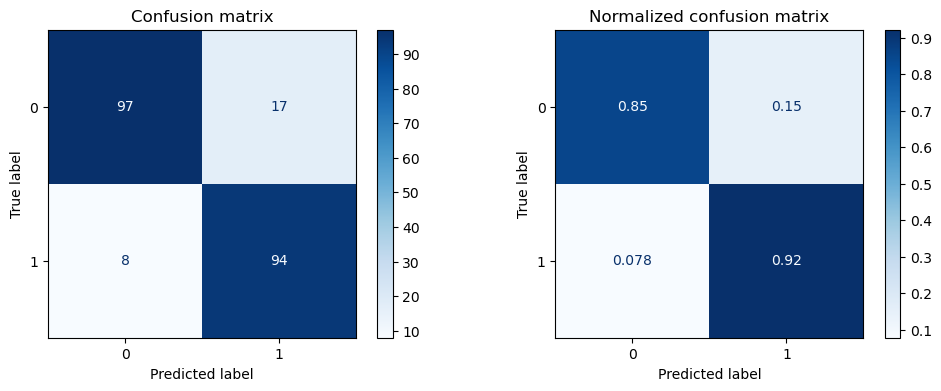

In [315]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

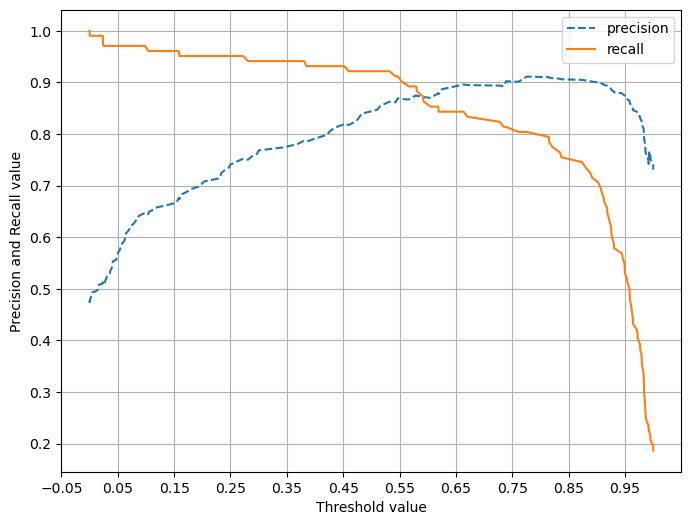

In [316]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

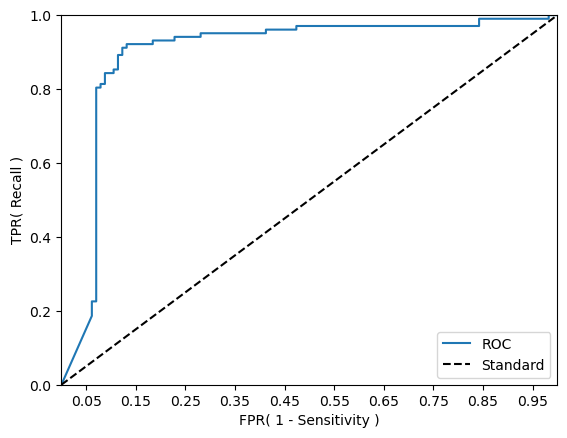

In [317]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [318]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

APP_N   AMPKA_N
0     0.453910  0.448099
1     0.430940  0.420876
2     0.423187  0.404630
3     0.410615  0.386860
4     0.398550  0.360816
...        ...       ...
1074  0.372216  0.270060
1075  0.360990  0.273472
1076  0.309978  0.234679
1077  0.341172  0.258083
1078  0.402982  0.287717

[1079 rows x 2 columns]

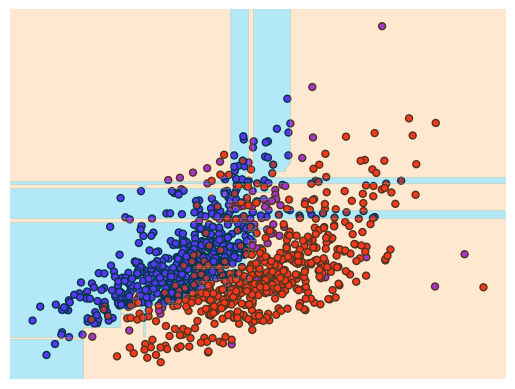

In [319]:
visualize_boundary(gbm_pipe, important_features, targets)

#### GBM - 1st Cycle
- 하이퍼 파라미터 튜닝 후에도 과적합이 발견됨
- 평가 점수를 낯추기 위해 하이퍼 파라미터 값 하향 조정

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM의 교차 검증에 사용할 하이퍼 파라미터
gbm_parameters = {
    'gbm__loss': ['log_loss', 'exponential'],
    'gbm__n_estimators': [10, 15, 20],
    'gbm__learning_rate': [0.1, 0.15, 0.2],
    'gbm__subsample': [0.05, 0.075, 0.1]
}

# 표준화와 GBM을 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
gbm = GradientBoostingClassifier(random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])
g_gbm = GridSearchCV(gbm_pipe, param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [321]:
# 위 모델로 학습 및 교차 검증 진행
g_gbm.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbm',
                                        GradientBoostingClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'gbm__learning_rate': [0.1, 0.15, 0.2],
                         'gbm__loss': ['log_loss', 'exponential'],
                         'gbm__n_estimators': [10, 15, 20],
                         'gbm__subsample': [0.05, 0.075, 0.1]},
             return_train_score=True)

In [336]:
# 교차 검증 결과를 데이터프레임에 담아서 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

params  mean_test_score  \
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.847253   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.839560   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.856044   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.874725   
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.903297   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.861538   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.879121   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.819780   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.848352   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.835165   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.869231   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.891209   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.847253   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.867033   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
18  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.810989   
19  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.862637   
20  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.879121   
21  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.832967   
22  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.883516   
23  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.896703   
24  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.856044   
25  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.892308   
26  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.894505   
27  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.814286   
28  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.840659   
29  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.873626   
30  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.831868   
31  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.876923   
32  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.887912   
33  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.842857   
34  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.864835   
35  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.886813   
36  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.817582   
37  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.838462   
38  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
39  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.852747   
40  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.871429   
41  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.885714   
42  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.816484   
43  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.880220   
44  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
45  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.802198   
46  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.853846   
47  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
48  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.823077   
49  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.879121   
50  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.893407   
51  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.825275   
52  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.880220   
53  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo.

In [323]:
# 평가 순위 순으로 출력
gbm_result_df.sort_values(by='rank_test_score')

params  mean_test_score  \
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.903297   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
23  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.896703   
26  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.894505   
50  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.893407   
25  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.892308   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.891209   
44  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
32  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.887912   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
35  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.886813   
53  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.886813   
41  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.885714   
22  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.883516   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
43  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.880220   
52  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.880220   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.879121   
49  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.879121   
20  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.879121   
31  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.876923   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.874725   
29  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.873626   
40  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.871429   
38  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.869231   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.867033   
34  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.864835   
19  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.862637   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.861538   
47  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
24  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.856044   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.856044   
46  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.853846   
39  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.852747   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.848352   
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.847253   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.847253   
33  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.842857   
28  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.840659   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.839560   
37  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.838462   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.835165   
21  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.832967   
30  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.831868   
51  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.825275   
48  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.823077   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.819780   
36  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.817582   
42  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.816484   
27  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.814286   
18  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.810989   
45  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo.

#### 중간 분석
- 평가 점수가 0.83에 가장 가까울 때의 하이퍼 파라미터로 튜닝 후 모델 평가

In [324]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 46]['params']:
    print(params)

{'gbm__learning_rate': 0.15, 'gbm__loss': 'exponential', 'gbm__n_estimators': 15, 'gbm__subsample': 0.05}


In [325]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.15,
                                 loss='exponential',
                                 n_estimators=15,
                                 subsample=0.05,
                                 random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])

gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.15,
                                            loss='exponential', n_estimators=15,
                                            random_state=124,
                                            subsample=0.05))])

In [326]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm_pipe.predict(X_test)

In [327]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.1852
Tau_N: 0.0231
GluR3_N: 0.016
RRP1_N: 0.0145
IL1B_N: 0.014
PKCA_N: 0.0137
NR2A_N: 0.0125
RAPTOR_N: 0.0122
AMPKA_N: 0.012
pELK_N: 0.012
pPKCG_N: 0.0119
ITSN1_N: 0.0111
S6_N: 0.0102
AcetylH3K9_N: 0.0091
BDNF_N: 0.009
CAMKII_N: 0.008
SOD1_N: 0.0077
pNR2B_N: 0.0069
PSD95_N: 0.0065
TRKA_N: 0.0051
pNR1_N: 0.0048
pNR2A_N: 0.0046
SYP_N: 0.0035
DYRK1A_N: 0.0032
BAD_N: 0.002
CREB_N: 0.0015
H3AcK18_N: 0.0014
pMTOR_N: 0.0012
pNUMB_N: 0.0008
P38_N: 0.0005
GFAP_N: 0.0003
ADARB1_N: 0.0
JNK_N: 0.0
BAX_N: 0.0
Ubiquitin_N: 0.0
BRAF_N: 0.0
AKT_N: 0.0
pPKCAB_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BCL2_N: 0.0
pMEK_N: 0.0
pJNK_N: 0.0
pERK_N: 0.0
pCFOS_N: 0.0
pCREB_N: 0.0
pBRAF_N: 0.0
pAKT_N: 0.0
EGR1_N: 0.0
NR1_N: 0.0
GSK3B_N: 0.0
ERK_N: 0.0
MEK_N: 0.0
nNOS_N: 0.0
CDK5_N: 0.0
ARC_N: 0.0
NUMB_N: 0.0
pP70S6_N: 0.0
TIAM1_N: 0.0
ERBB4_N: 0.0
pCASP9_N: 0.0
NR2B_N: 0.0
Treatment: 0.0
MTOR_N: 0.0
GluR4_N: 0.0
Bcatenin_N: 0.0
RSK_N: 0.0
Stimulated: 0.0
ELK_N: -0.0002
pGSK3B_N: -0.0028
P3525_N: -0.0029


오차 행렬
[[98 16]
 [17 85]]
정확도: 0.8472, 정밀도: 0.8469, 재현율: 0.8465, F1: 0.8467, ROC-AUC: 0.8465
################################################################################


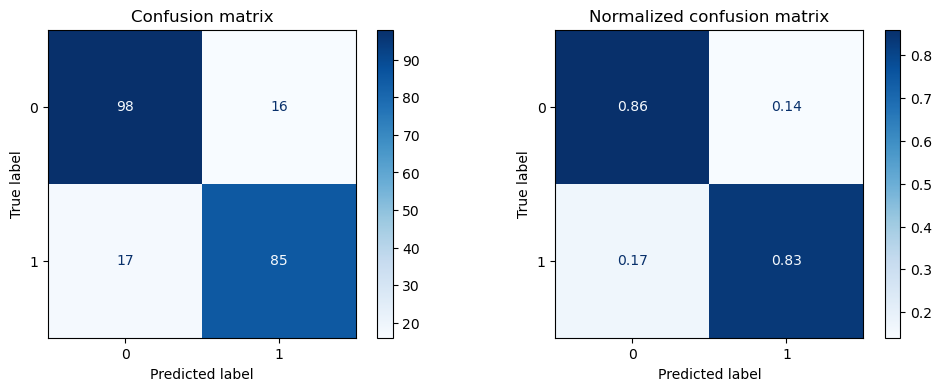

In [328]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

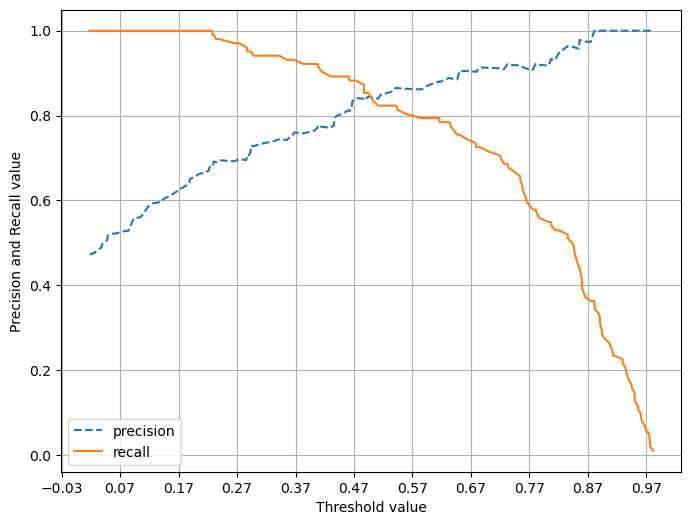

In [330]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

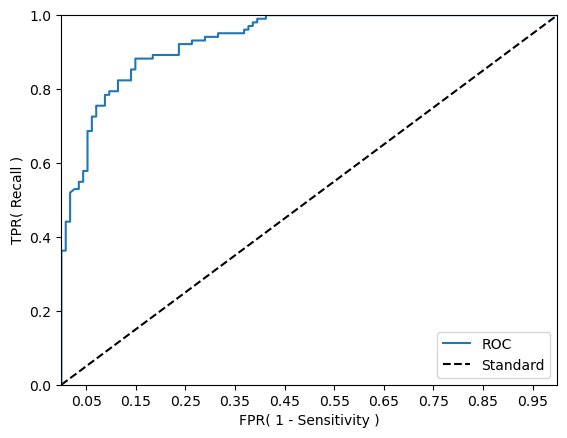

In [331]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [332]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'Tau_N']]

important_features

APP_N     Tau_N
0     0.453910  0.125190
1     0.430940  0.134275
2     0.423187  0.132560
3     0.410615  0.123210
4     0.398550  0.136838
...        ...       ...
1074  0.372216  0.411286
1075  0.360990  0.402073
1076  0.309978  0.395648
1077  0.341172  0.414200
1078  0.402982  0.393170

[1079 rows x 2 columns]

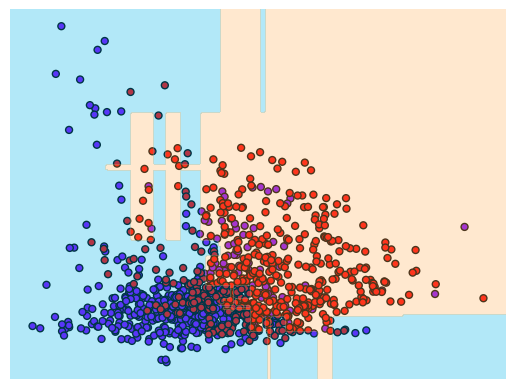

In [333]:
visualize_boundary(gbm_pipe, important_features, targets)

#### GBM - 2nd Cycle
- 아직 약간의 과적합 현상이 관측됨
- 평가 점수가 0.8에 가장 가까울 때의 하이퍼 파라미터로 튜닝 후 다시 평가

In [335]:
# 교차 검증 결과를 데이터프레임에 담아서 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

params  mean_test_score  \
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.847253   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.839560   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.856044   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.874725   
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.903297   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.861538   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.879121   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.819780   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.848352   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.835165   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.869231   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.891209   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.847253   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.867033   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
18  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.810989   
19  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.862637   
20  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.879121   
21  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.832967   
22  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.883516   
23  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.896703   
24  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.856044   
25  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.892308   
26  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.894505   
27  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.814286   
28  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.840659   
29  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.873626   
30  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.831868   
31  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.876923   
32  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.887912   
33  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.842857   
34  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.864835   
35  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.886813   
36  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.817582   
37  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.838462   
38  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
39  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.852747   
40  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.871429   
41  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.885714   
42  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.816484   
43  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.880220   
44  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
45  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.802198   
46  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.853846   
47  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
48  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.823077   
49  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.879121   
50  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.893407   
51  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.825275   
52  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.880220   
53  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo.

In [337]:
# 평가 순위 순으로 출력
gbm_result_df.sort_values(by='rank_test_score')

params  mean_test_score  \
5   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.903297   
8   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.902198   
23  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.896703   
26  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.894505   
50  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.893407   
25  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.892308   
14  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.891209   
44  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.889011   
32  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.887912   
17  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.887912   
35  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.886813   
53  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.886813   
41  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.885714   
22  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.883516   
2   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.881319   
43  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.880220   
52  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.880220   
7   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.879121   
49  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.879121   
20  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.879121   
31  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.876923   
4   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.874725   
29  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.873626   
40  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.871429   
38  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.870330   
13  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.869231   
16  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.867033   
34  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.864835   
19  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.862637   
6   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.861538   
47  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.861538   
11  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.858242   
24  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.856044   
3   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.856044   
46  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.853846   
39  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.852747   
10  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.848352   
0   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.847253   
15  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.847253   
33  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.842857   
28  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.840659   
1   {'gbm__learning_rate': 0.1, 'gbm__loss': 'log_...         0.839560   
37  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.838462   
12  {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.835165   
21  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.832967   
30  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.831868   
51  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.825275   
48  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo...         0.823077   
9   {'gbm__learning_rate': 0.1, 'gbm__loss': 'expo...         0.819780   
36  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.817582   
42  {'gbm__learning_rate': 0.2, 'gbm__loss': 'log_...         0.816484   
27  {'gbm__learning_rate': 0.15, 'gbm__loss': 'exp...         0.814286   
18  {'gbm__learning_rate': 0.15, 'gbm__loss': 'log...         0.810989   
45  {'gbm__learning_rate': 0.2, 'gbm__loss': 'expo.

In [338]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 54]['params']:
    print(params)

{'gbm__learning_rate': 0.2, 'gbm__loss': 'exponential', 'gbm__n_estimators': 10, 'gbm__subsample': 0.05}


In [339]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.2,
                                 loss='exponential',
                                 n_estimators=10,
                                 subsample=0.05,
                                 random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])

gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            loss='exponential', n_estimators=10,
                                            random_state=124,
                                            subsample=0.05))])

In [340]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm_pipe.predict(X_test)

In [341]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.14
pPKCG_N: 0.0478
P38_N: 0.0458
PKCA_N: 0.0352
P3525_N: 0.0284
GSK3B_N: 0.0239
AMPKA_N: 0.0204
S6_N: 0.0204
pGSK3B_N: 0.0122
SOD1_N: 0.0096
EGR1_N: 0.0091
pNR2B_N: 0.0083
pBRAF_N: 0.0074
RRP1_N: 0.0073
pCAMKII_N: 0.0045
CAMKII_N: 0.004
ITSN1_N: 0.0031
pCASP9_N: 0.0025
DYRK1A_N: 0.002
TRKA_N: 0.0012
NUMB_N: 0.0002
pNR2A_N: 0.0
MEK_N: 0.0
BDNF_N: 0.0
MTOR_N: 0.0
NR1_N: 0.0
Bcatenin_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pPKCAB_N: 0.0
JNK_N: 0.0
pERK_N: 0.0
pJNK_N: 0.0
ERK_N: 0.0
ELK_N: 0.0
CREB_N: 0.0
pNR1_N: 0.0
AKT_N: 0.0
pMTOR_N: 0.0
pRSK_N: 0.0
Stimulated: 0.0
GluR3_N: 0.0
SHH_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
GFAP_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
SYP_N: 0.0
H3AcK18_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
NR2B_N: 0.0
pNUMB_N: 0.0
Tau_N: 0.0
AcetylH3K9_N: 0.0
Treatment: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
P70S6_N: 0.0
CDK5_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
DSCR1_N: -0.0003
RSK_N: 

오차 행렬
[[94 20]
 [24 78]]
정확도: 0.7963, 정밀도: 0.7963, 재현율: 0.7946, F1: 0.7952, ROC-AUC: 0.7946
################################################################################


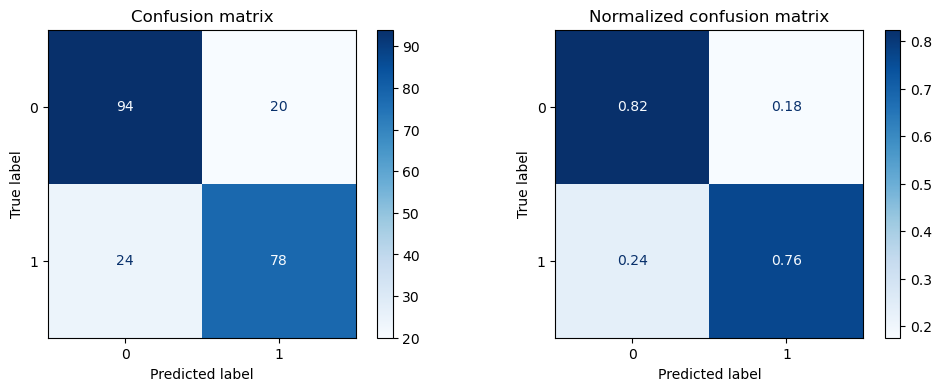

In [342]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

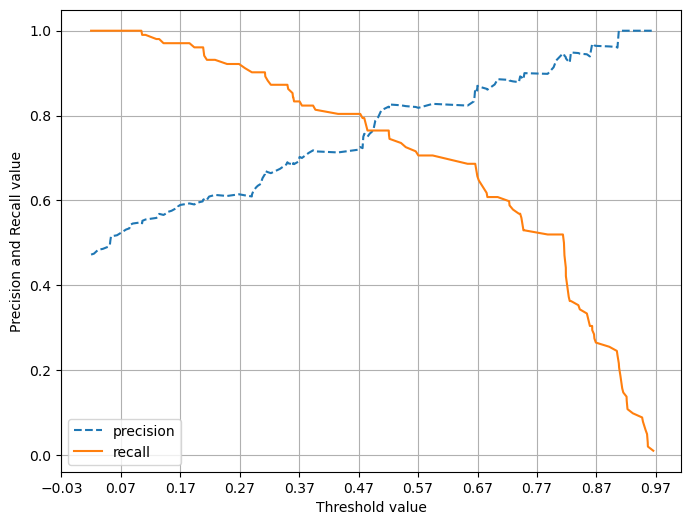

In [343]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

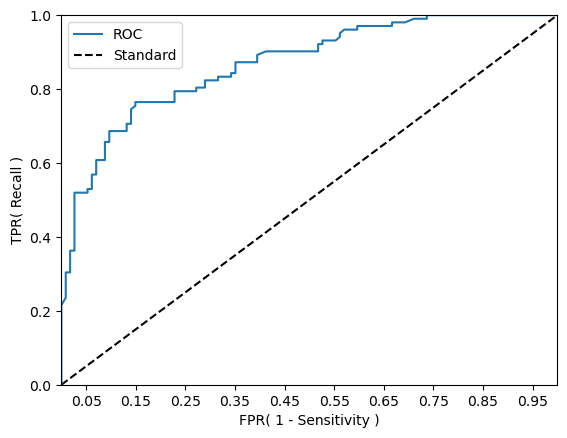

In [344]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [345]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'Tau_N']]

important_features

APP_N     Tau_N
0     0.453910  0.125190
1     0.430940  0.134275
2     0.423187  0.132560
3     0.410615  0.123210
4     0.398550  0.136838
...        ...       ...
1074  0.372216  0.411286
1075  0.360990  0.402073
1076  0.309978  0.395648
1077  0.341172  0.414200
1078  0.402982  0.393170

[1079 rows x 2 columns]

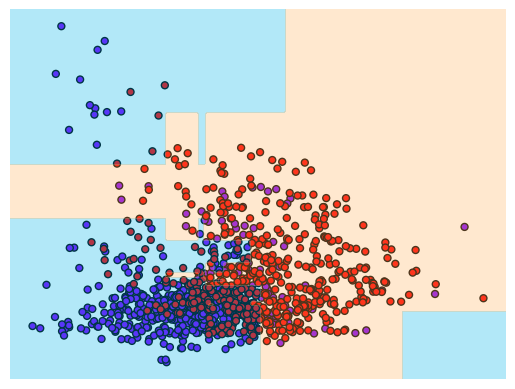

In [346]:
visualize_boundary(gbm_pipe, important_features, targets)

#### GBM - 3rd Cycle
- 과적합은 해소되었지만, 재현율을 높일 필요가 있기에 임계치 조정